# Compare uncertainties from old framework and updated framework

Here is a script to compare the normalized and absolute cross sections. 


In [1]:
import ROOT
from Unfolder import *

ROOT.gROOT.Macro("rootlogon.C")

ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
ROOT.gStyle.SetLabelFont(43,"XYZ")
ROOT.gStyle.SetLabelSize(22,"XYZ")



Welcome to JupyROOT 6.10/08


Info in <TCanvas::Print>: png file unc_compare_ungroomed1jec_abs_vs_norm.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_ungroomed1jec_abs_vs_norm.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_ungroomed1jer_abs_vs_norm.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_ungroomed1jer_abs_vs_norm.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_ungroomed1jmr_abs_vs_norm.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_ungroomed1jmr_abs_vs_norm.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_ungroomed1jms_abs_vs_norm.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_ungroomed1jms_abs_vs_norm.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_ungroomed1pu_abs_vs_norm.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_ungroomed1pu_abs_vs_norm.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_ungroomed1lum_a

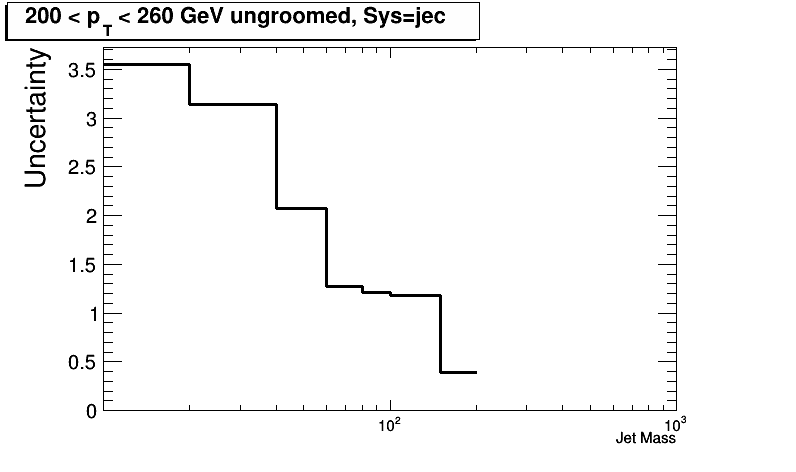

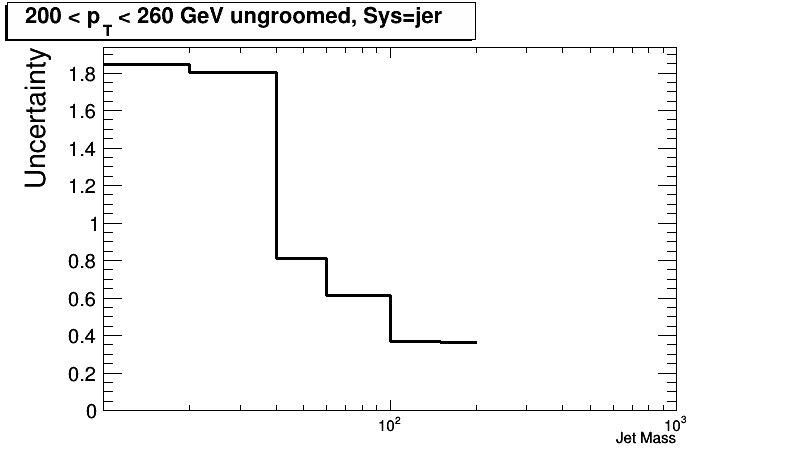

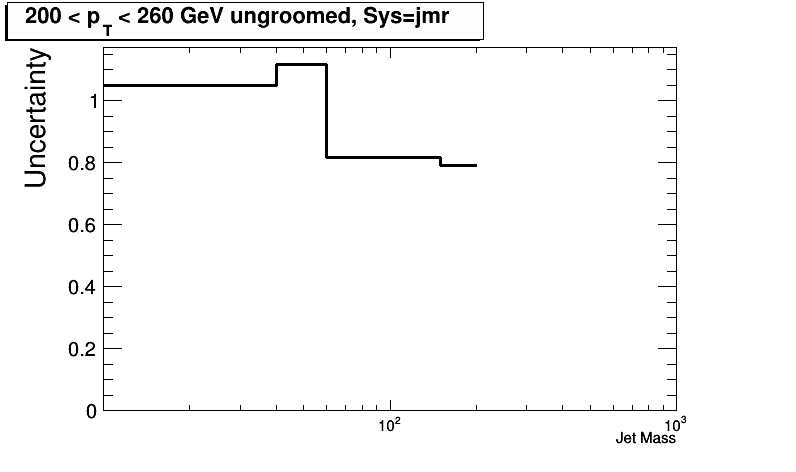

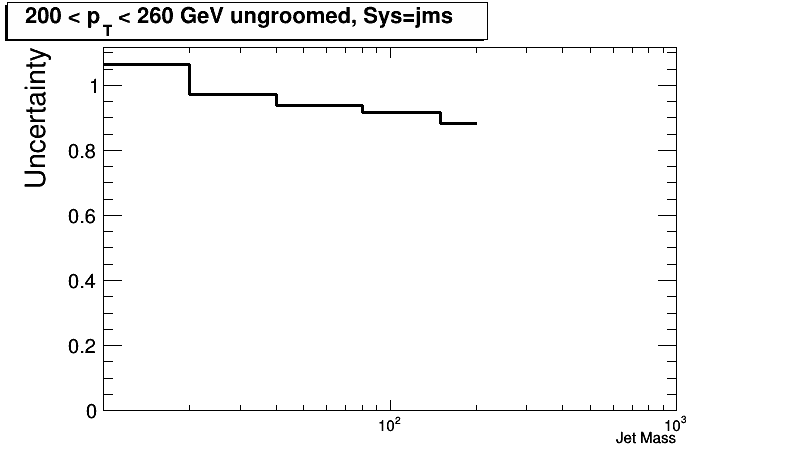

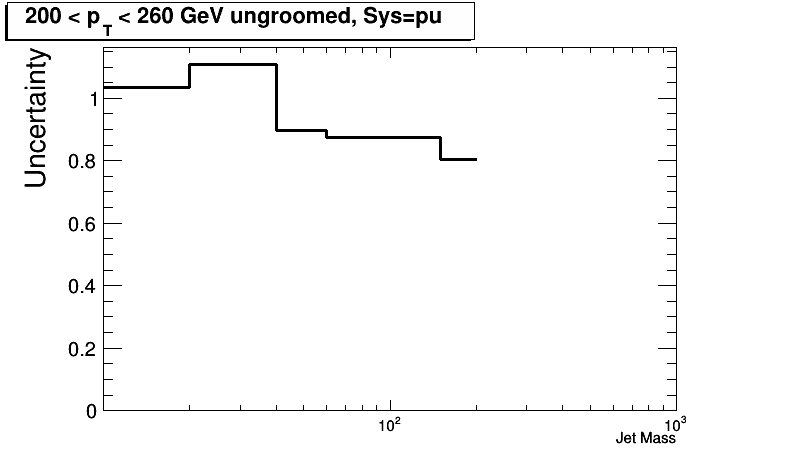

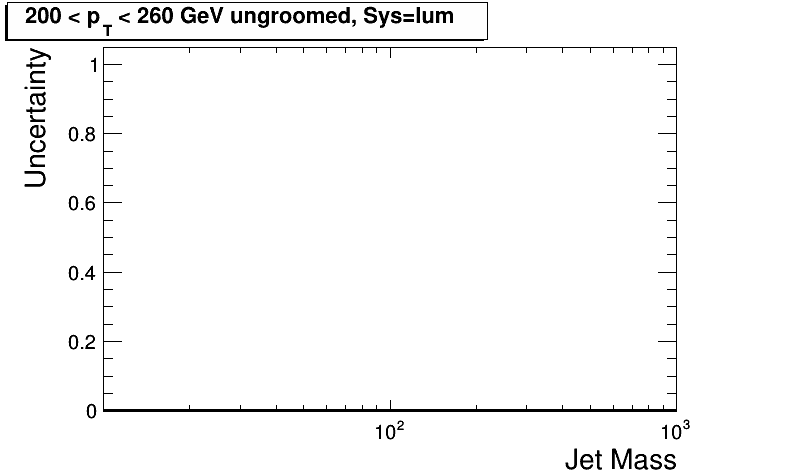

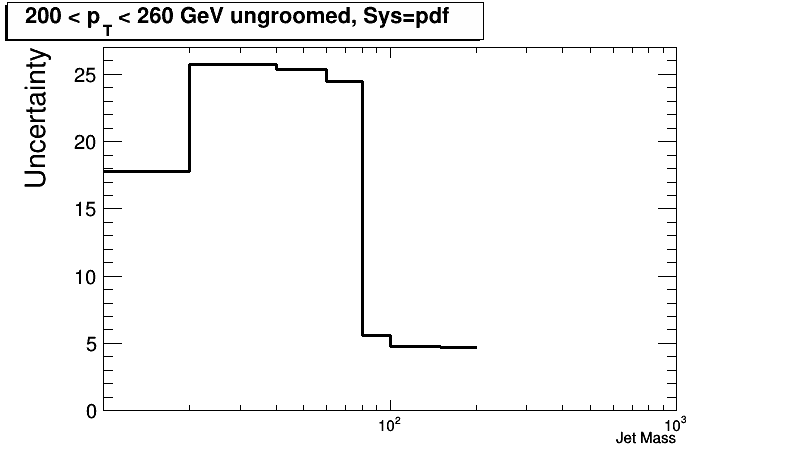

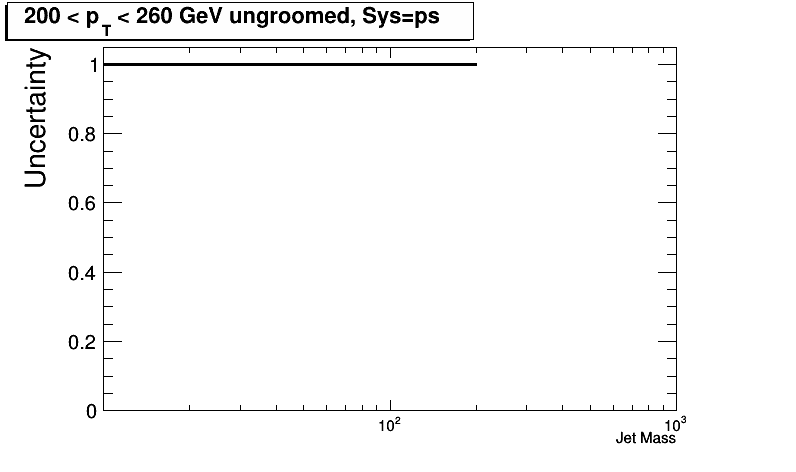

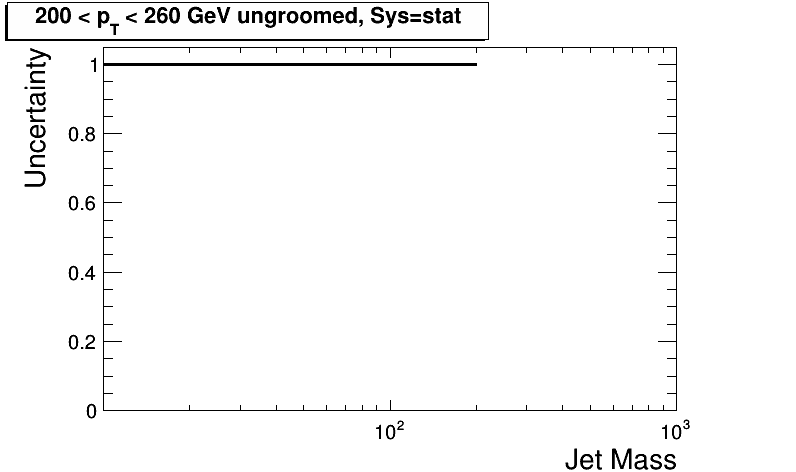

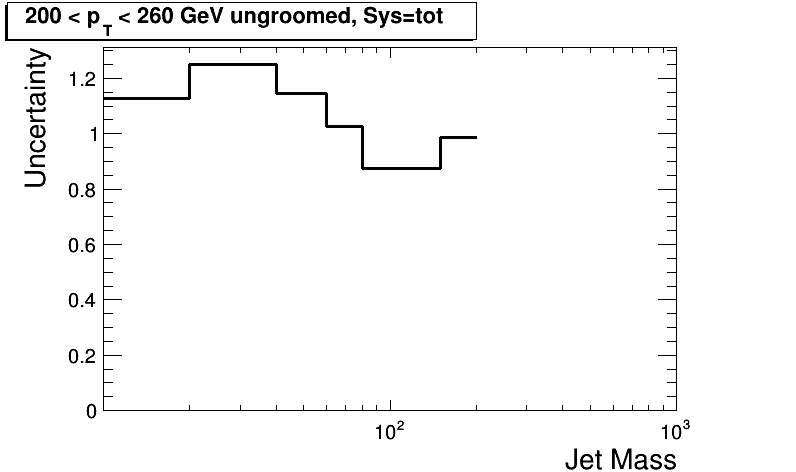

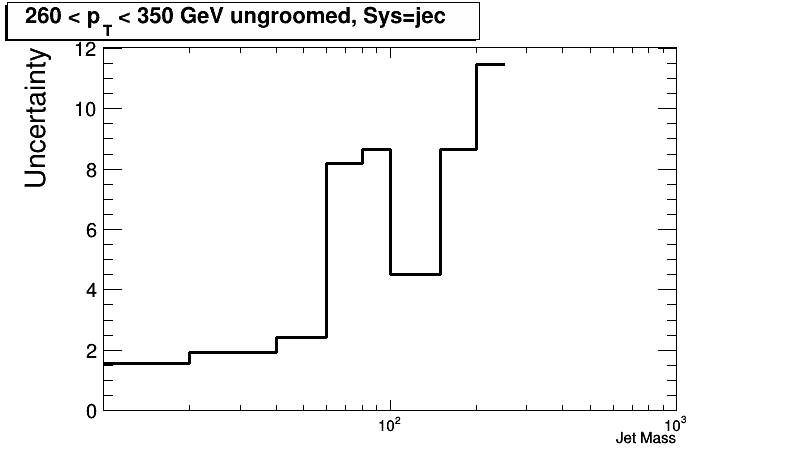

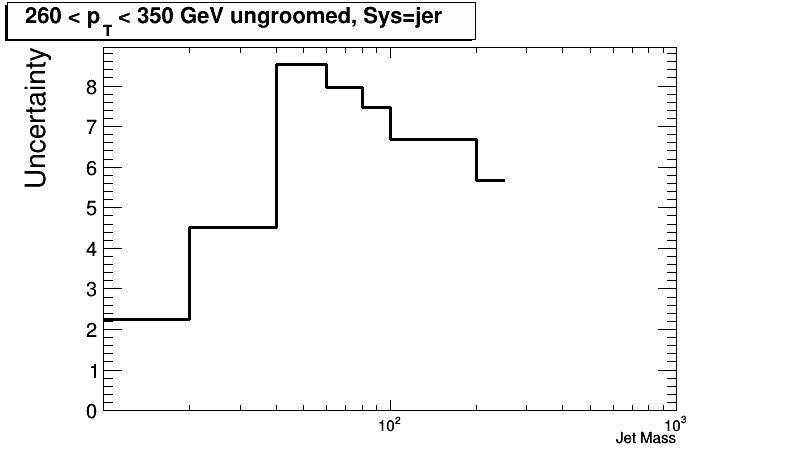

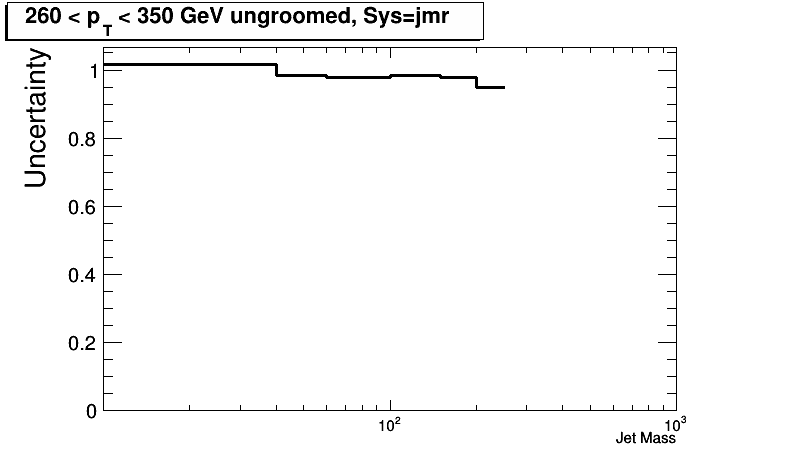

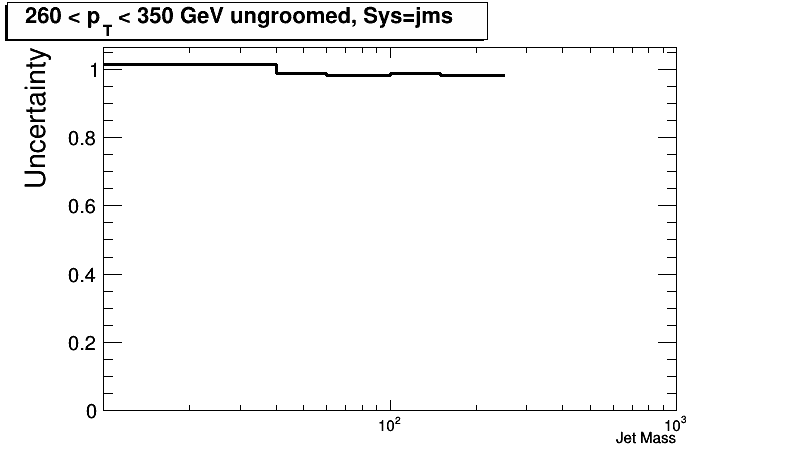

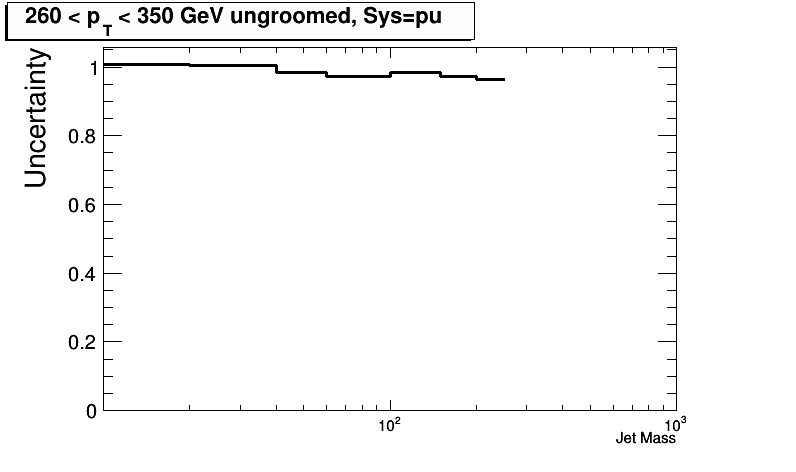

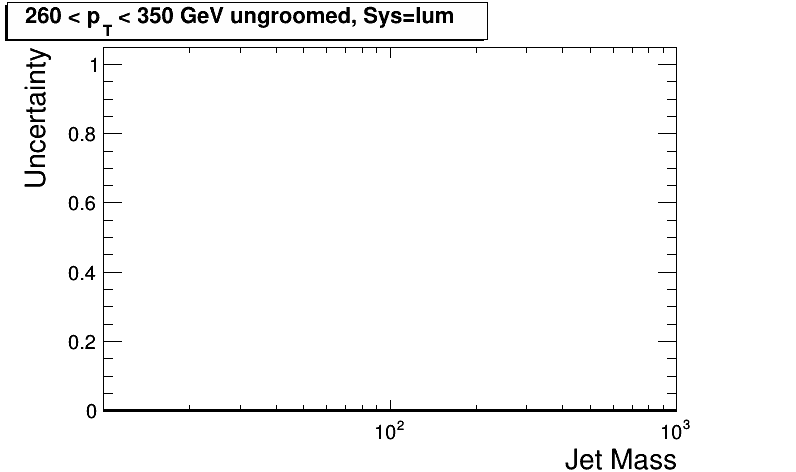

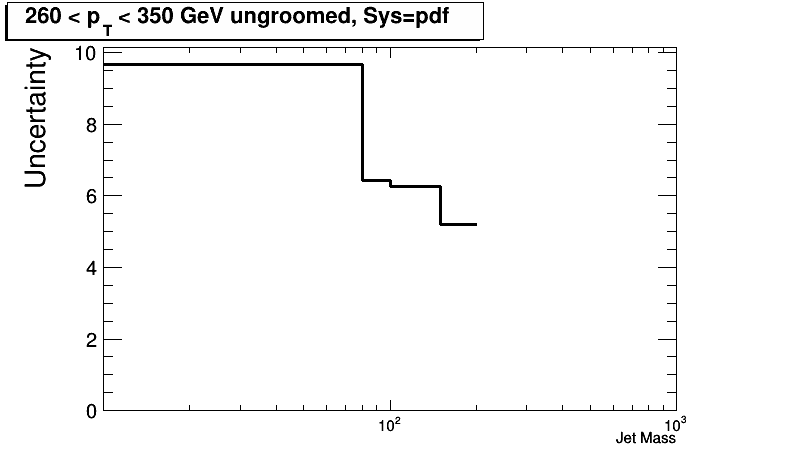

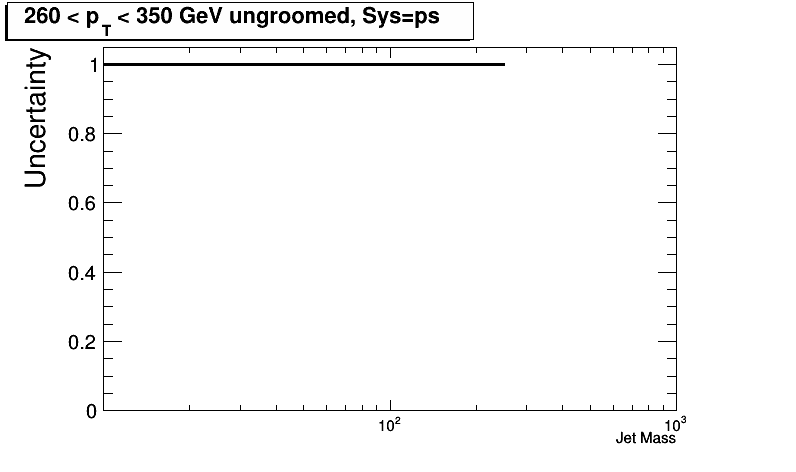

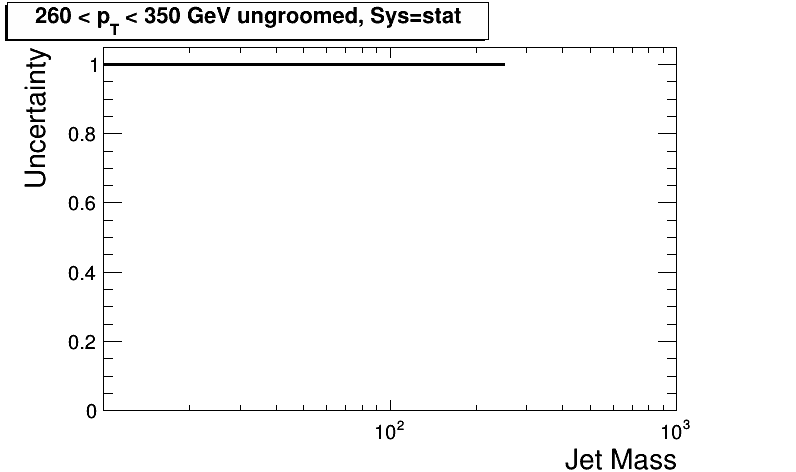

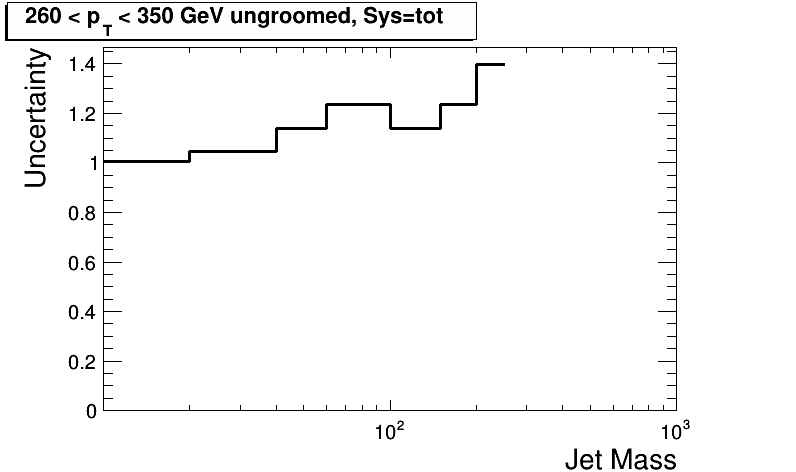

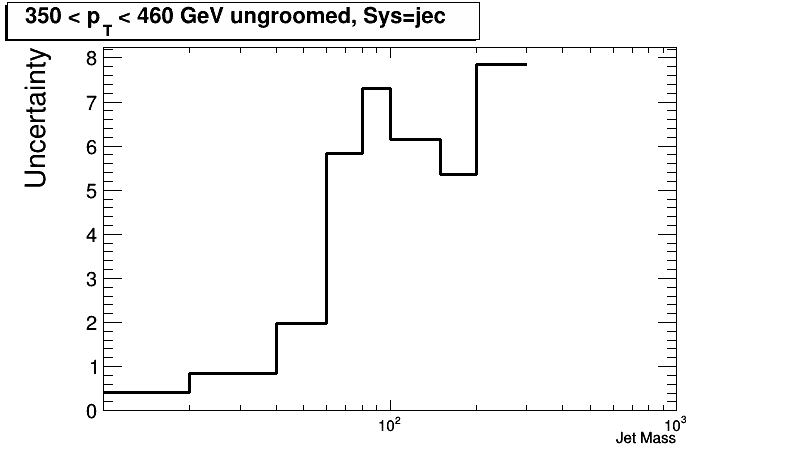

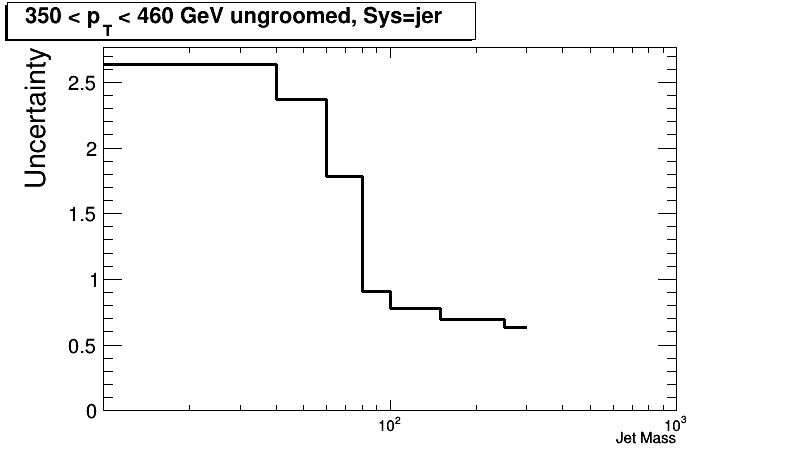

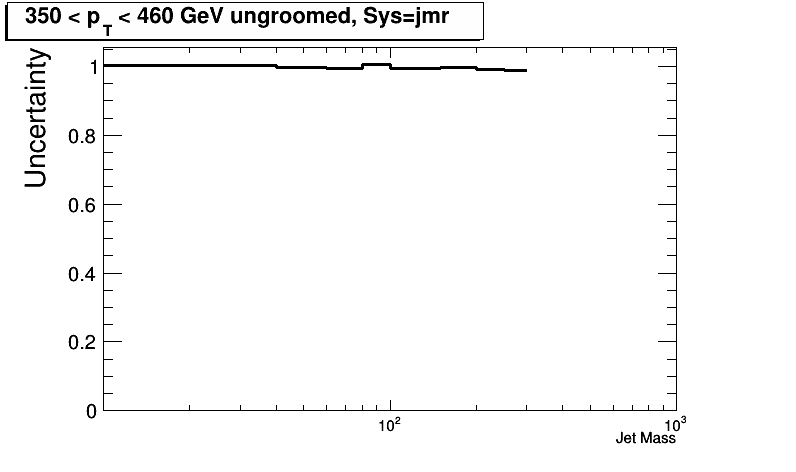

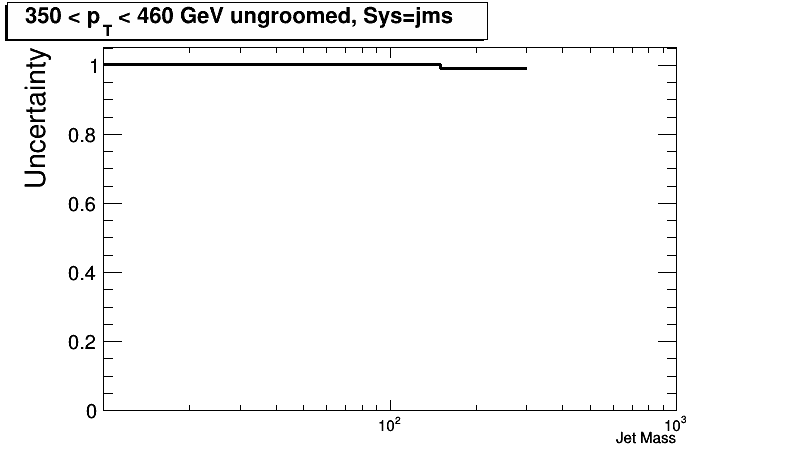

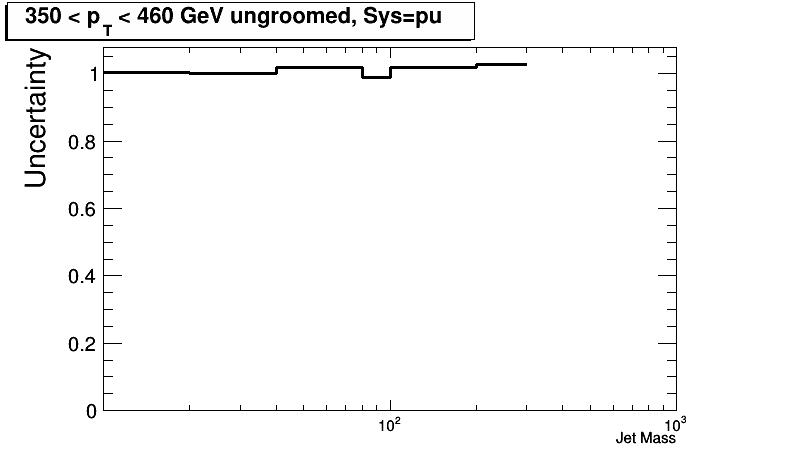

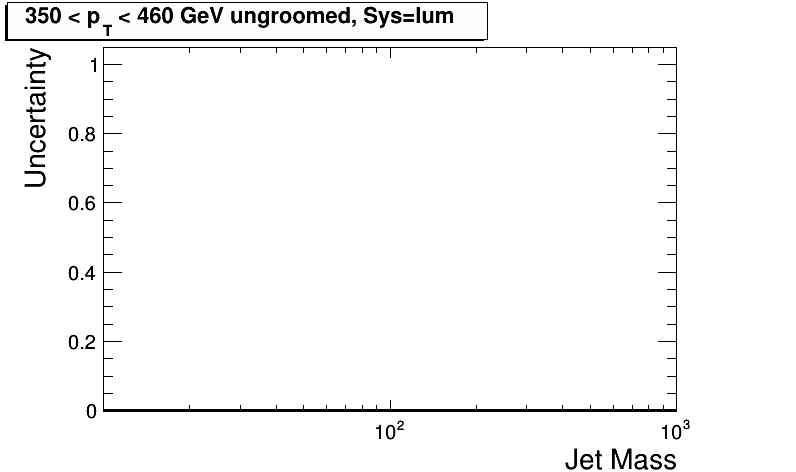

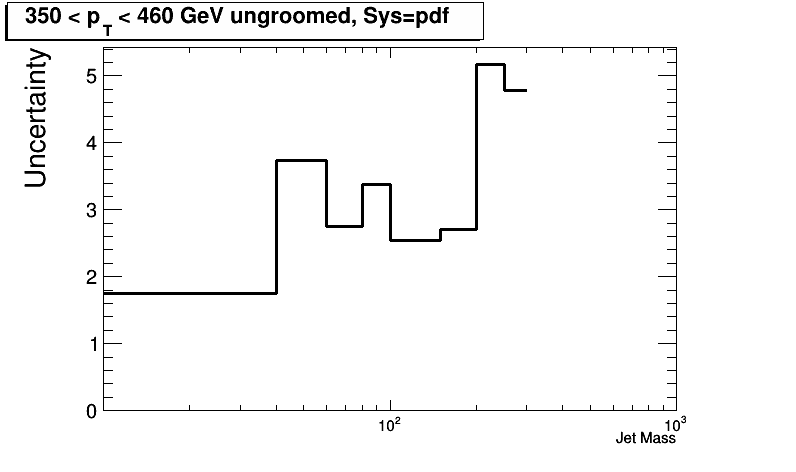

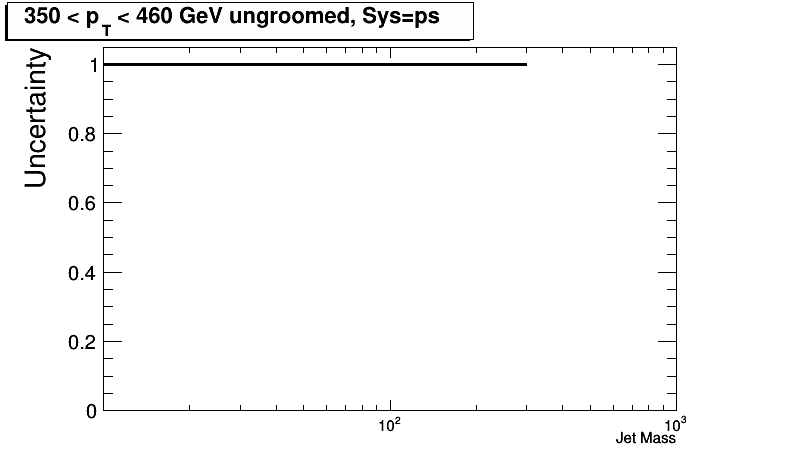

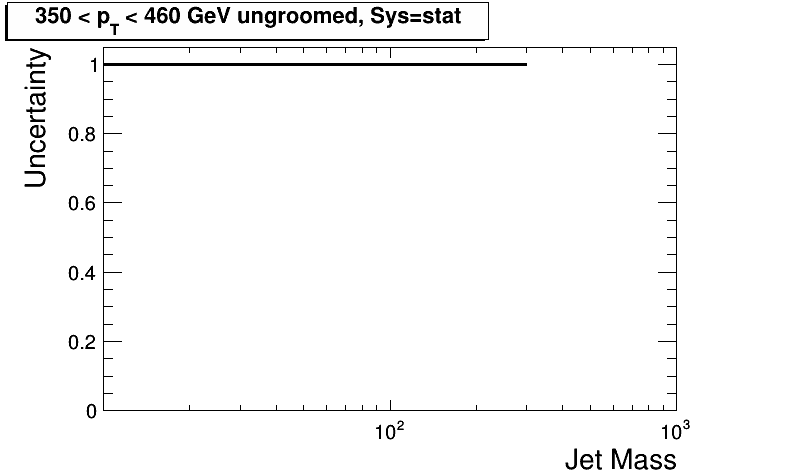

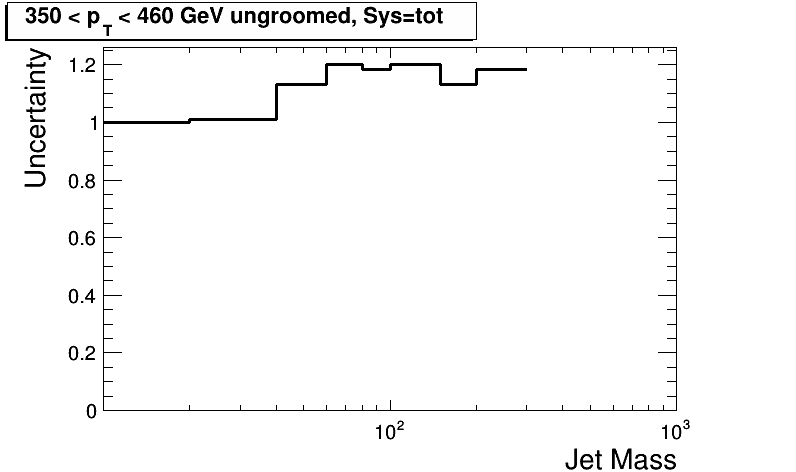

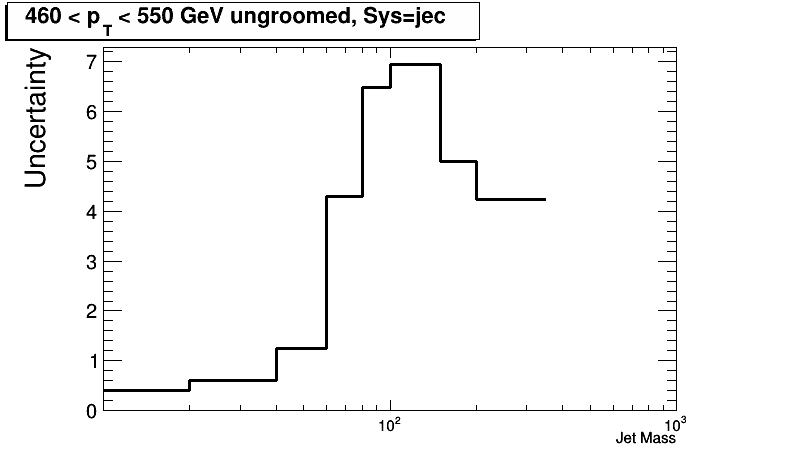

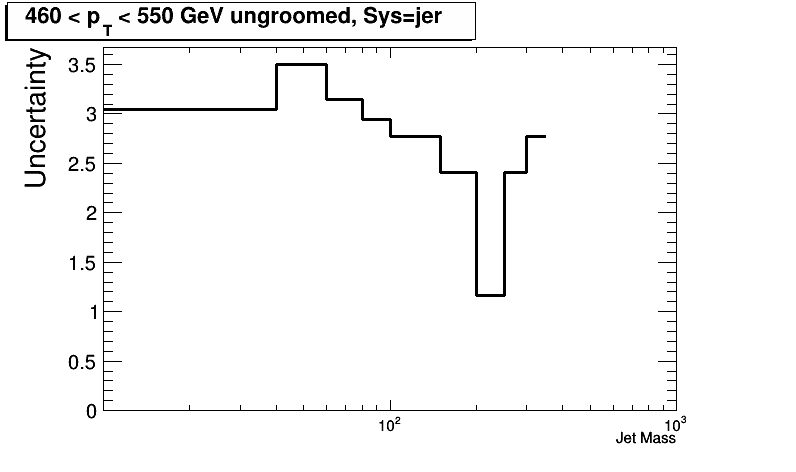

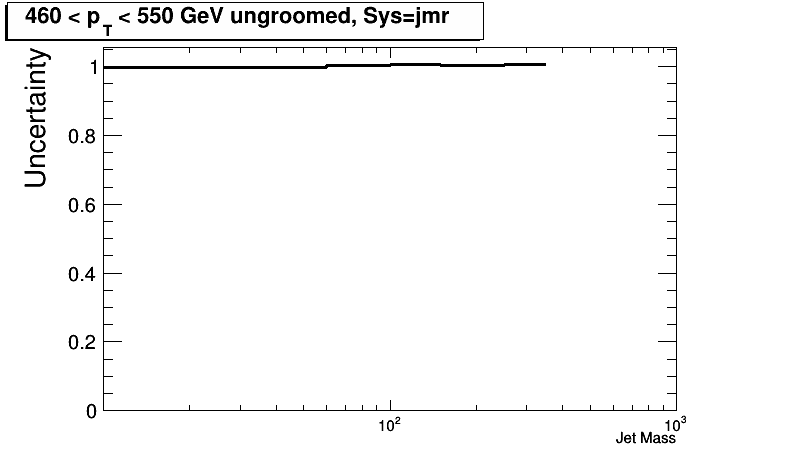

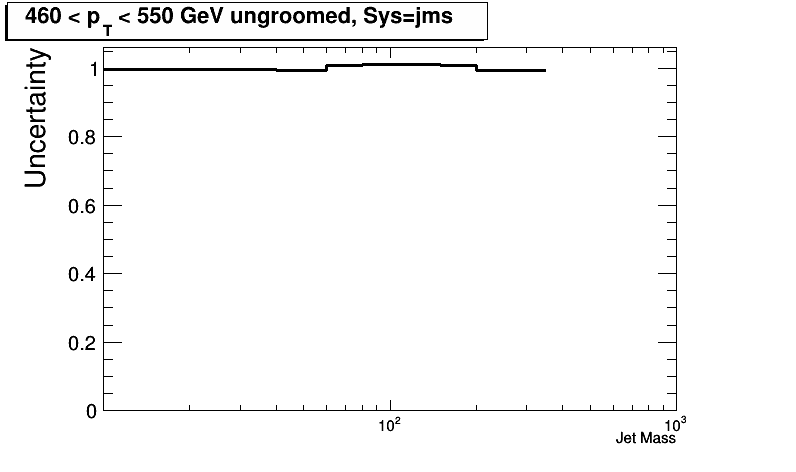

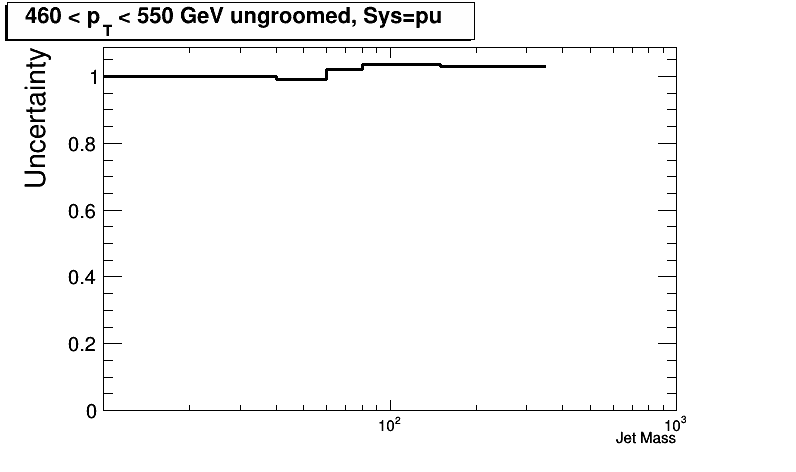

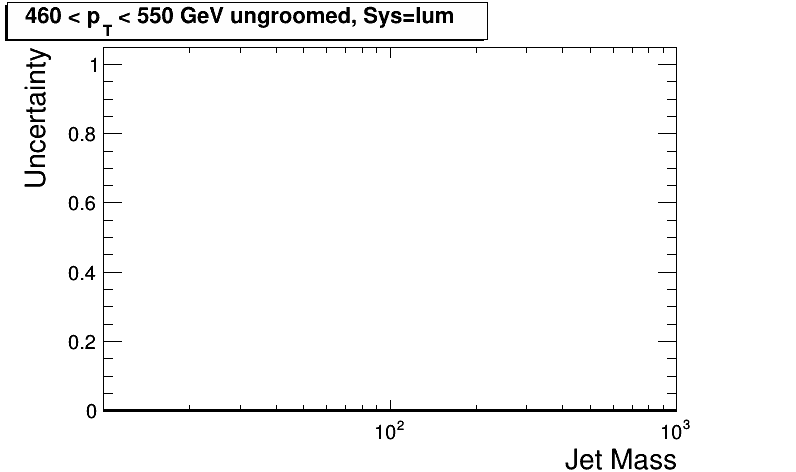

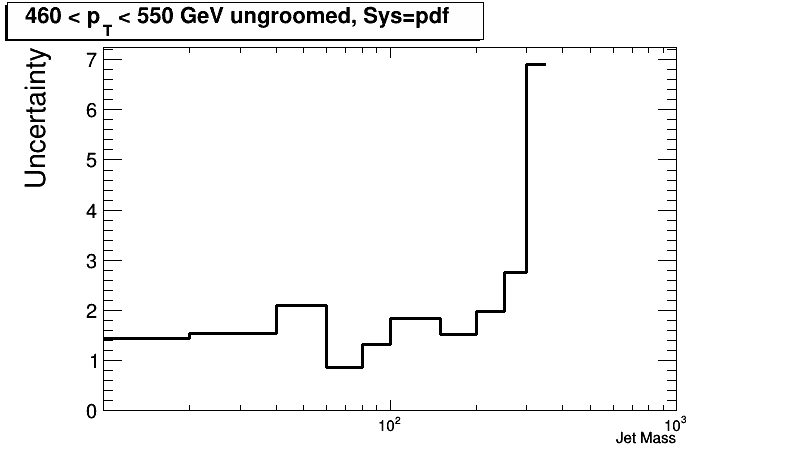

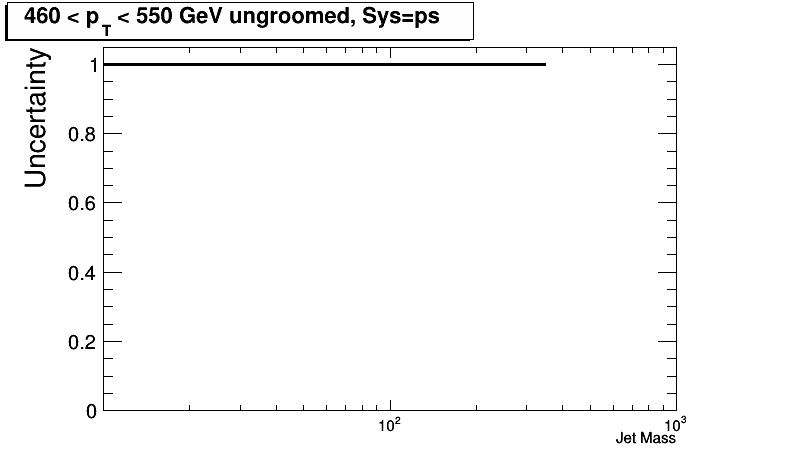

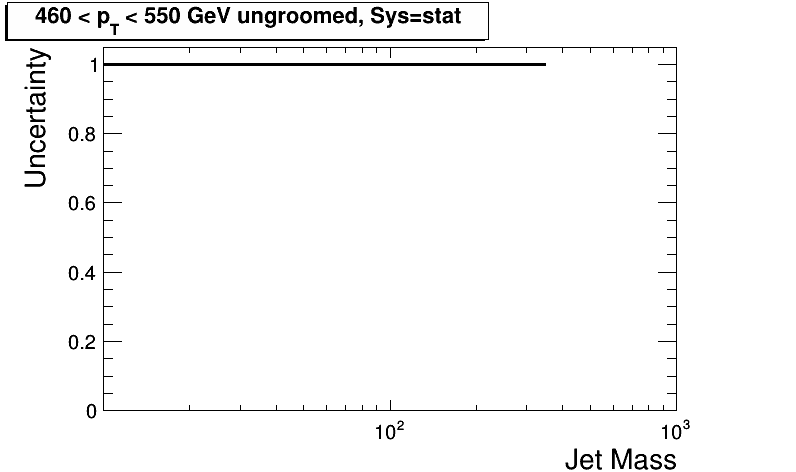

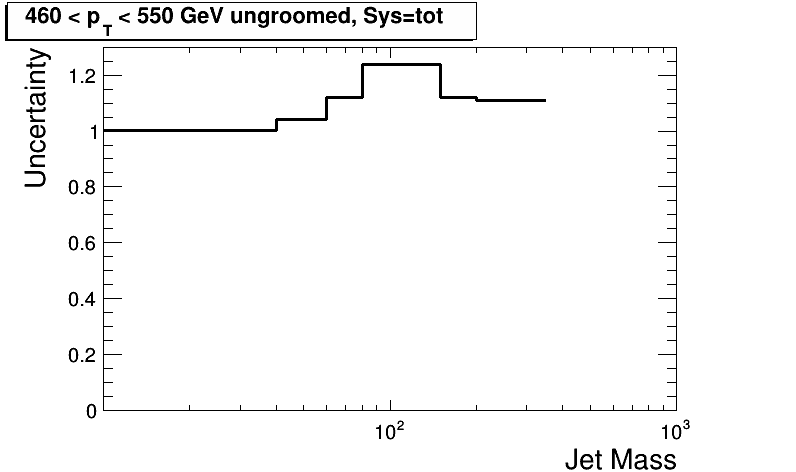

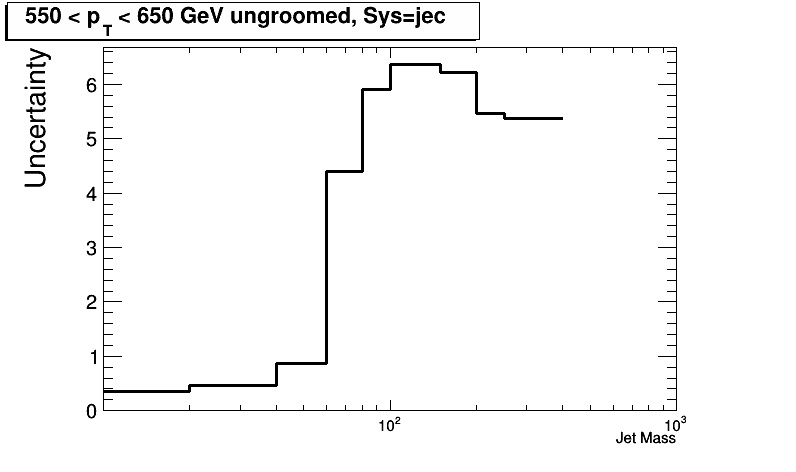

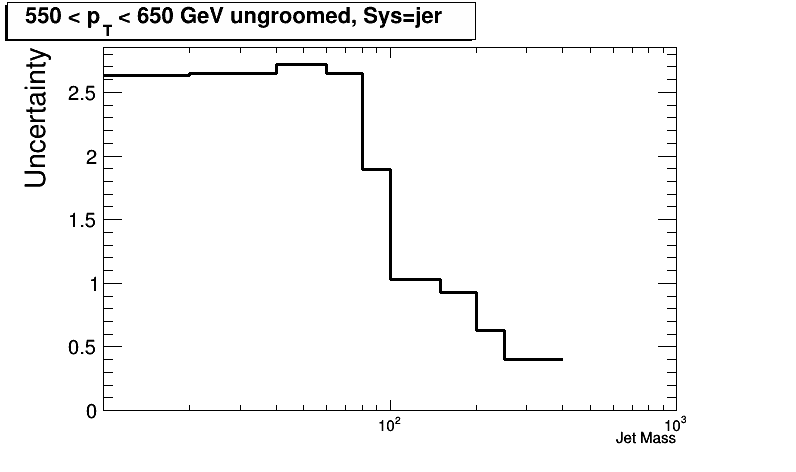

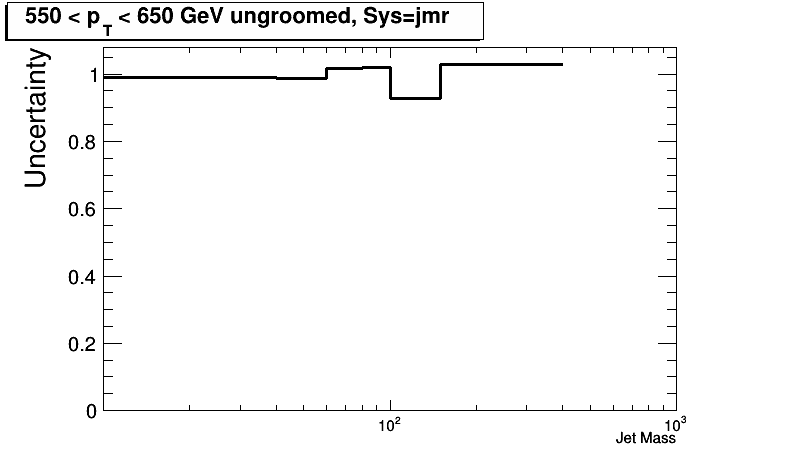

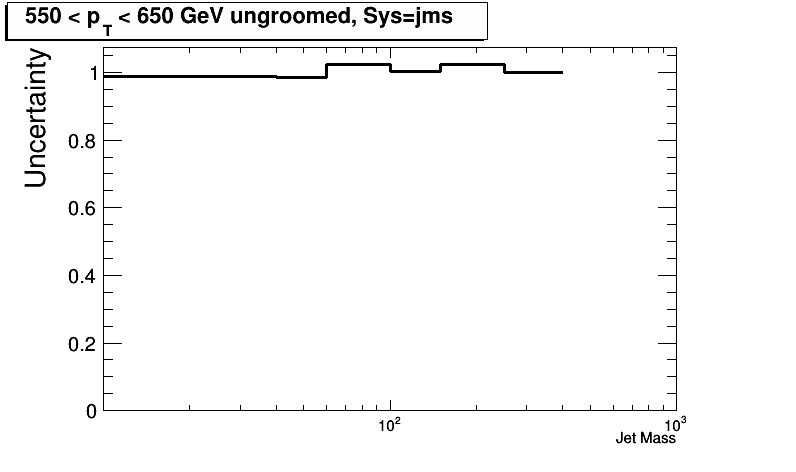

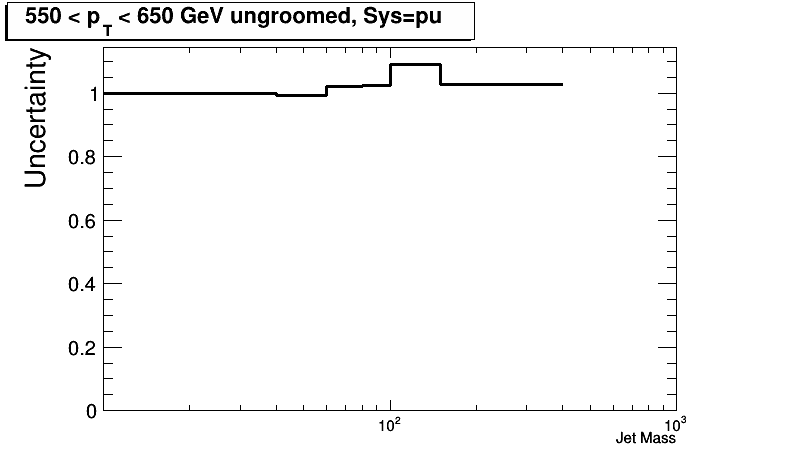

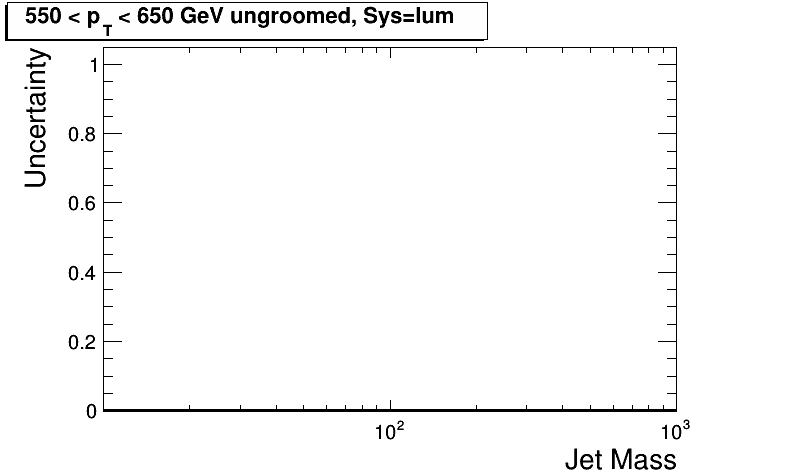

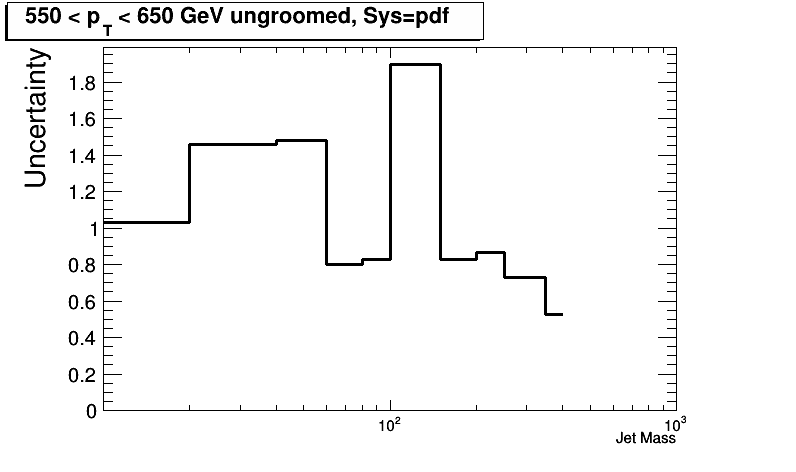

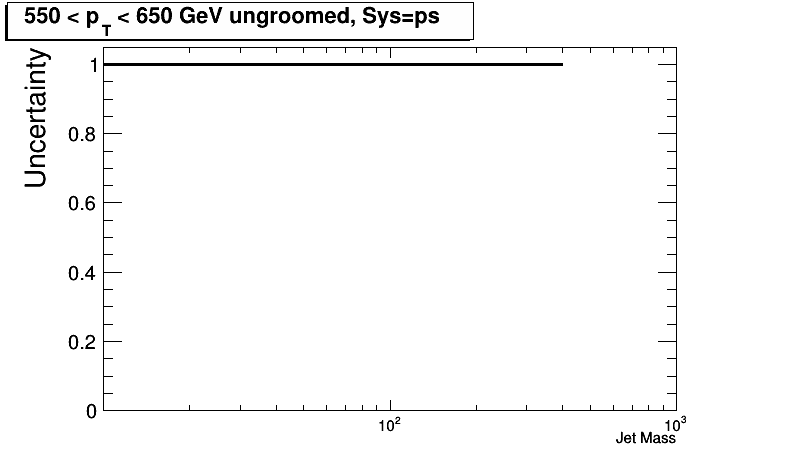

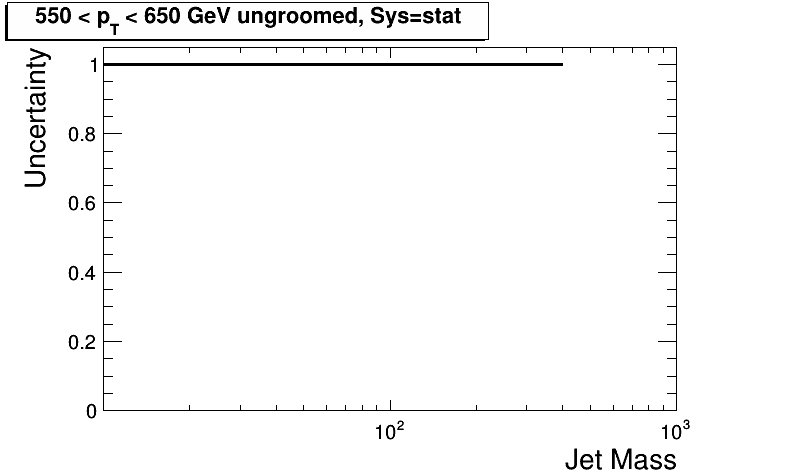

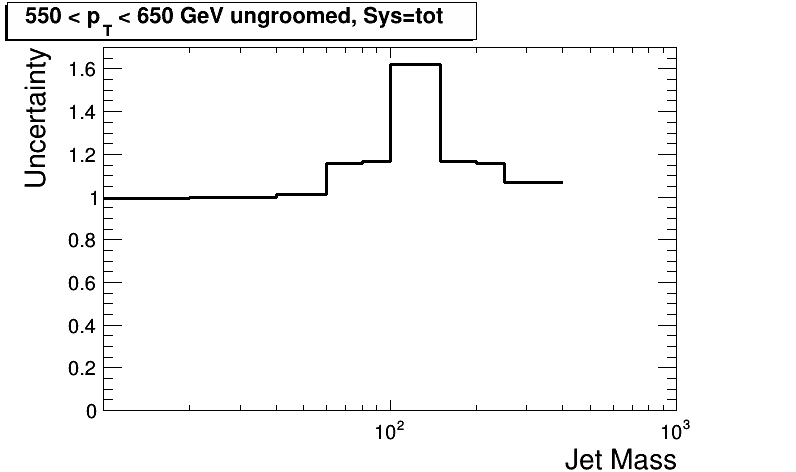

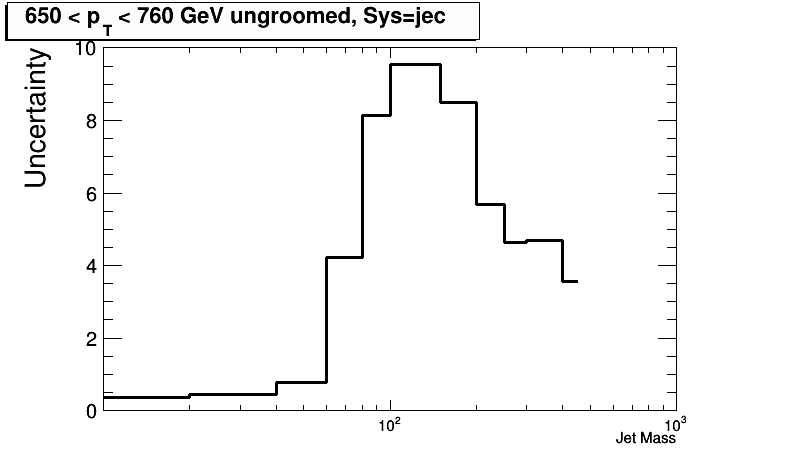

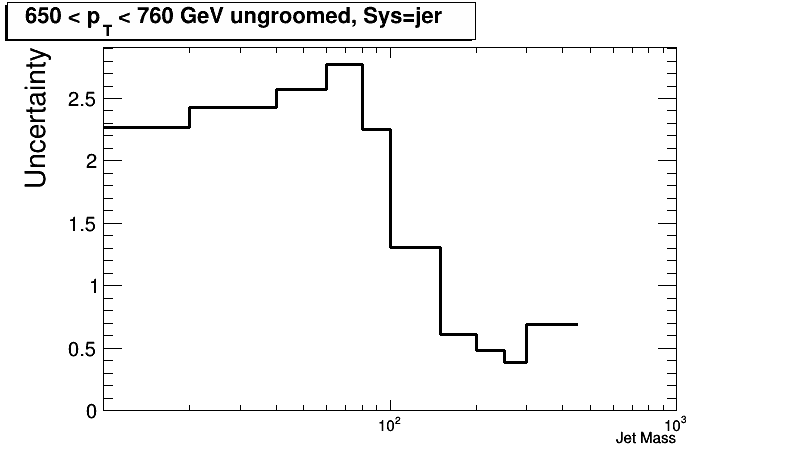

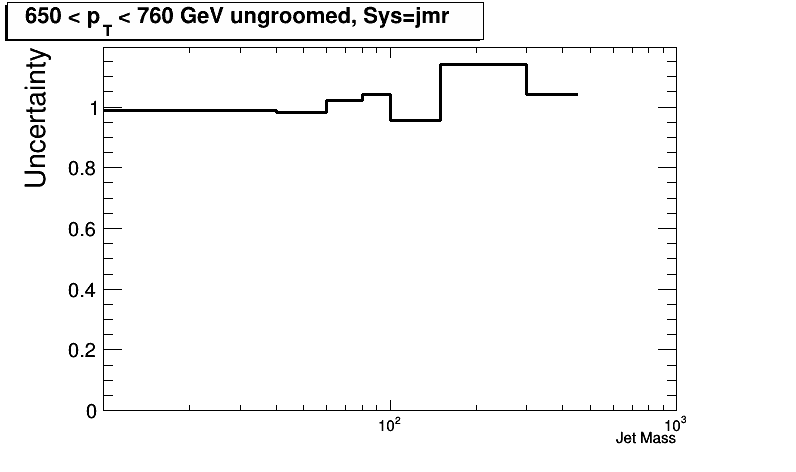

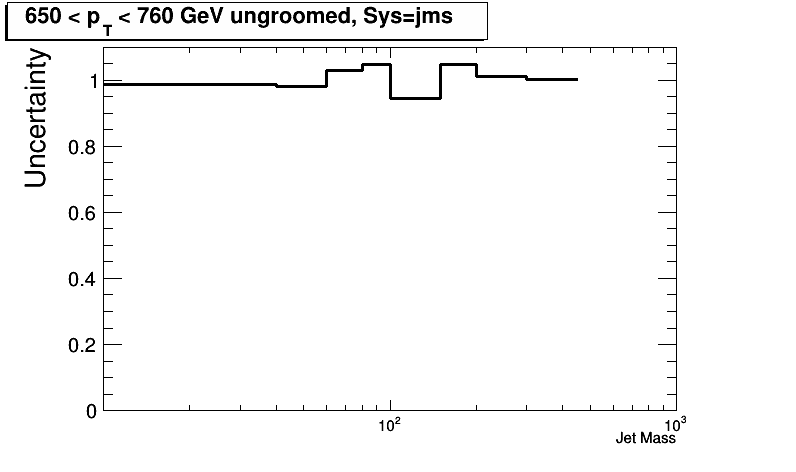

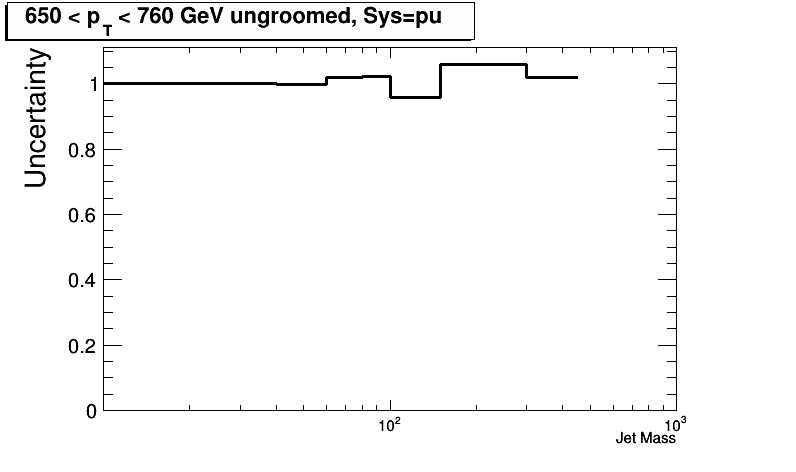

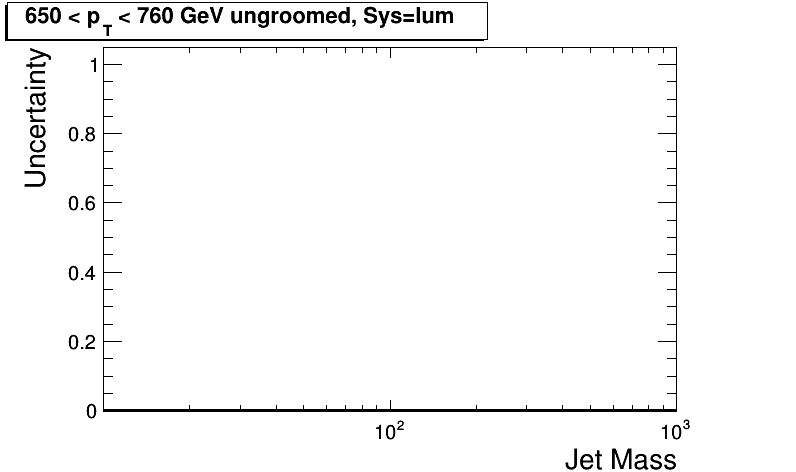

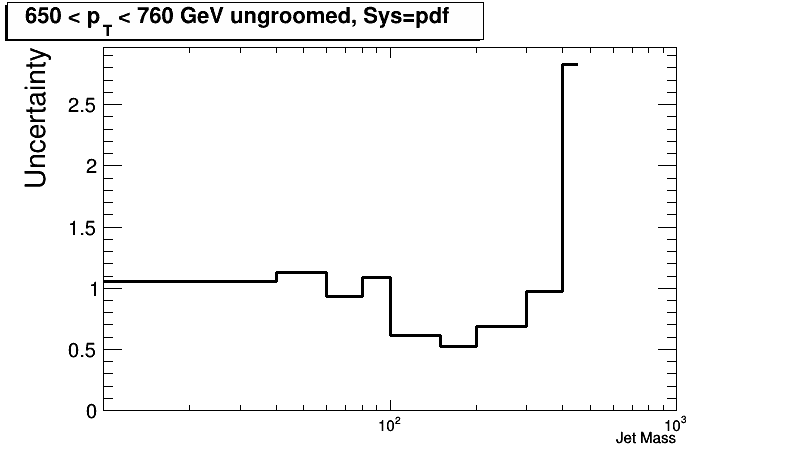

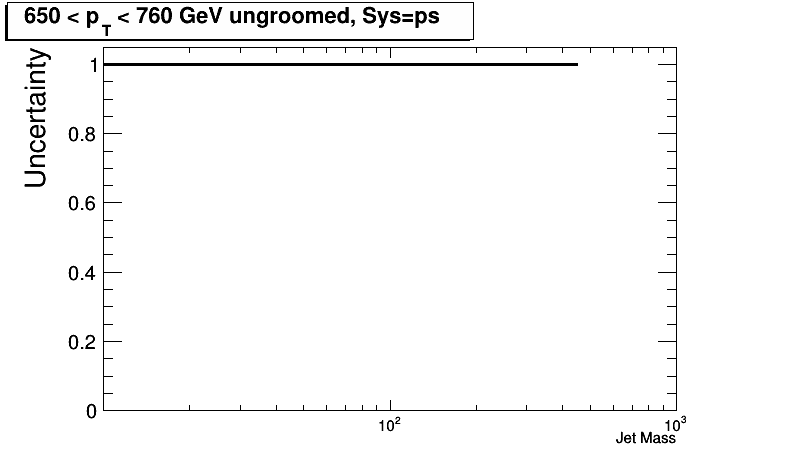

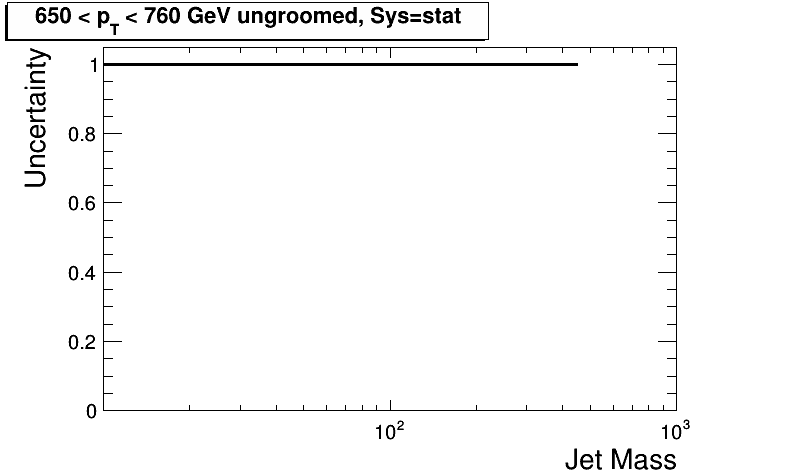

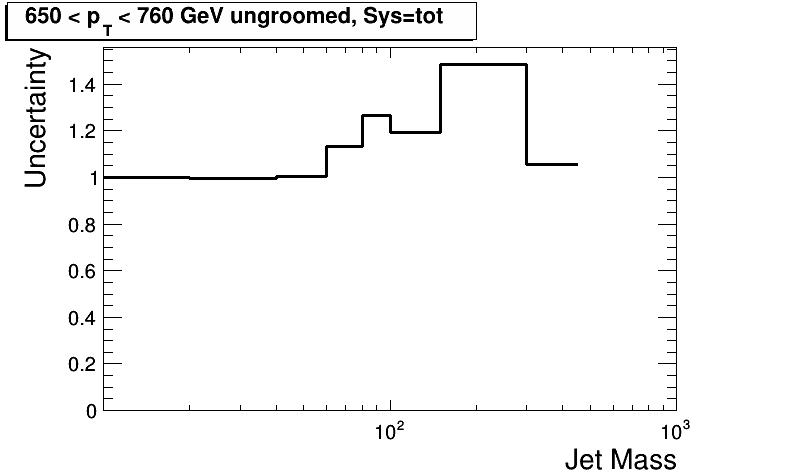

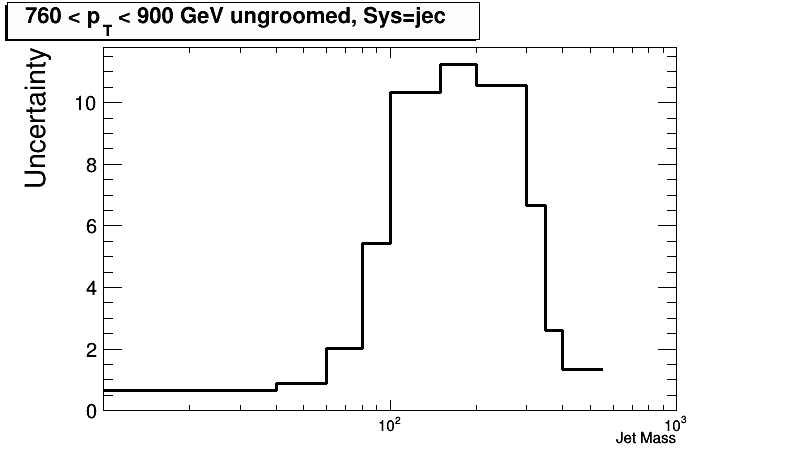

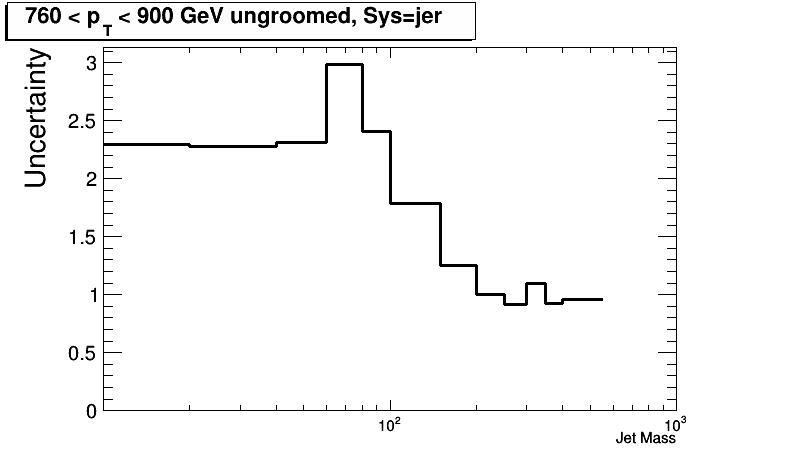

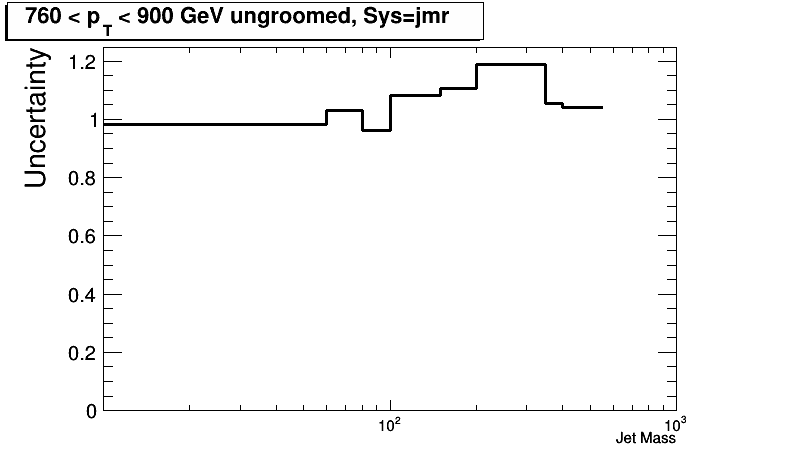

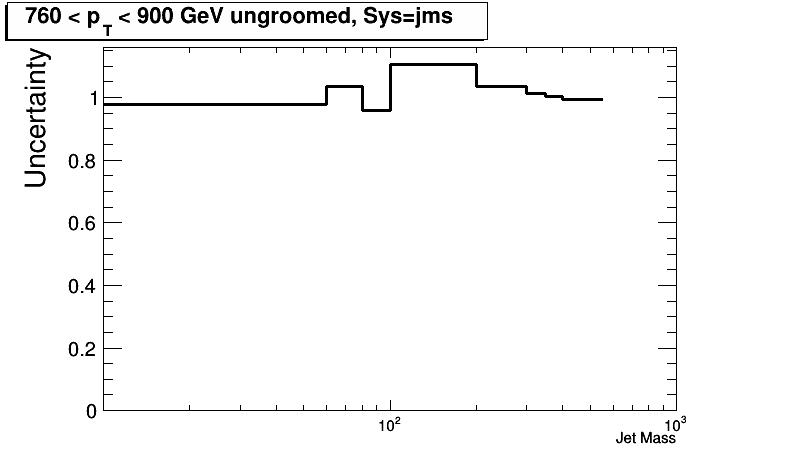

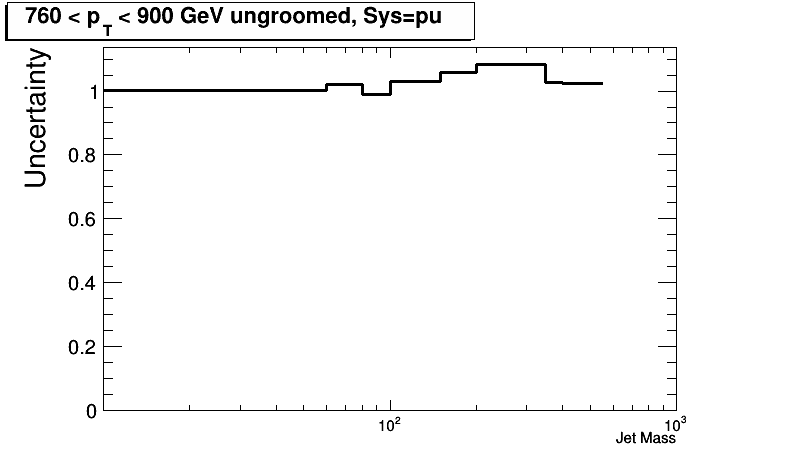

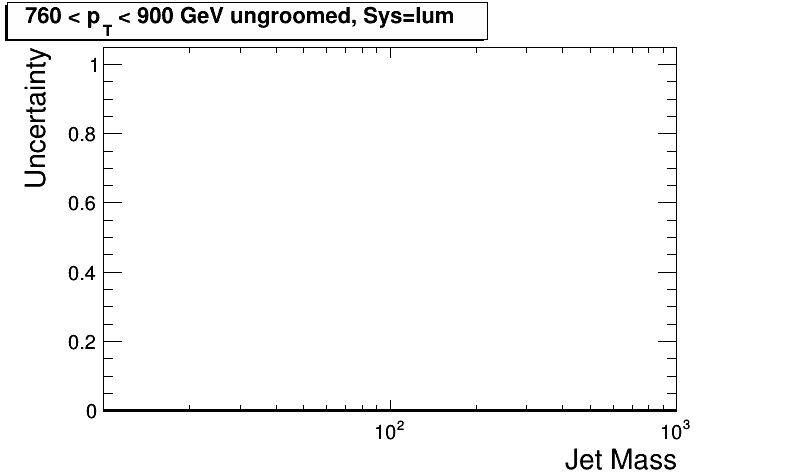

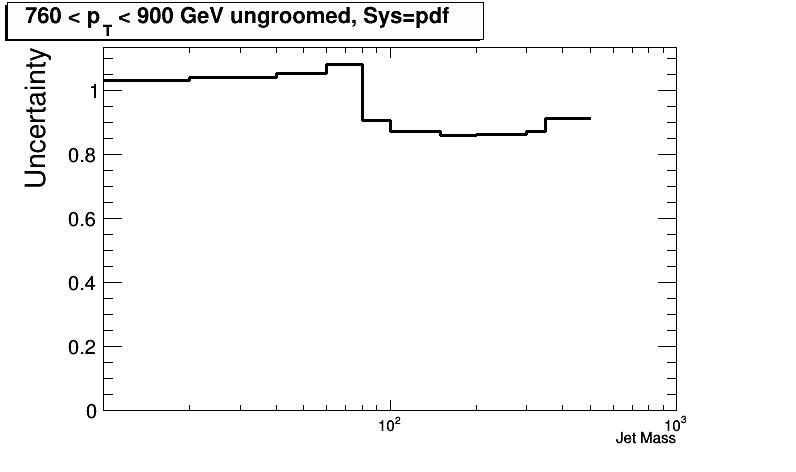

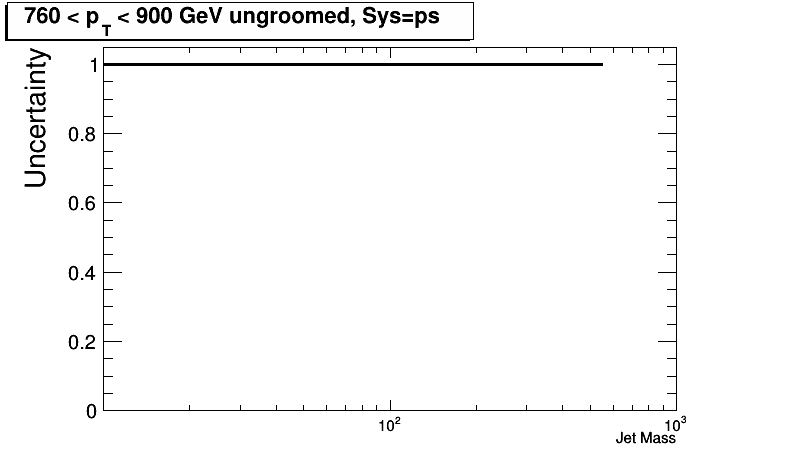

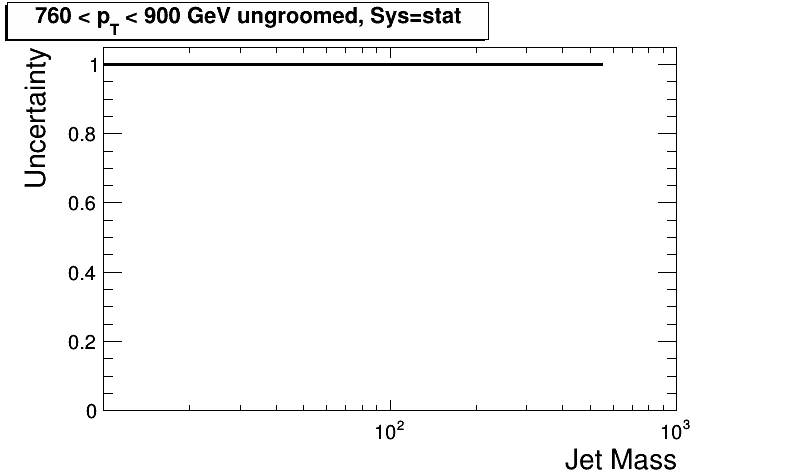

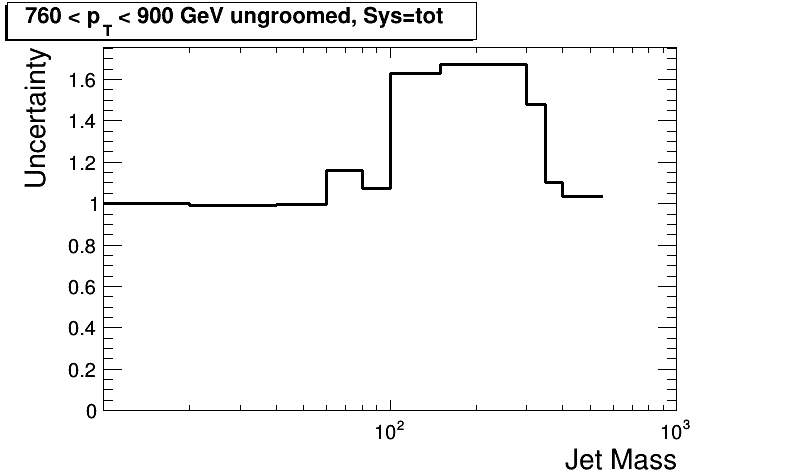

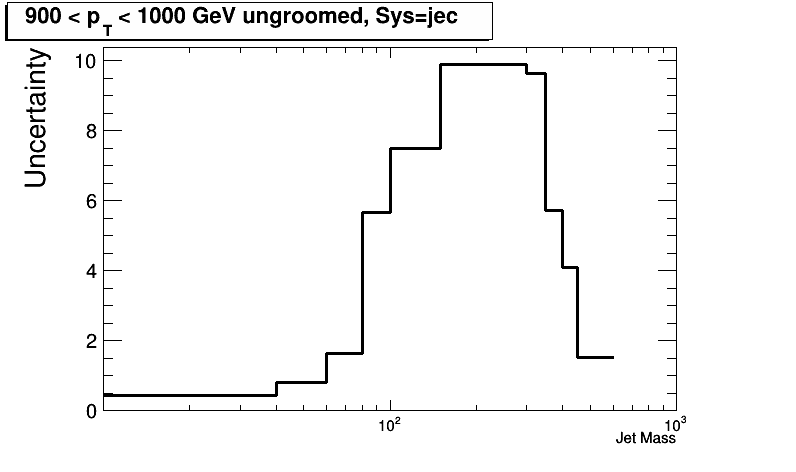

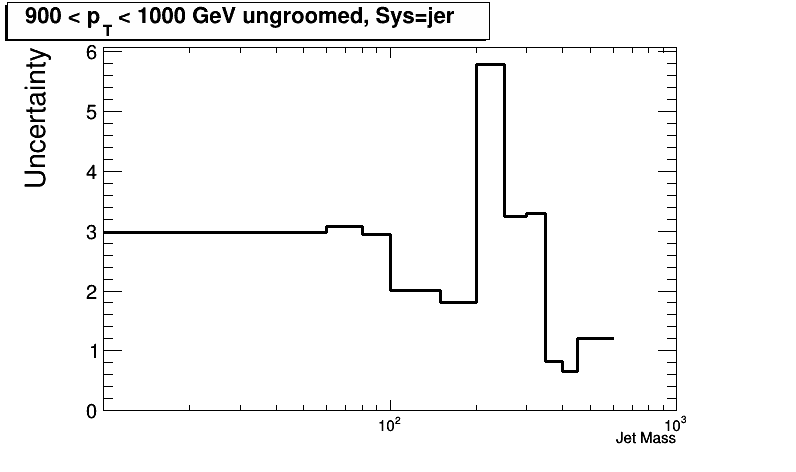

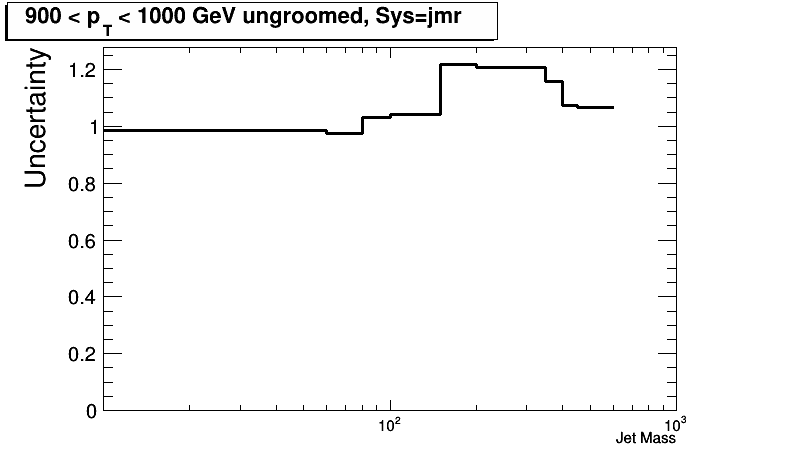

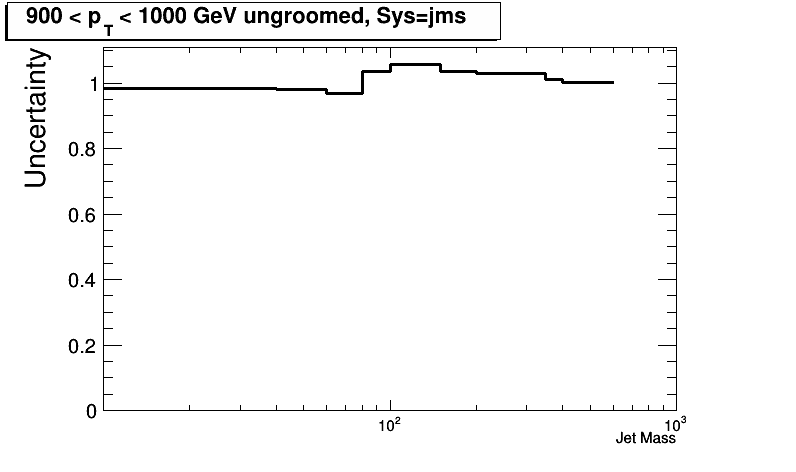

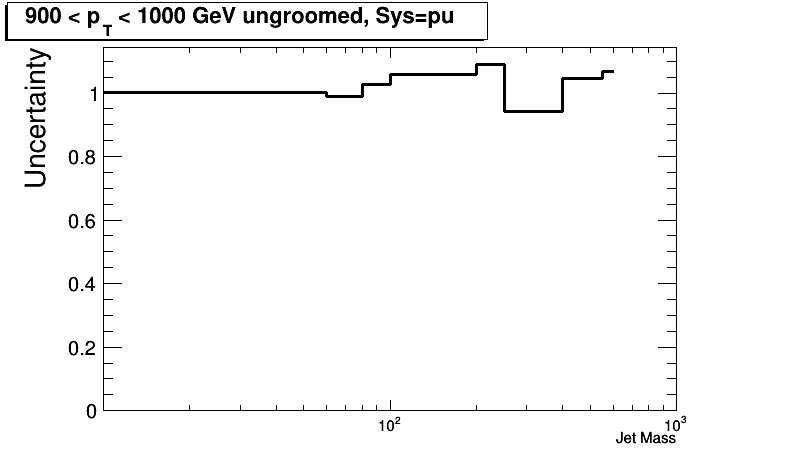

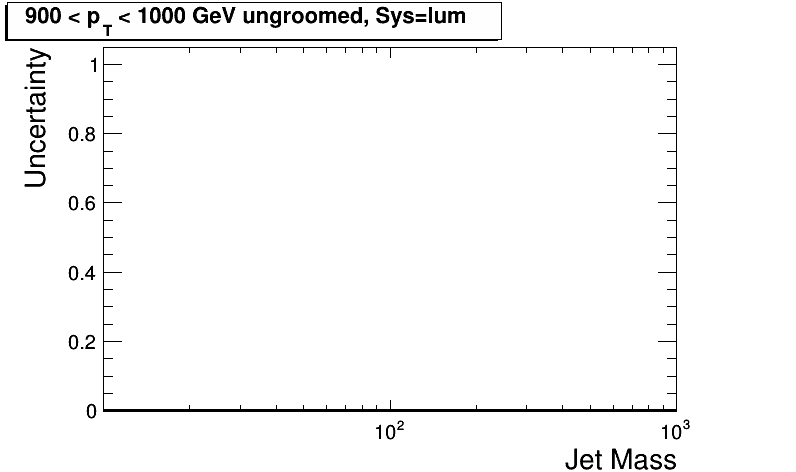

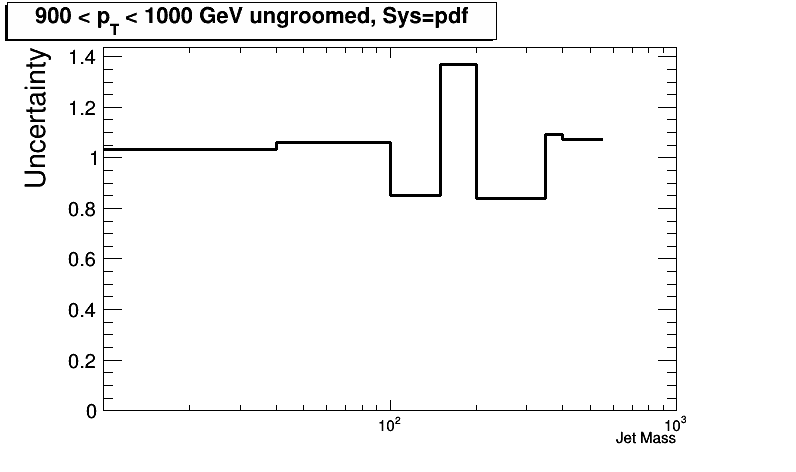

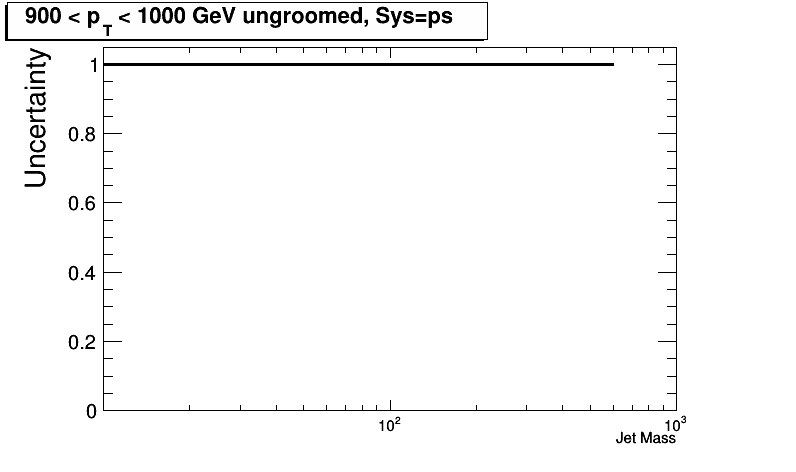

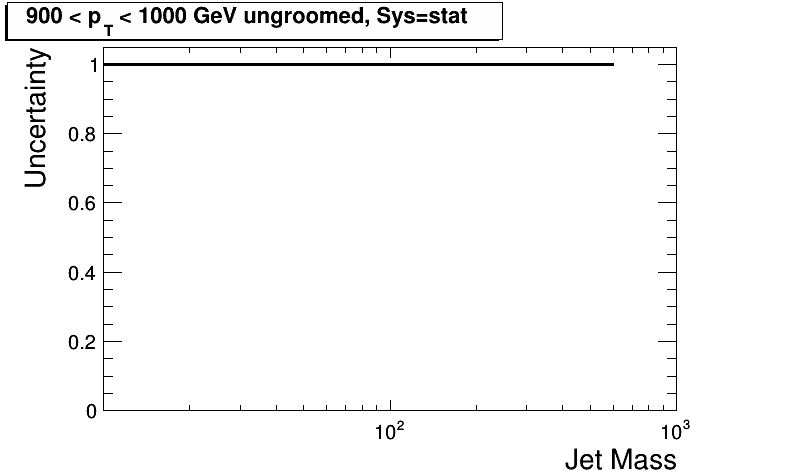

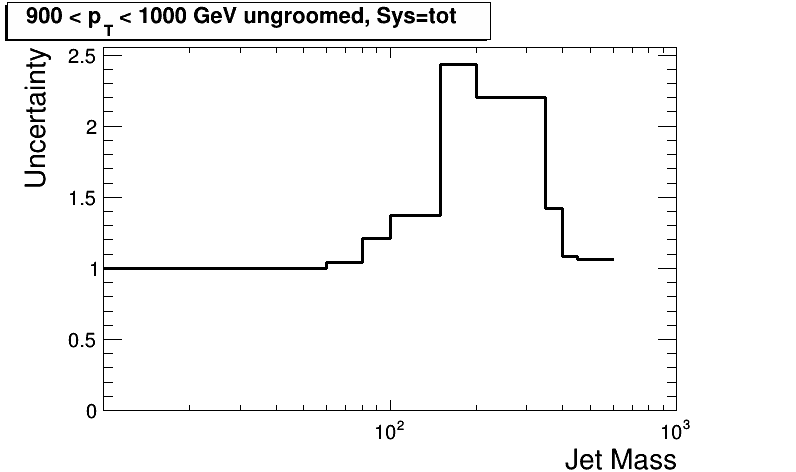

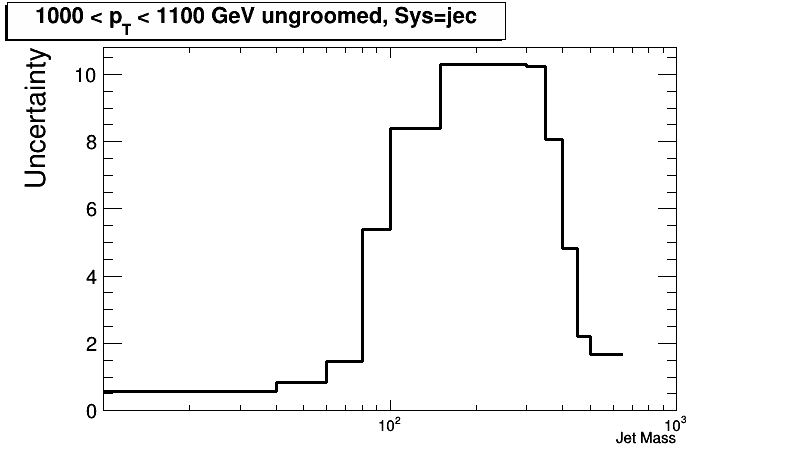

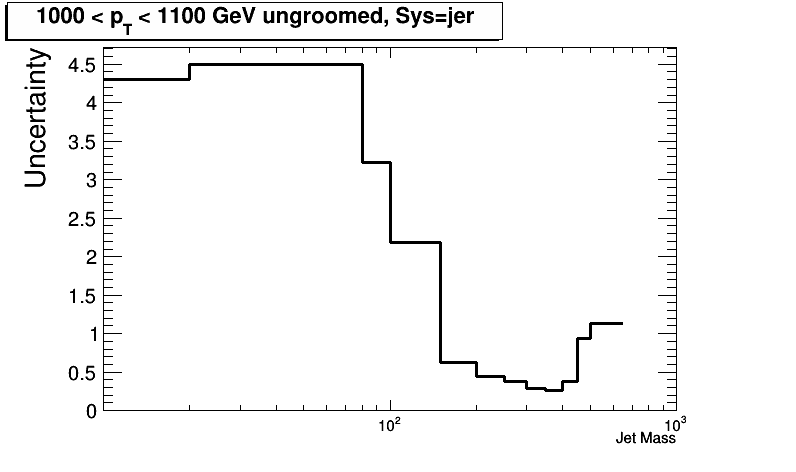

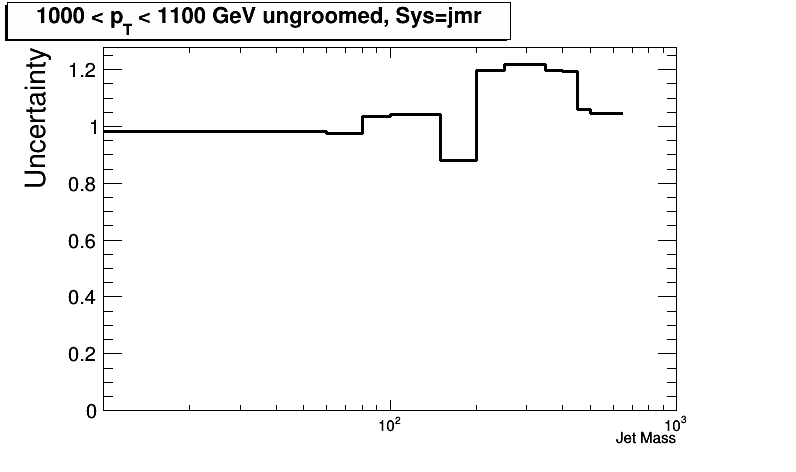

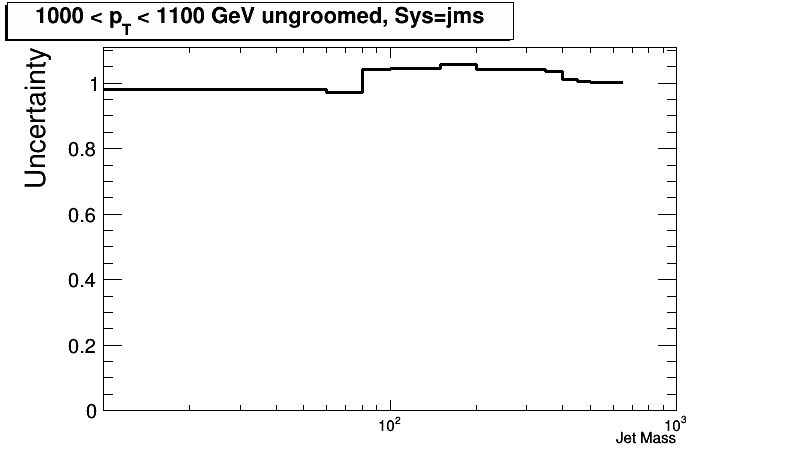

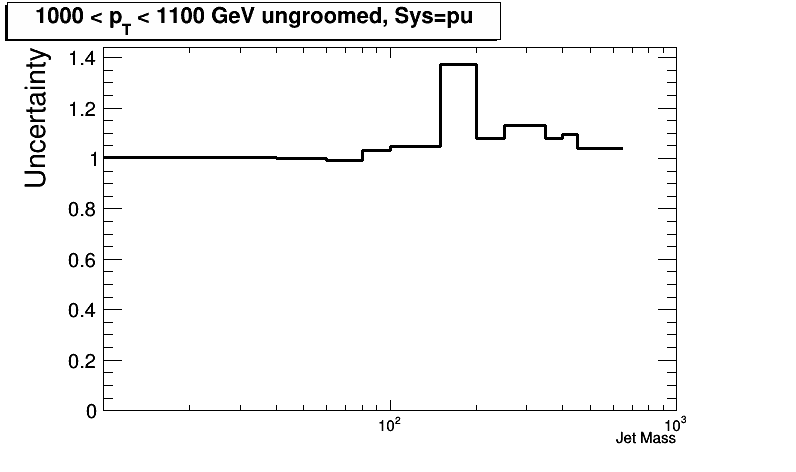

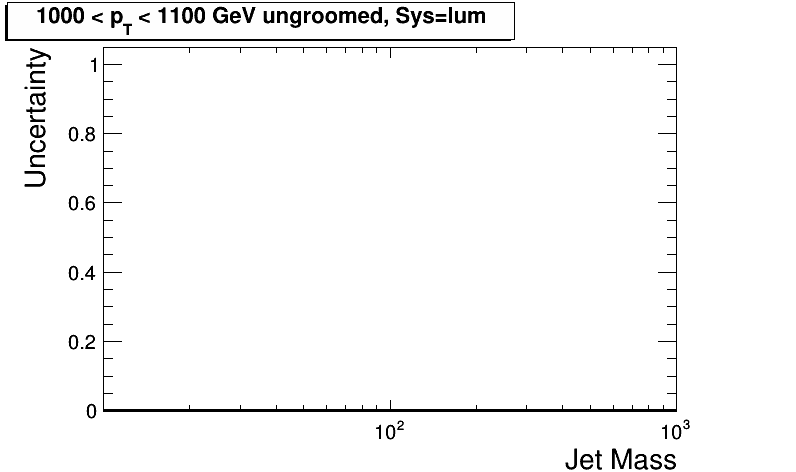

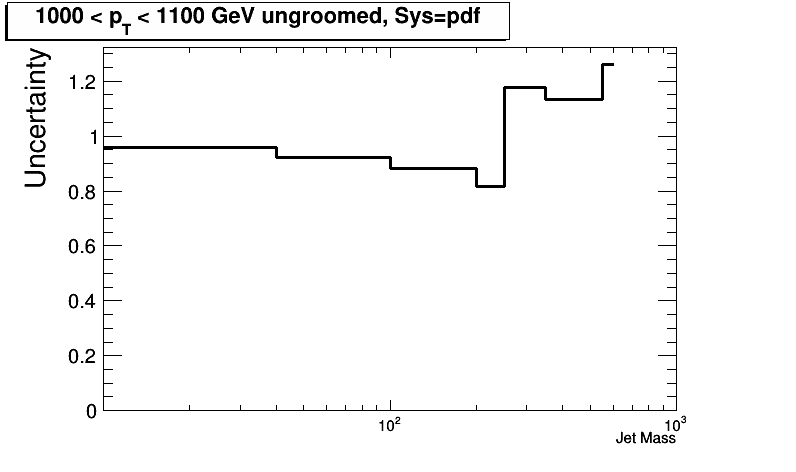

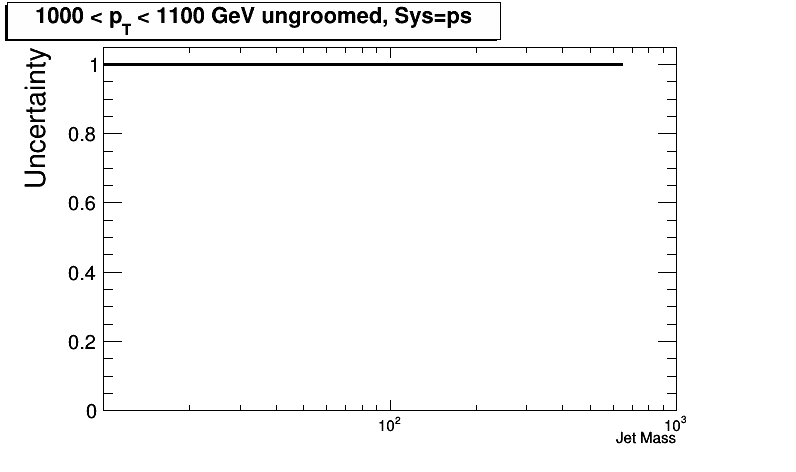

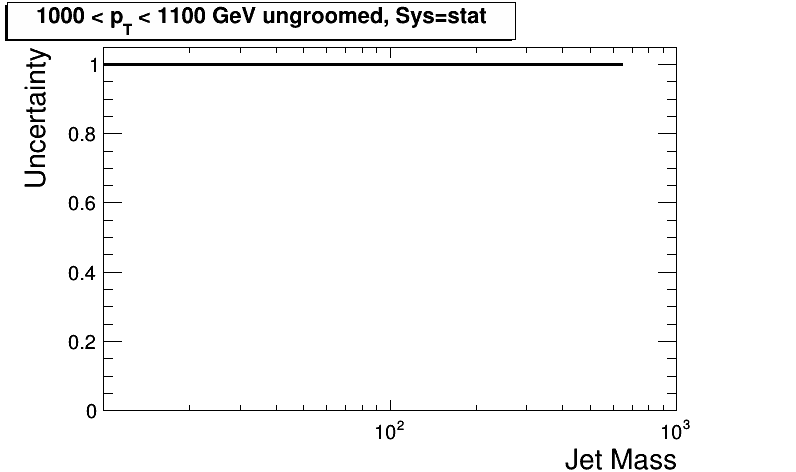

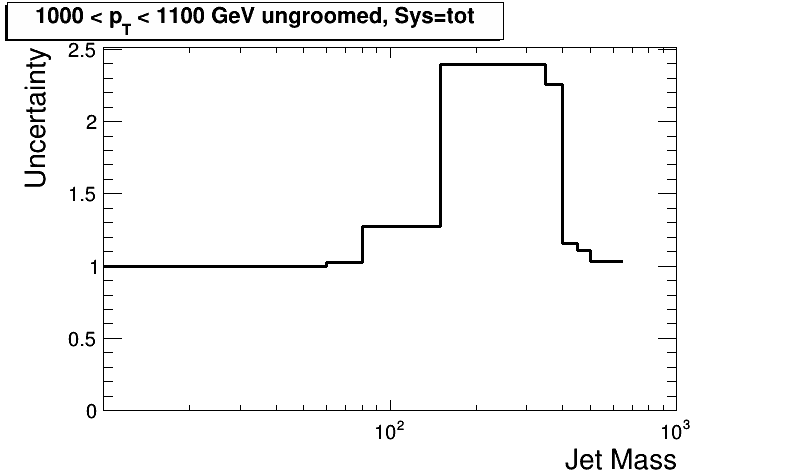

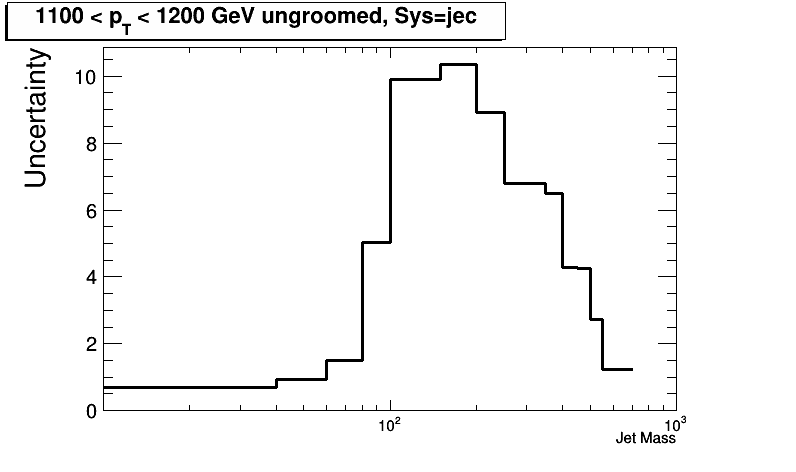

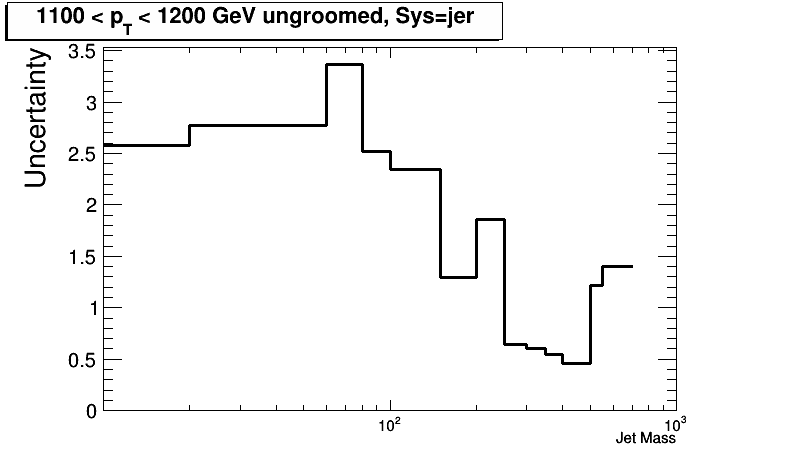

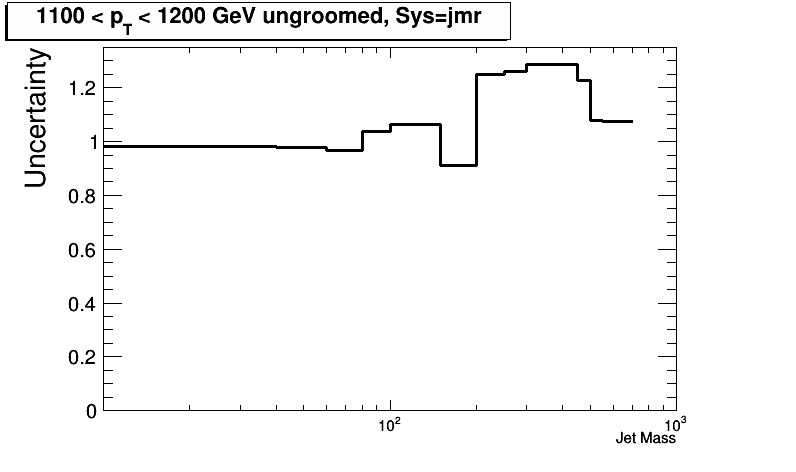

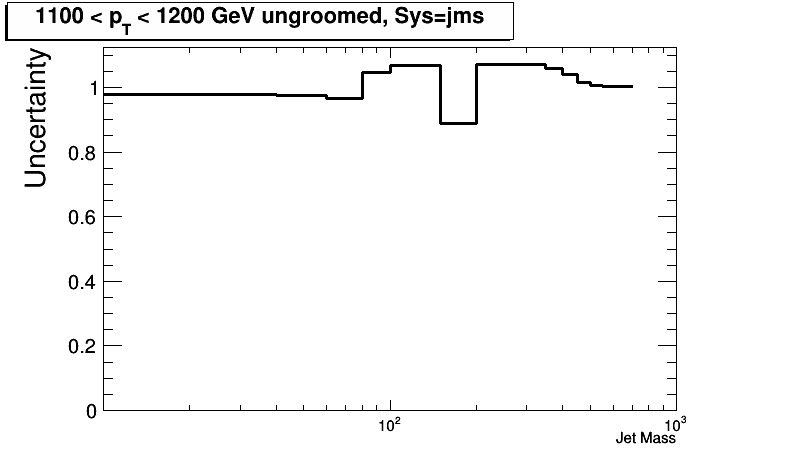

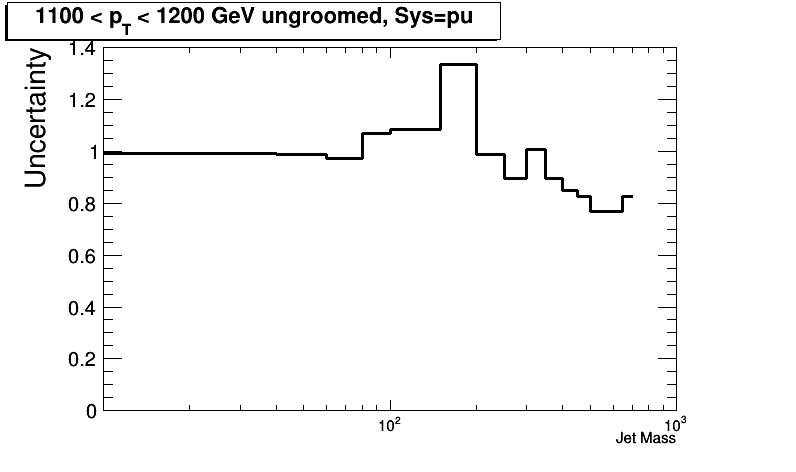

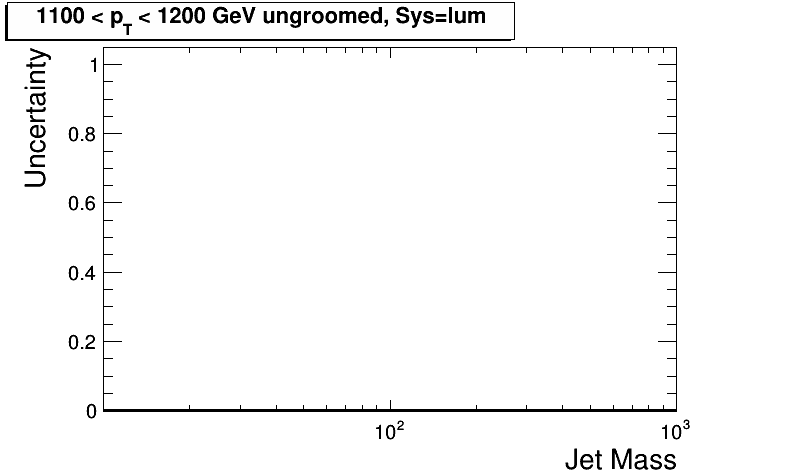

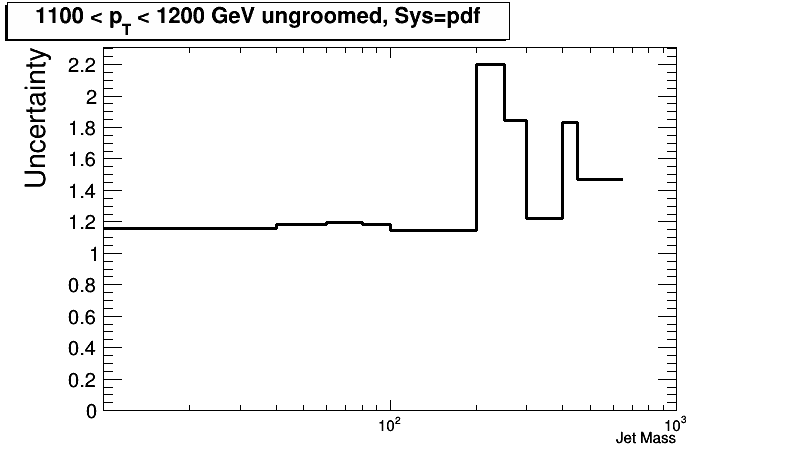

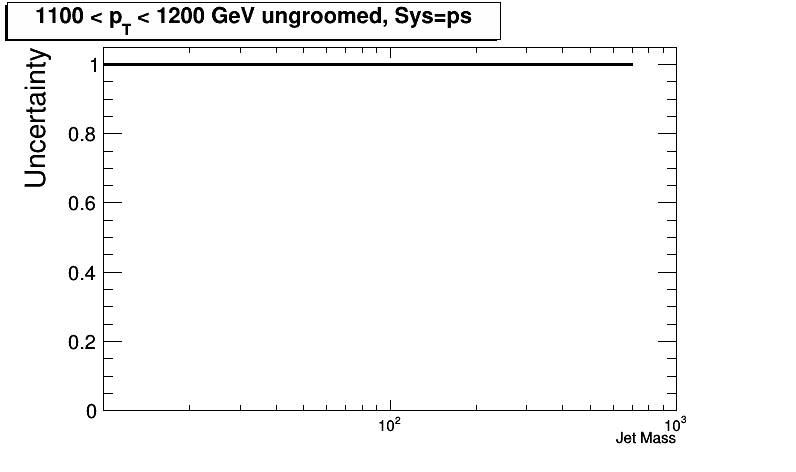

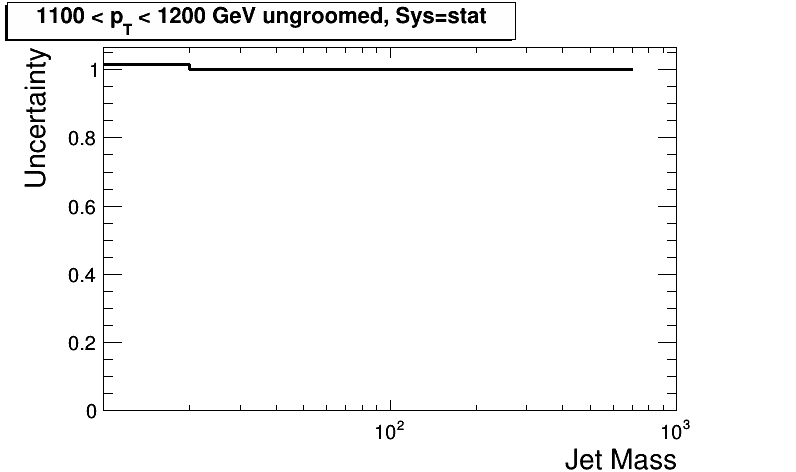

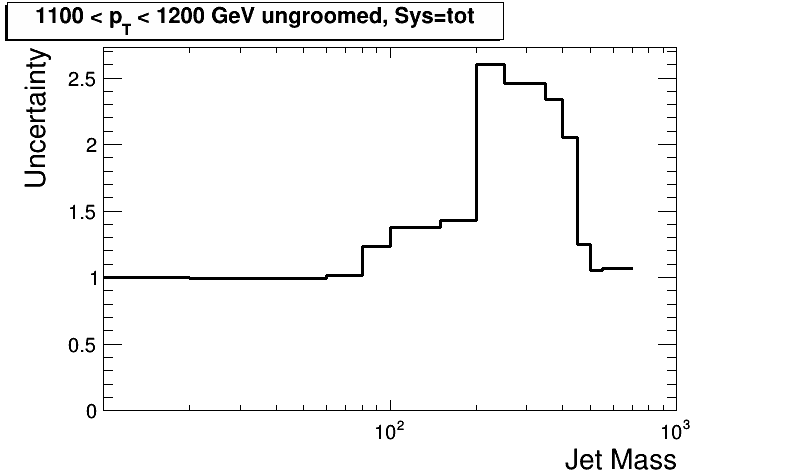

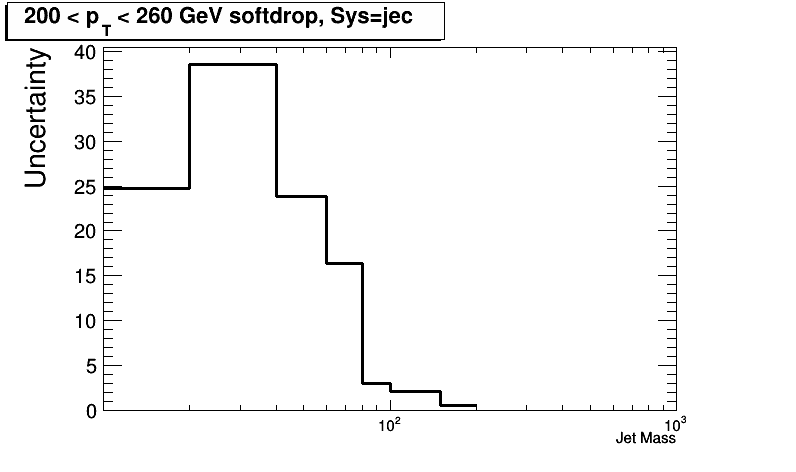

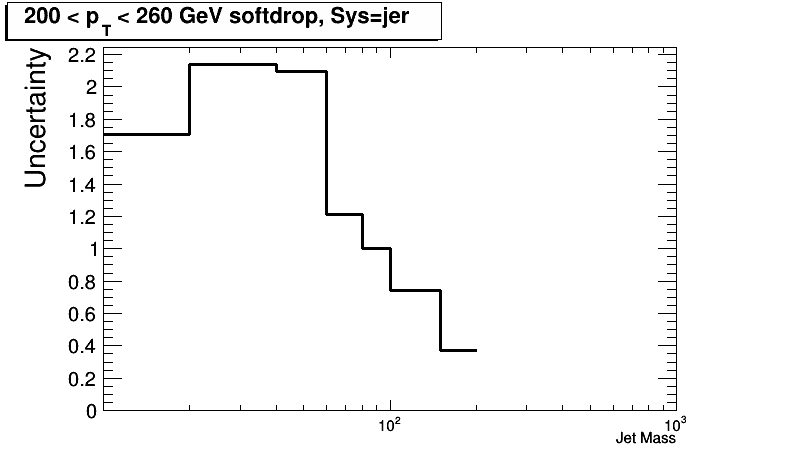

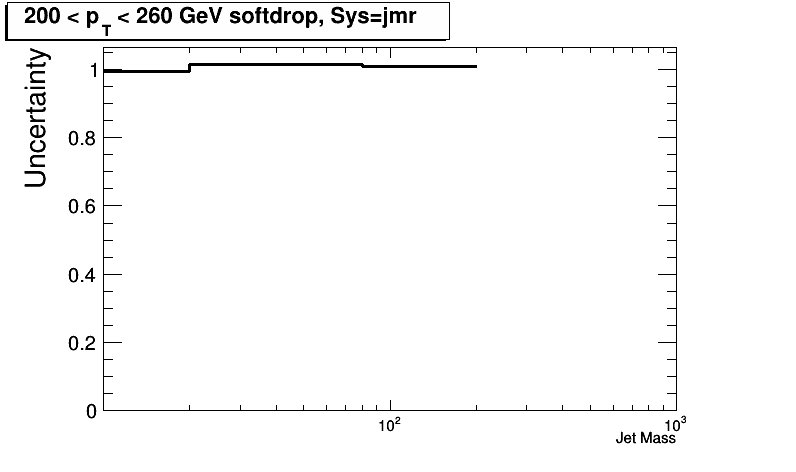

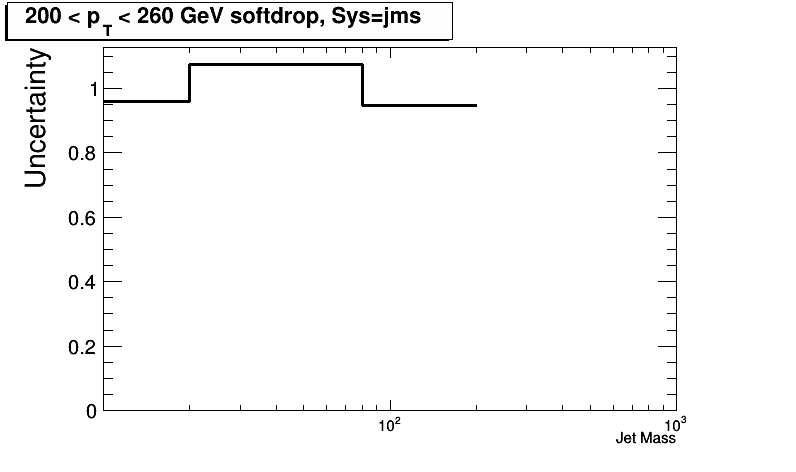

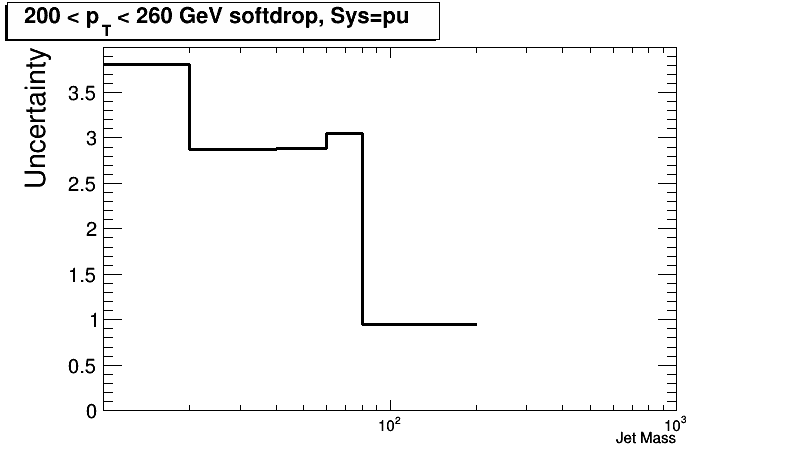

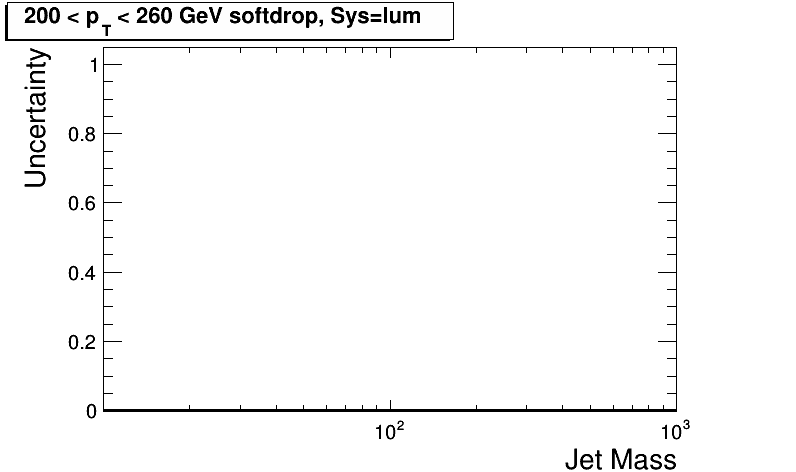

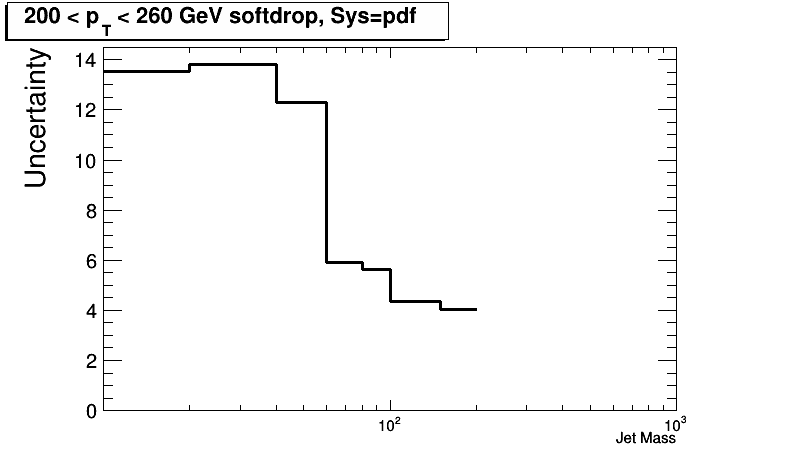

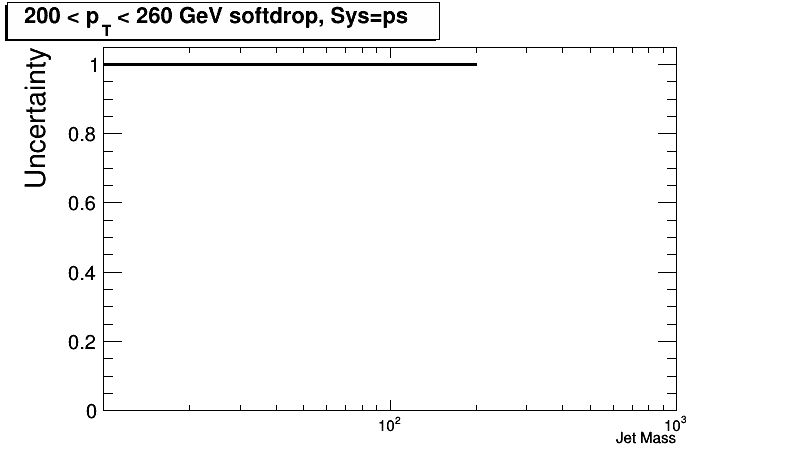

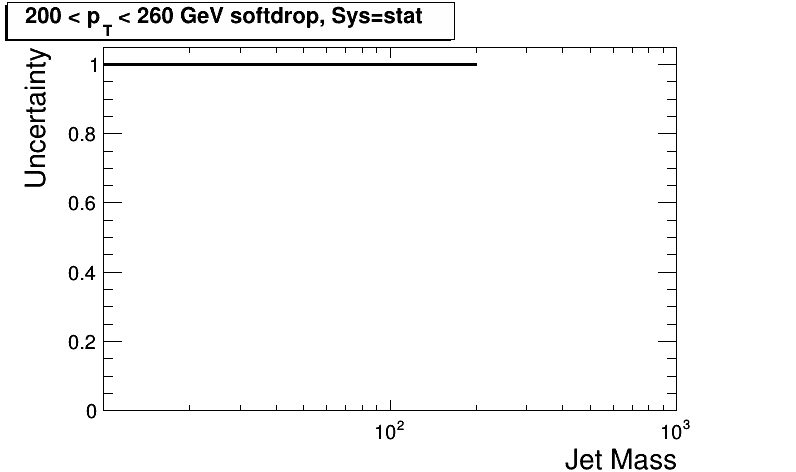

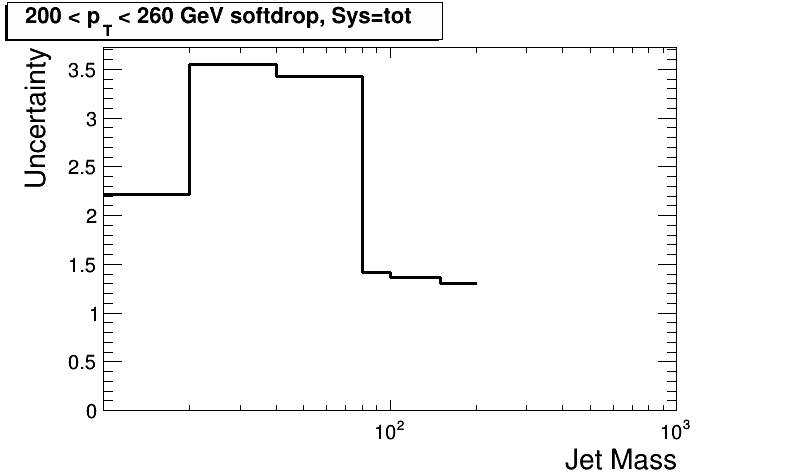

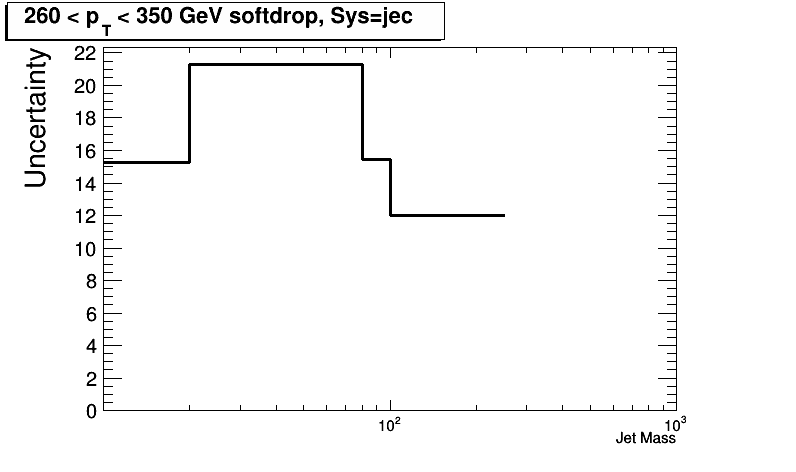

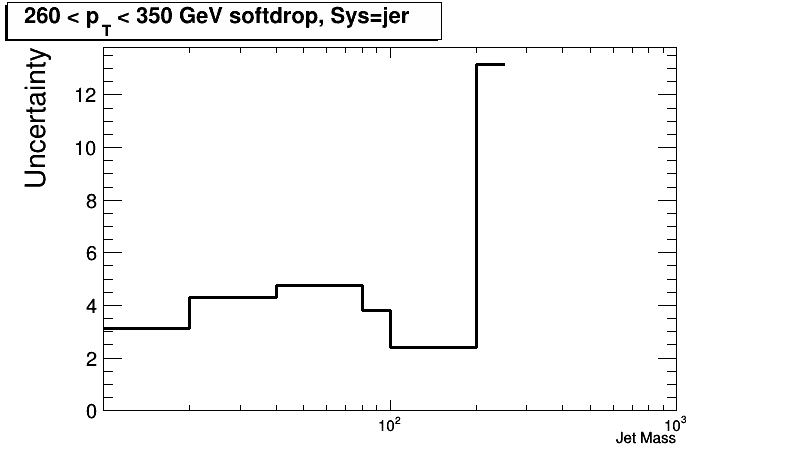

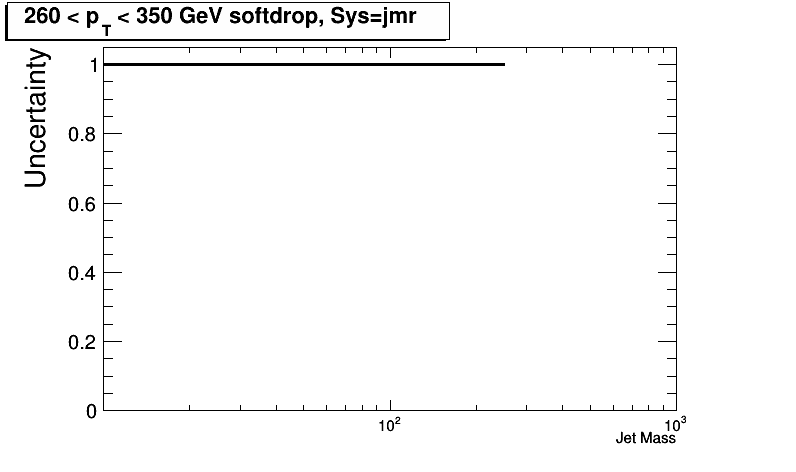

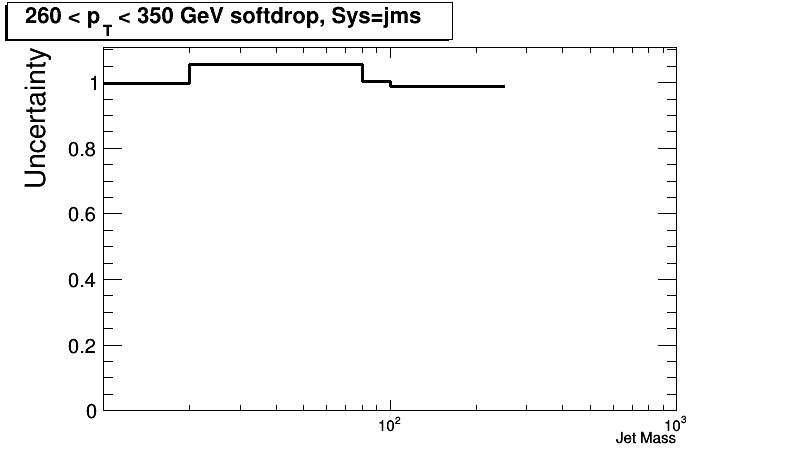

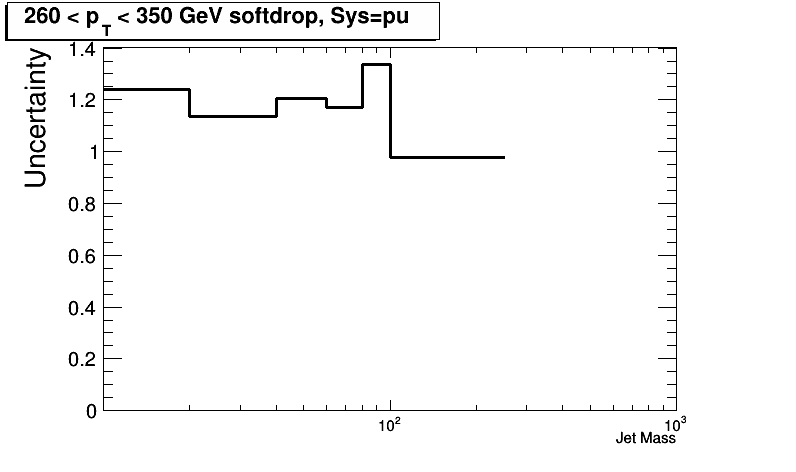

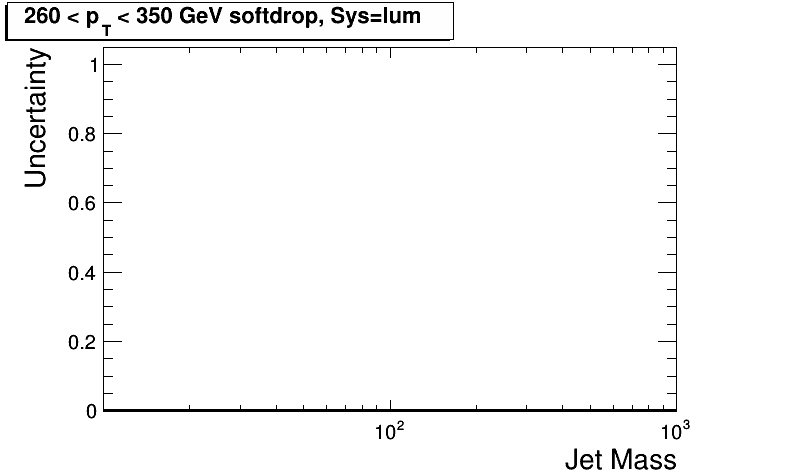

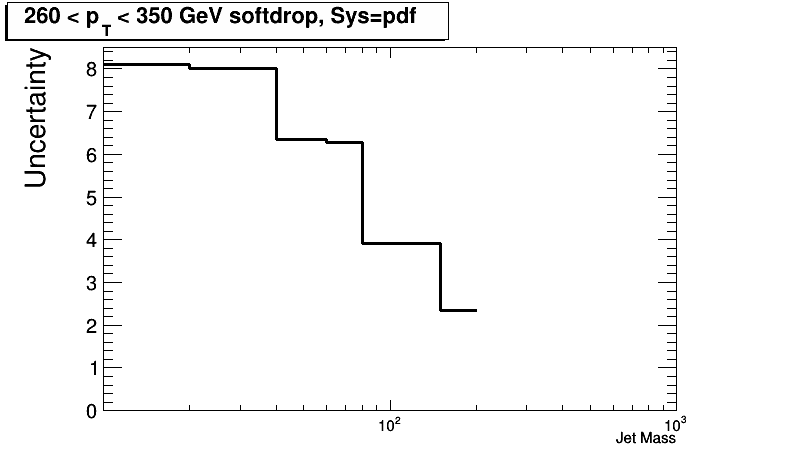

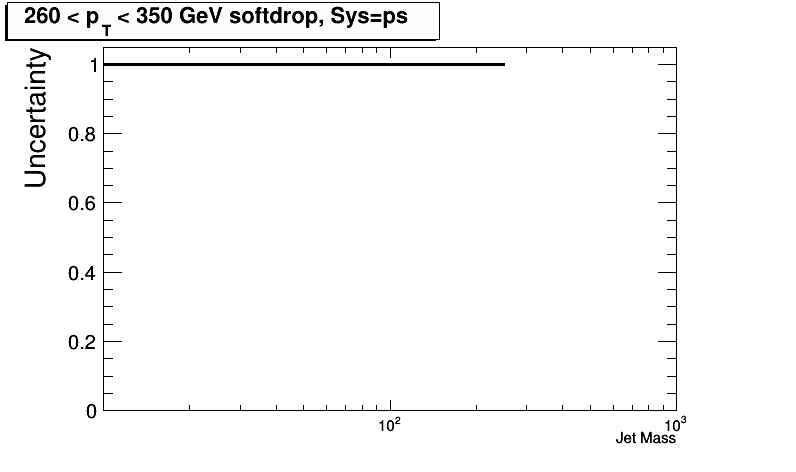

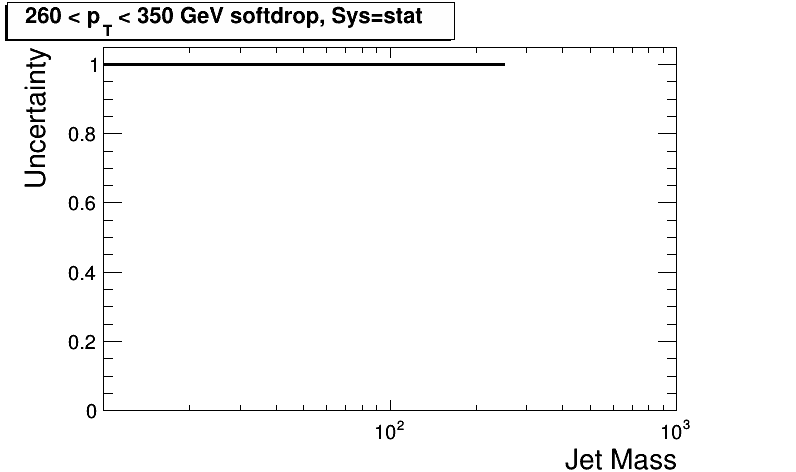

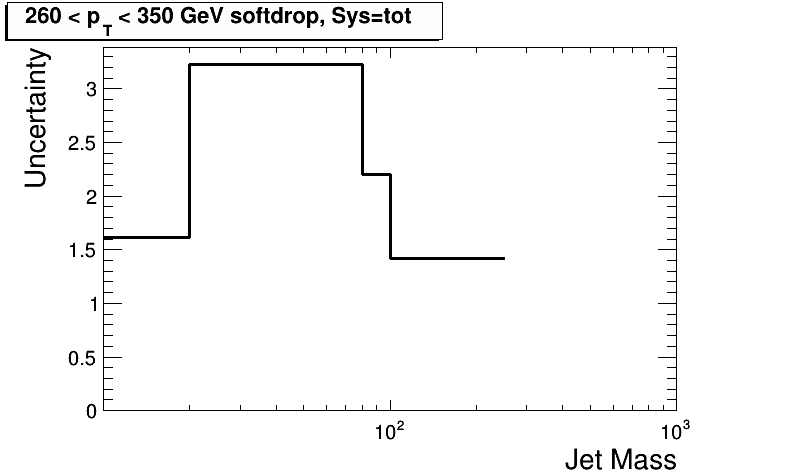

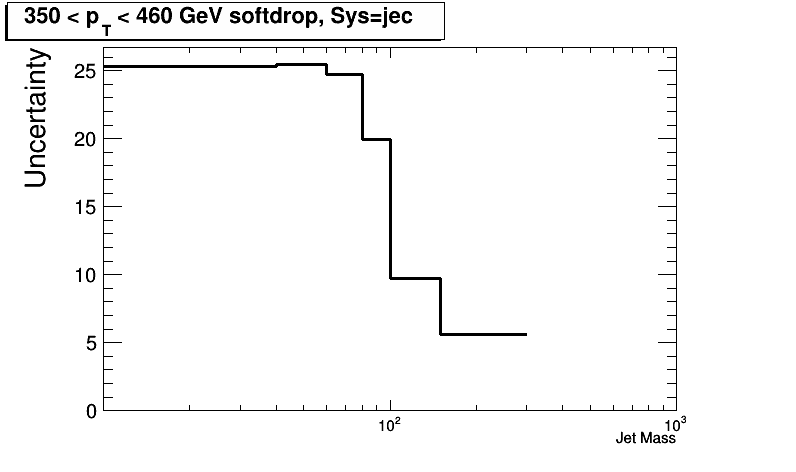

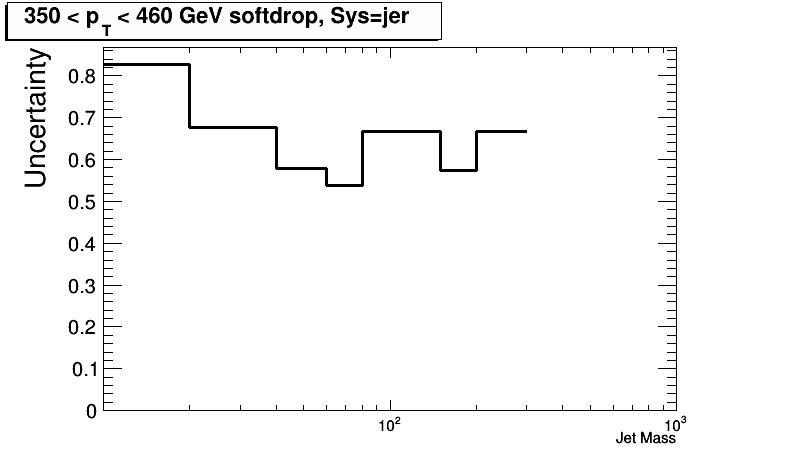

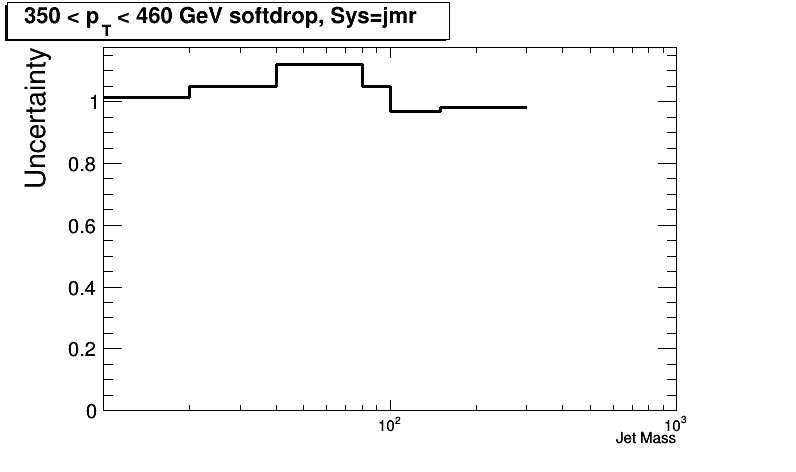

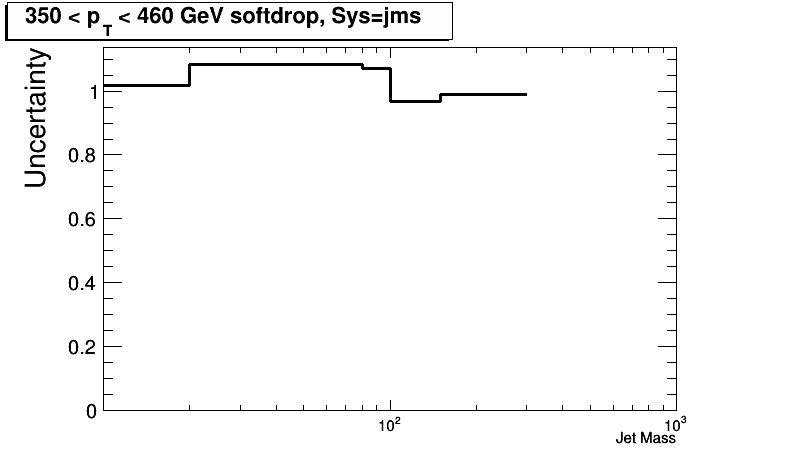

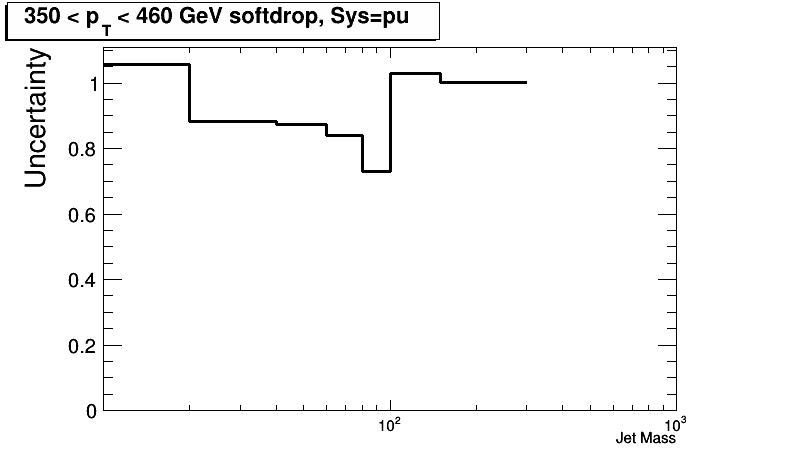

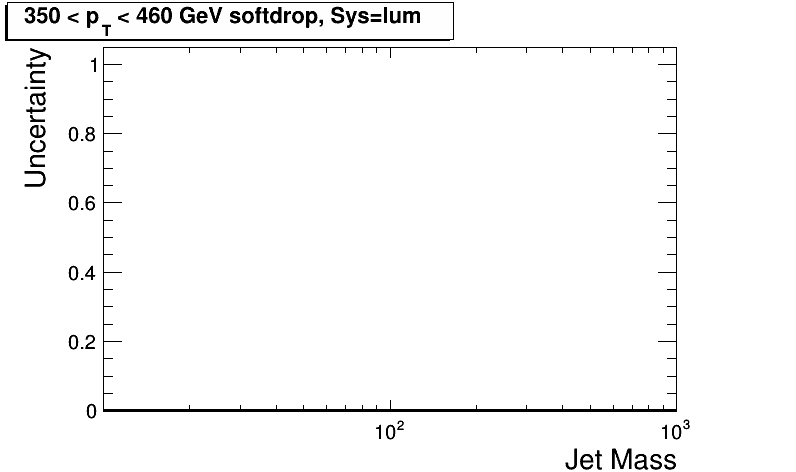

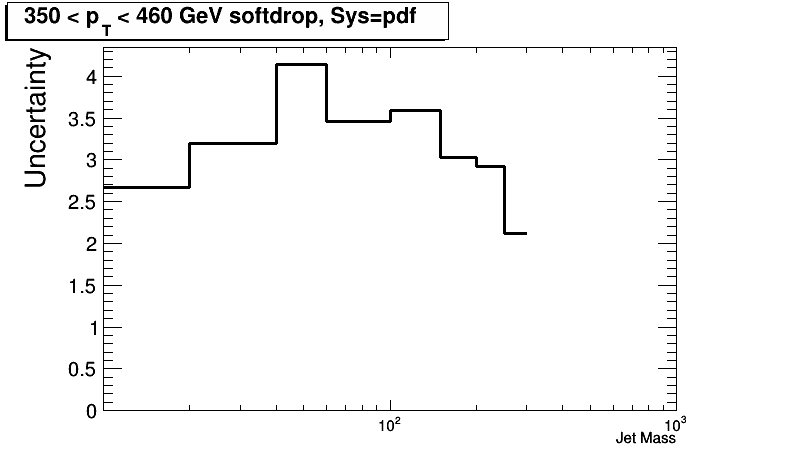

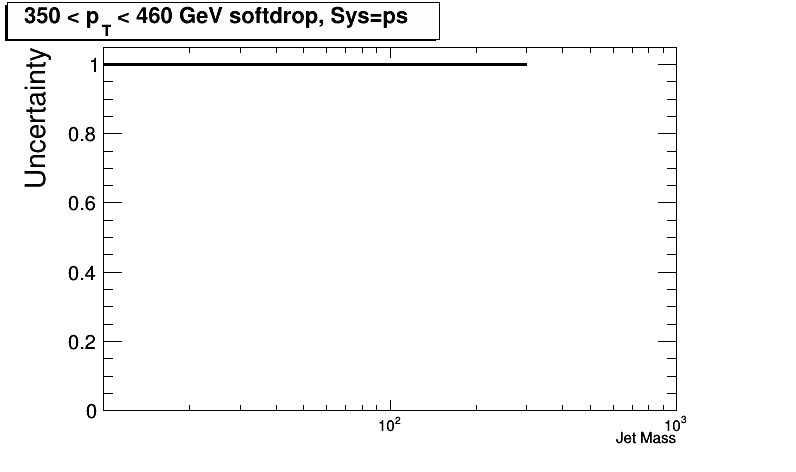

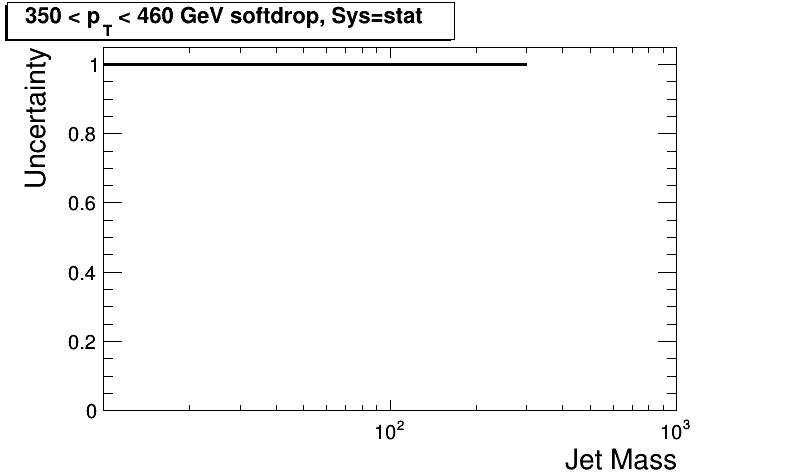

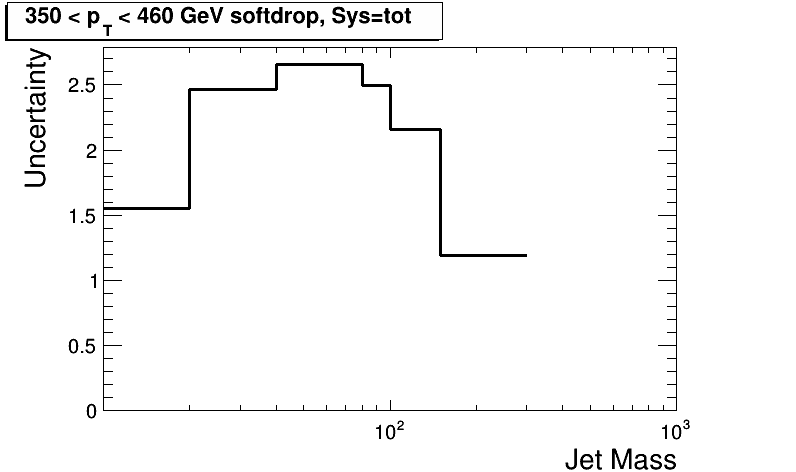

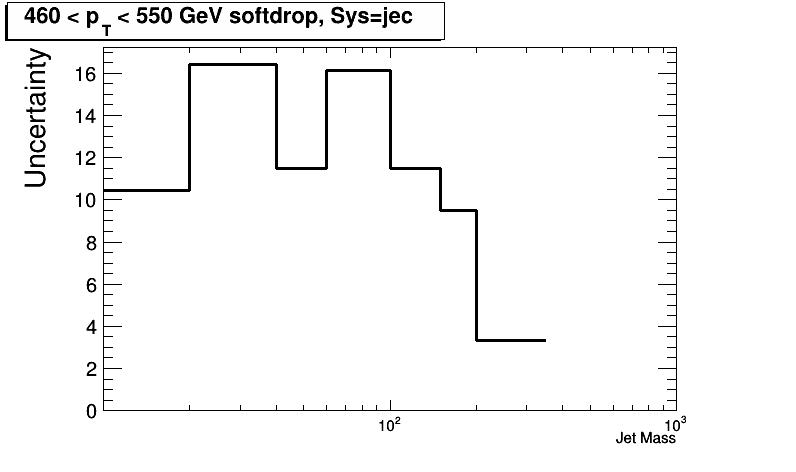

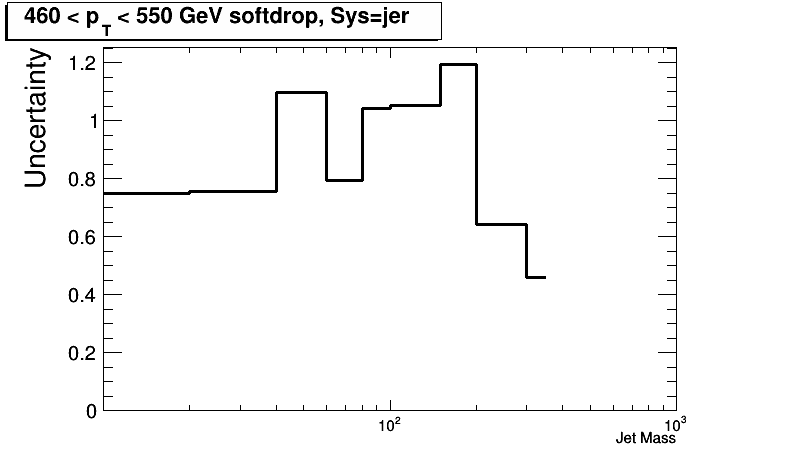

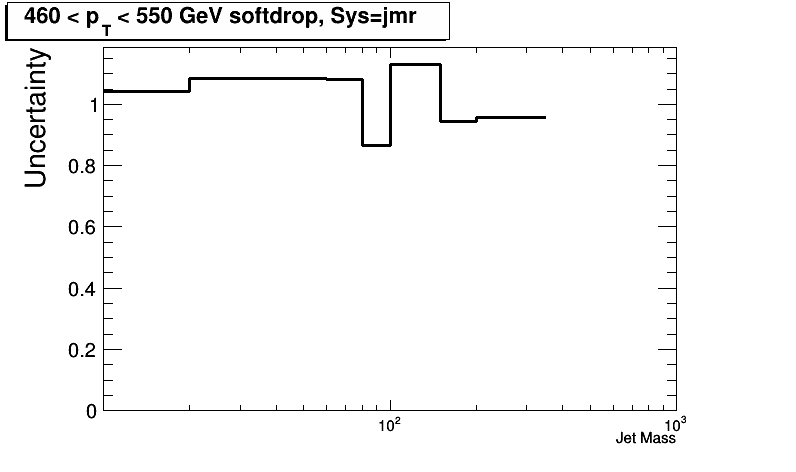

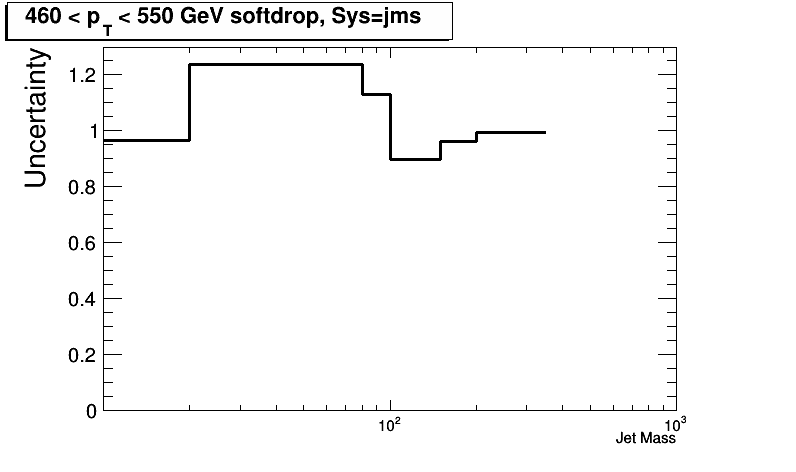

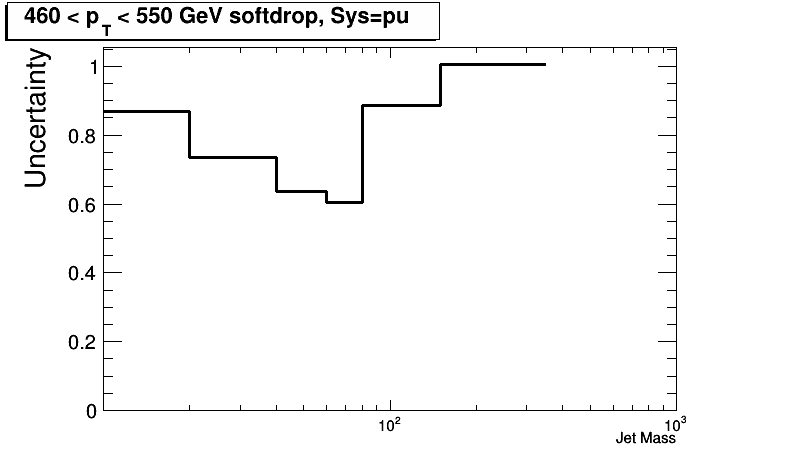

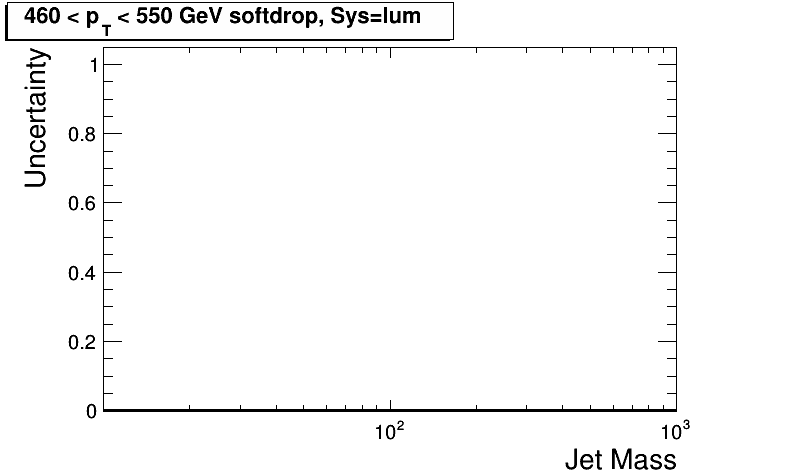

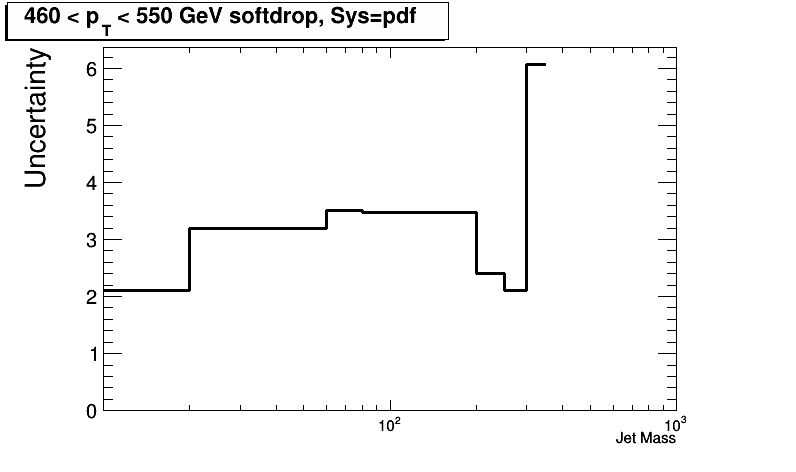

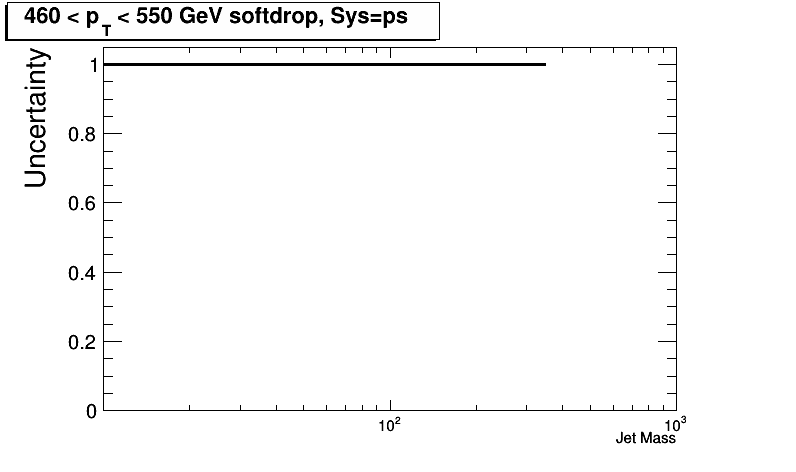

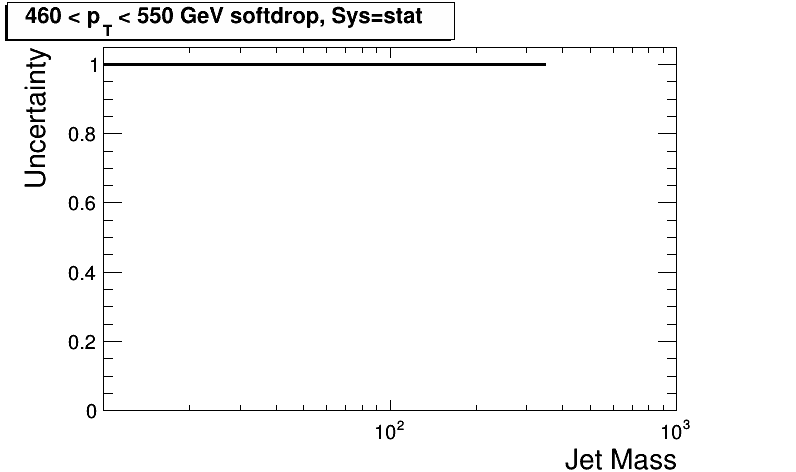

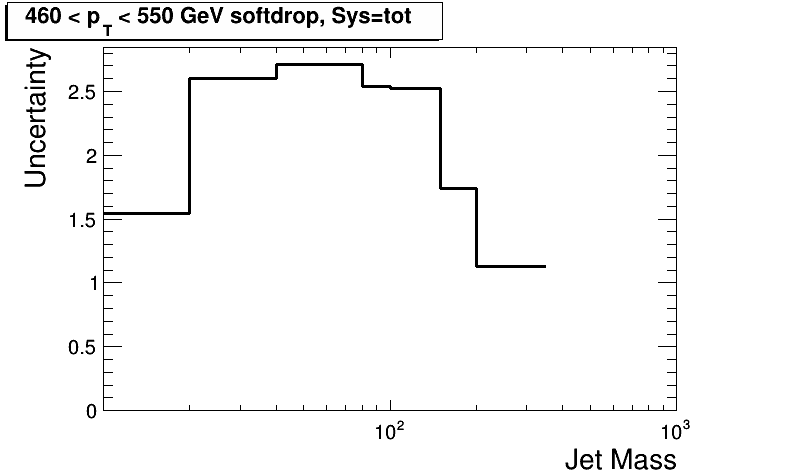

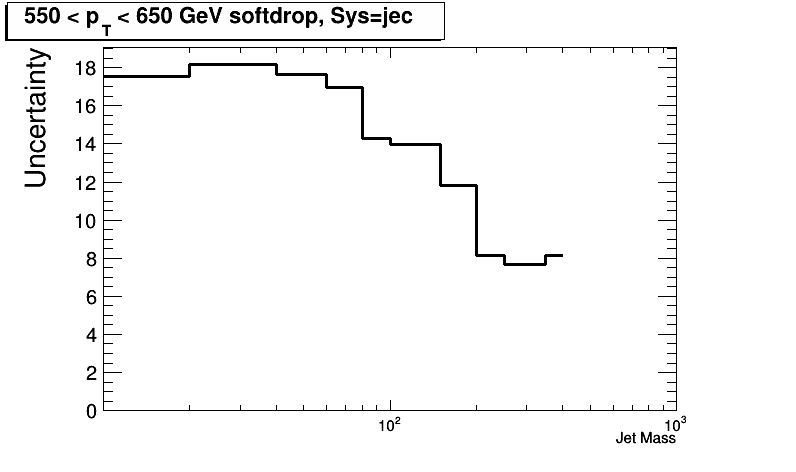

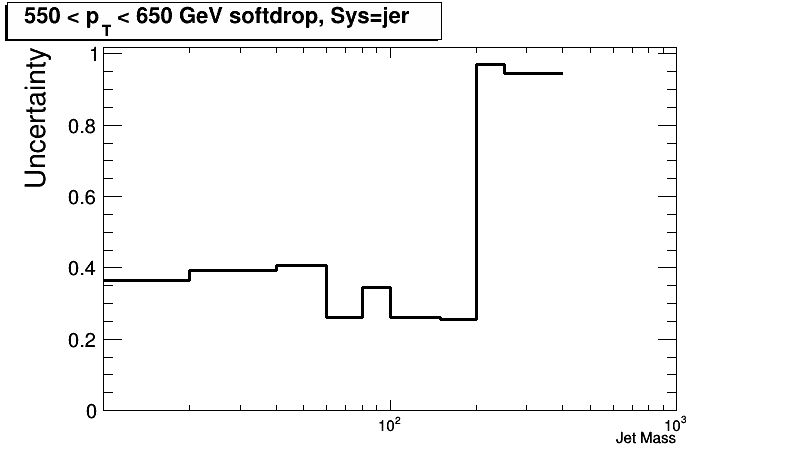

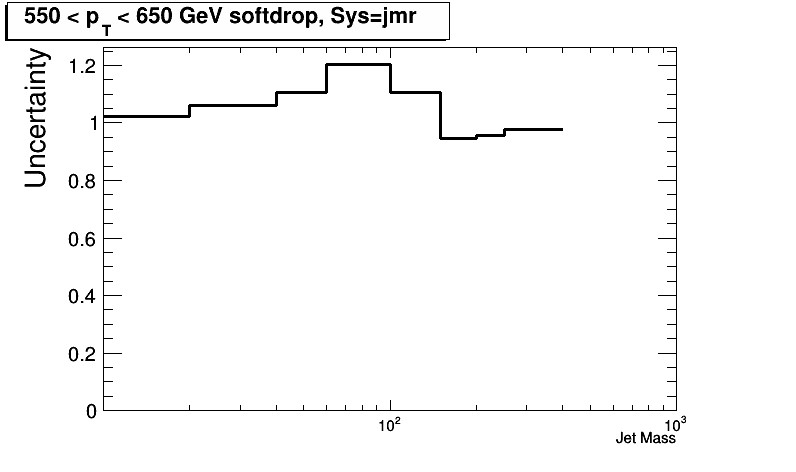

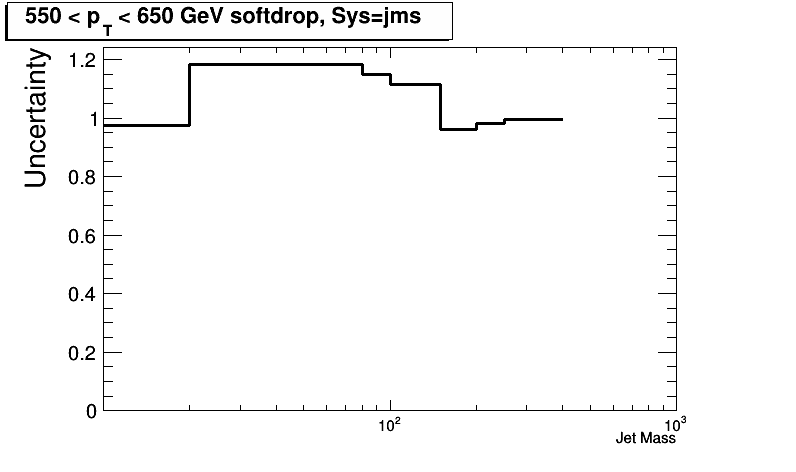

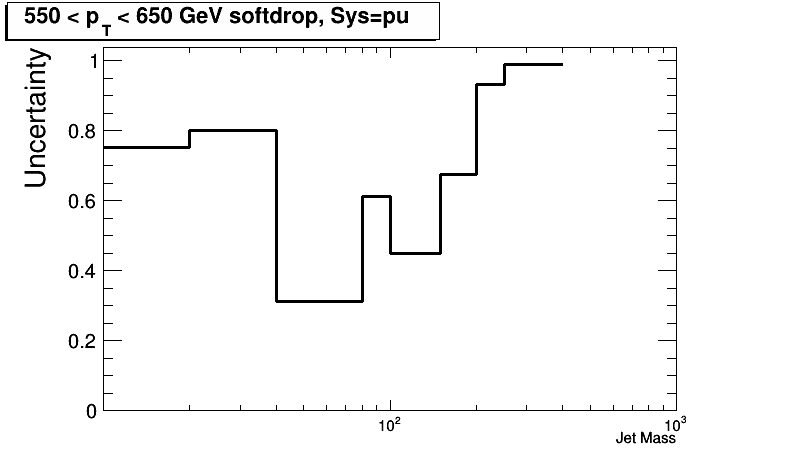

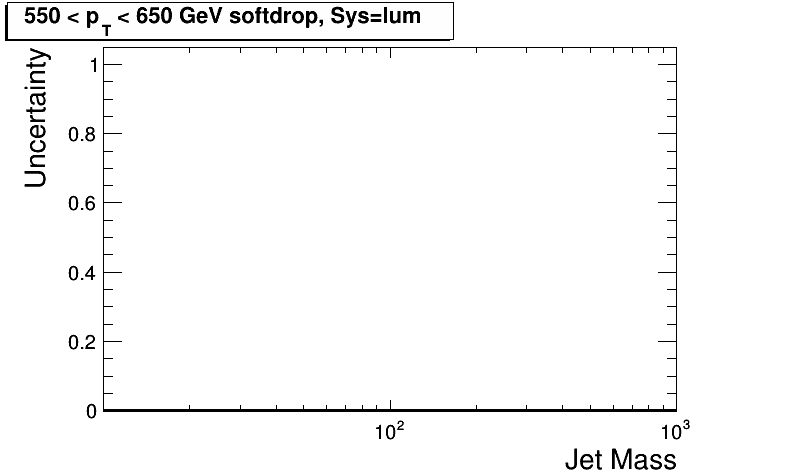

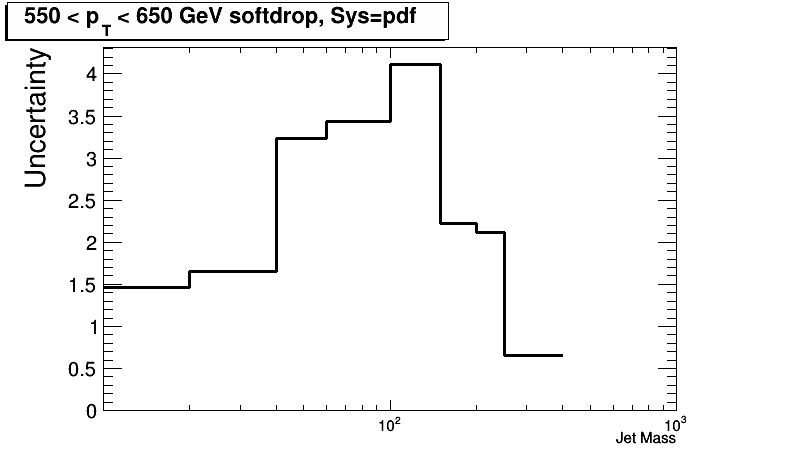

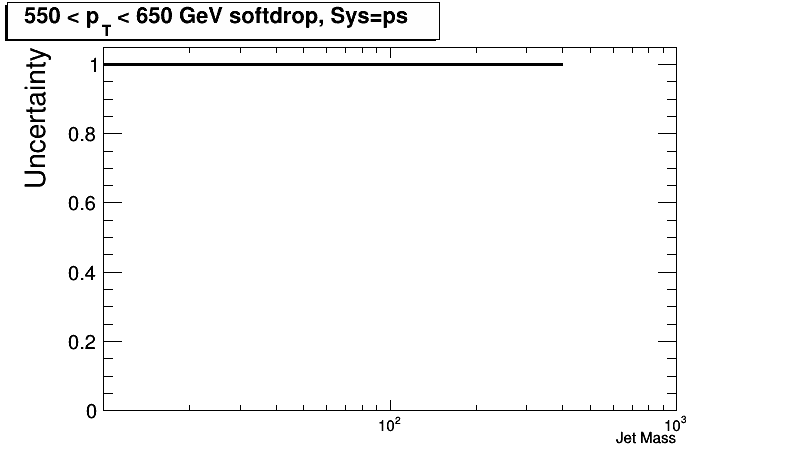

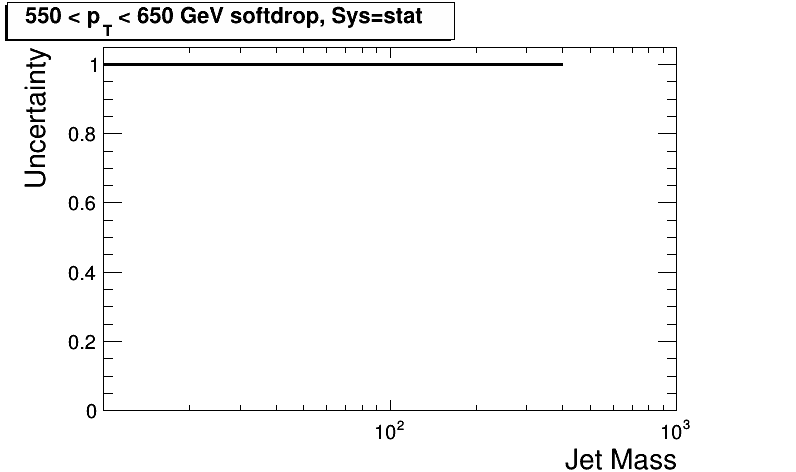

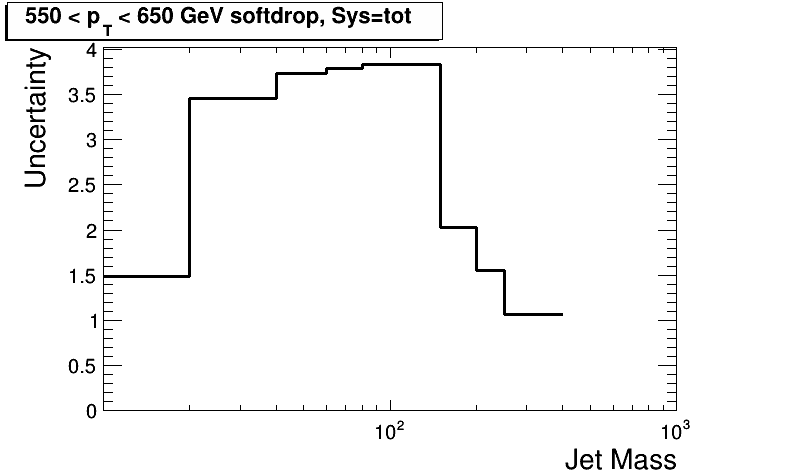

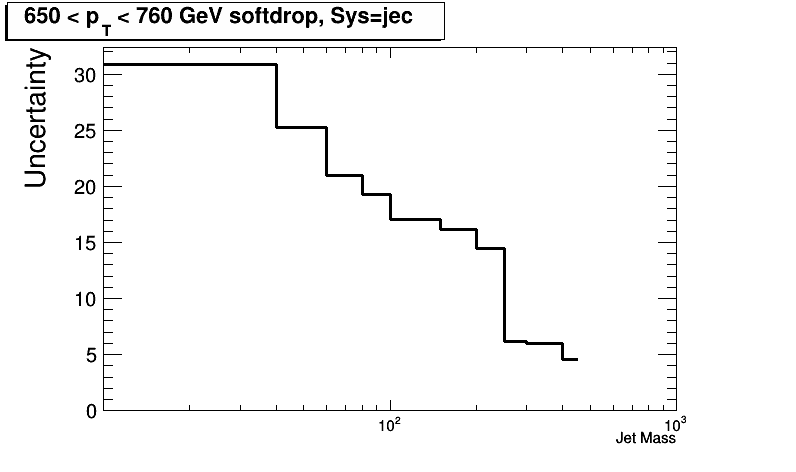

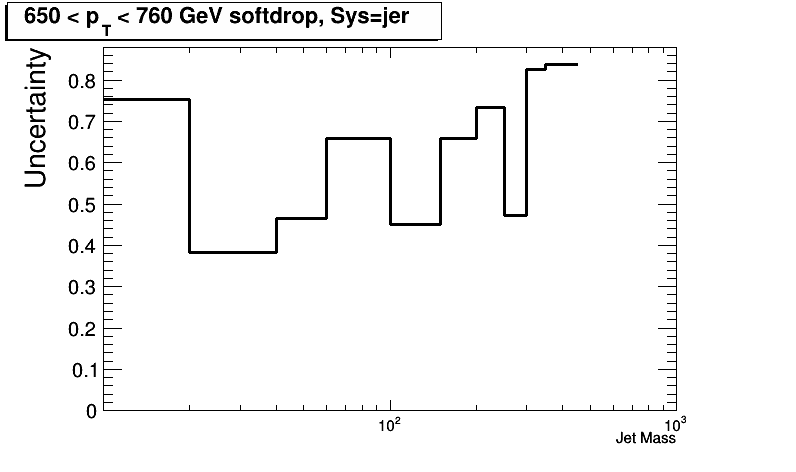

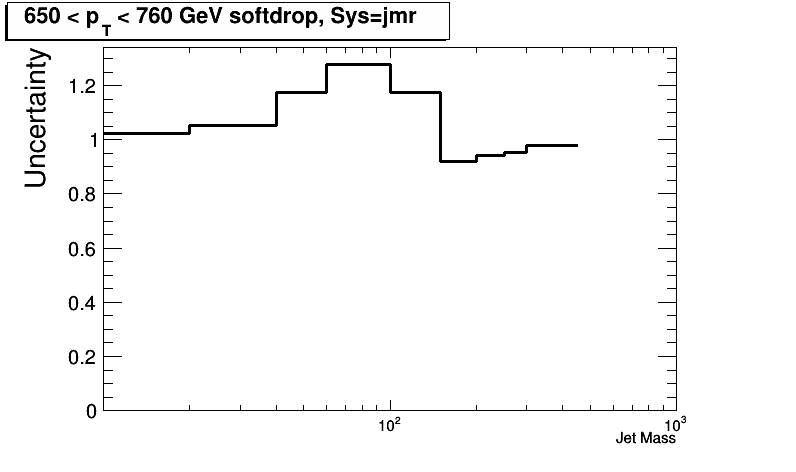

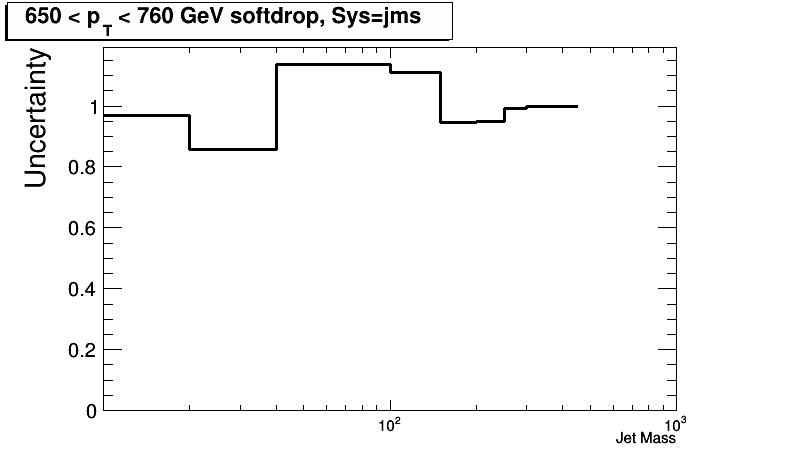

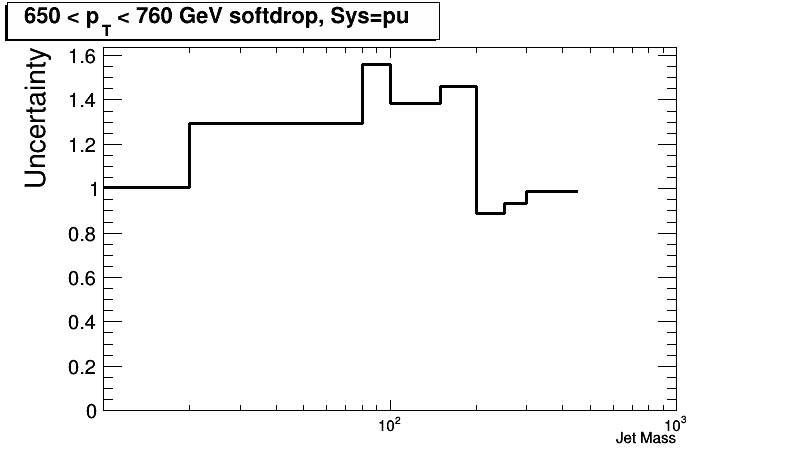

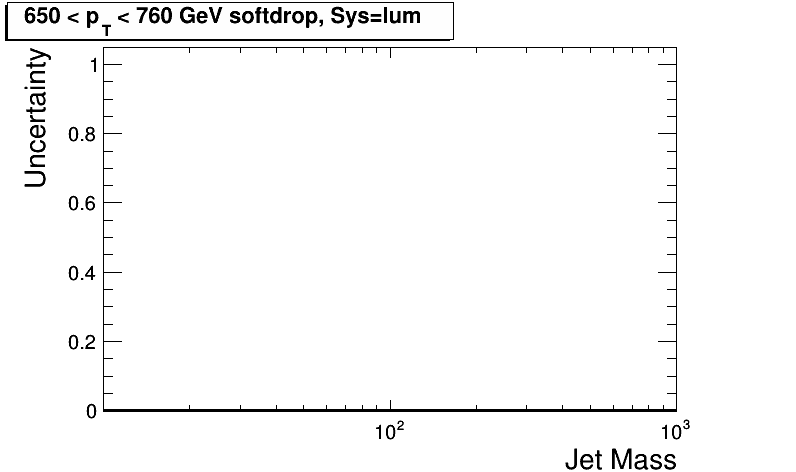

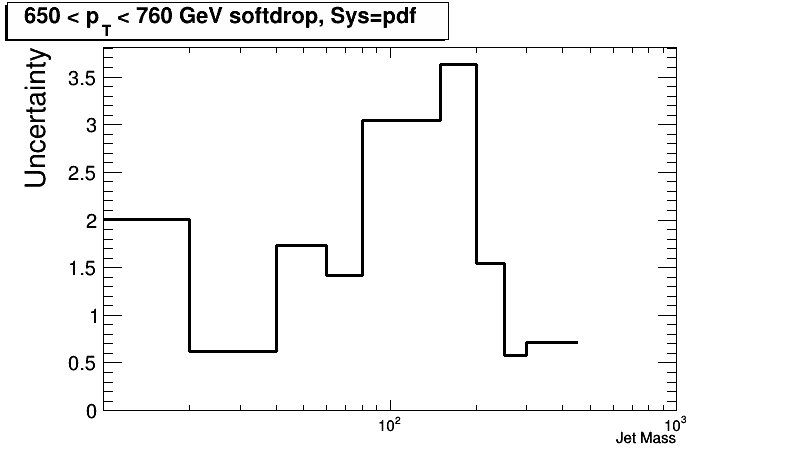

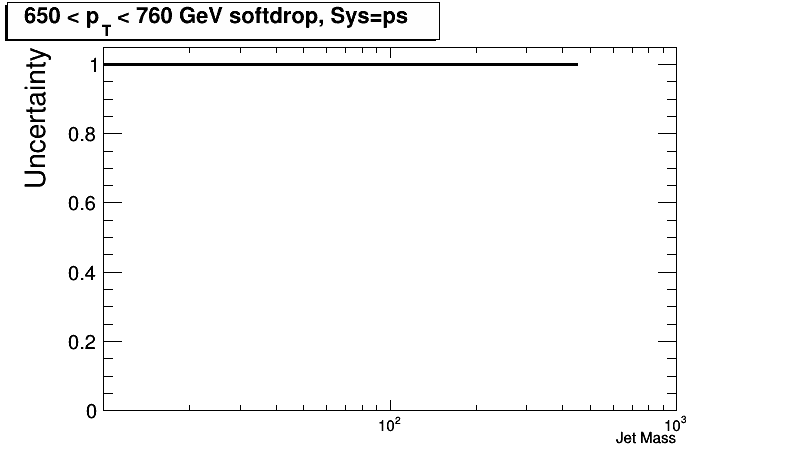

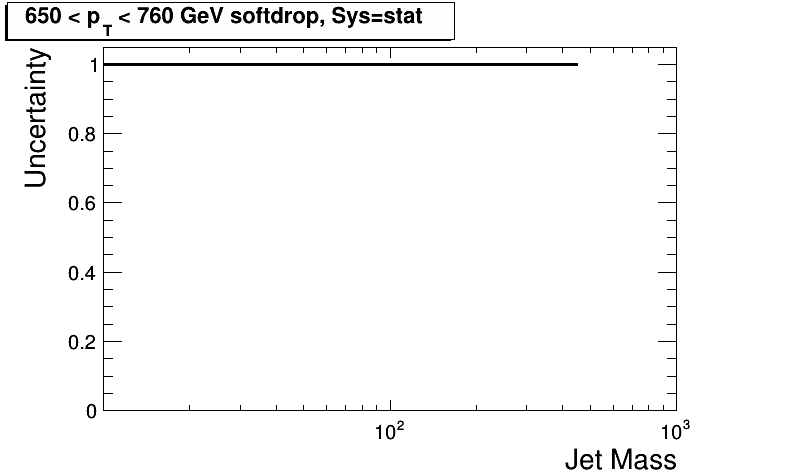

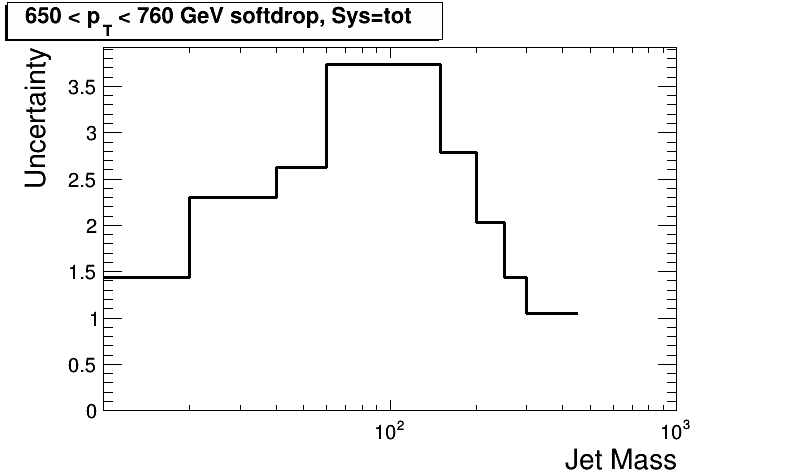

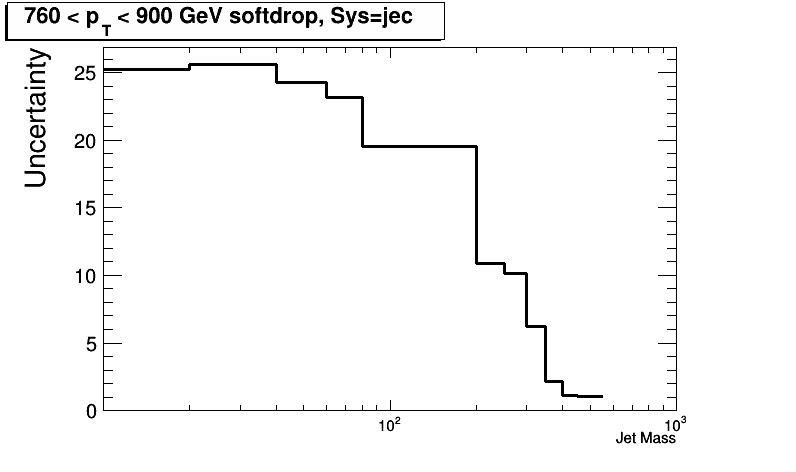

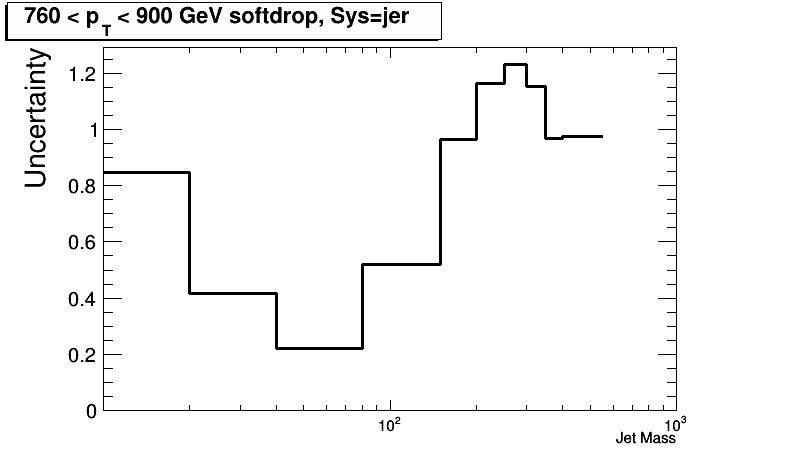

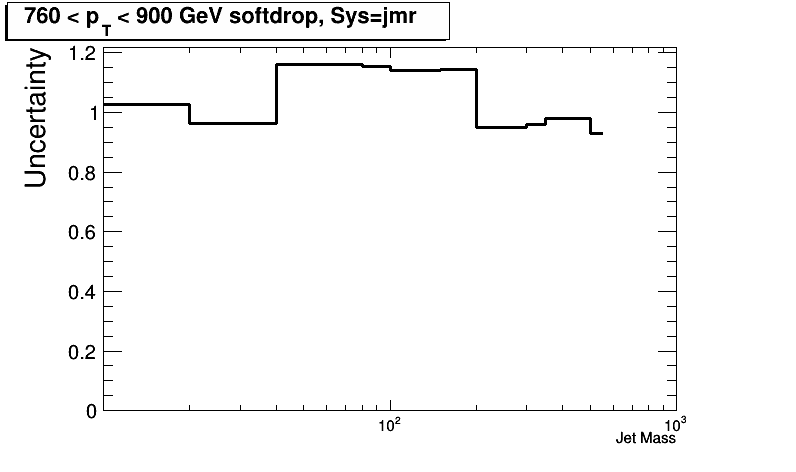

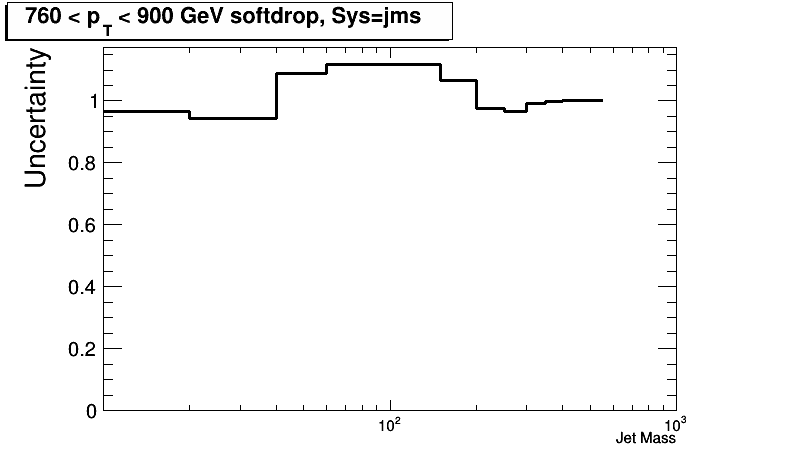

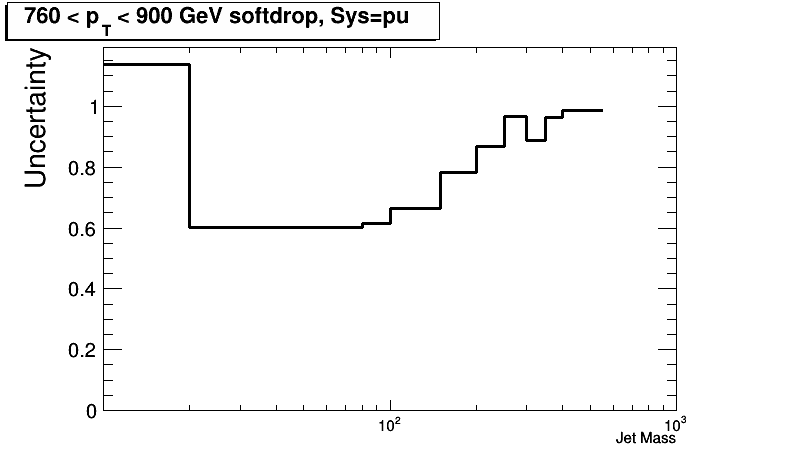

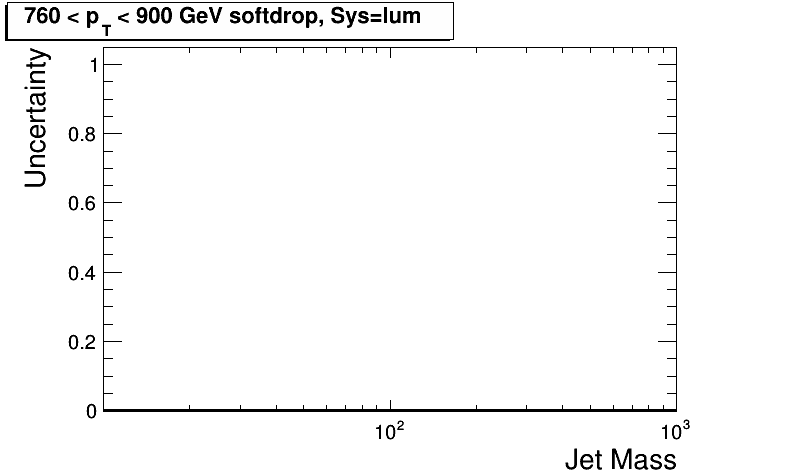

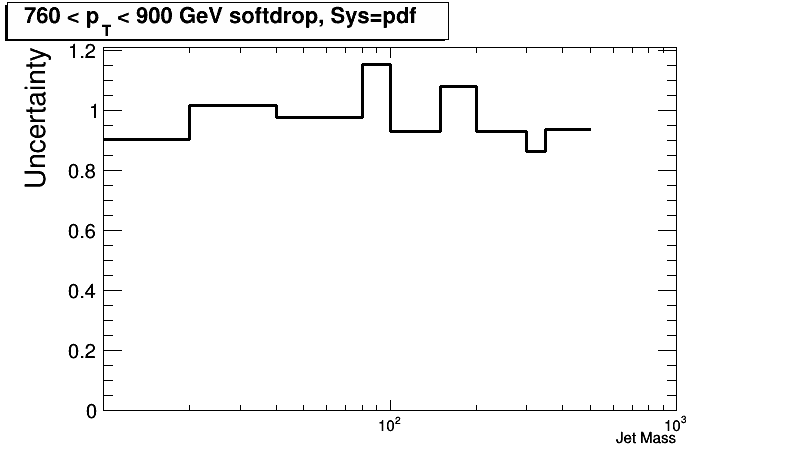

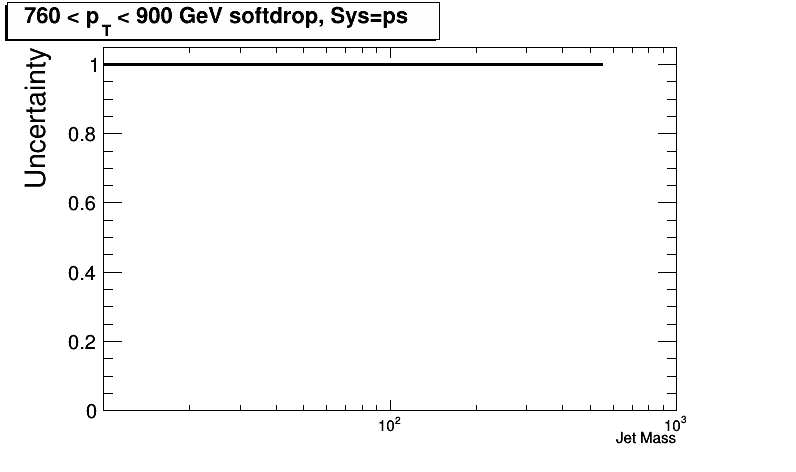

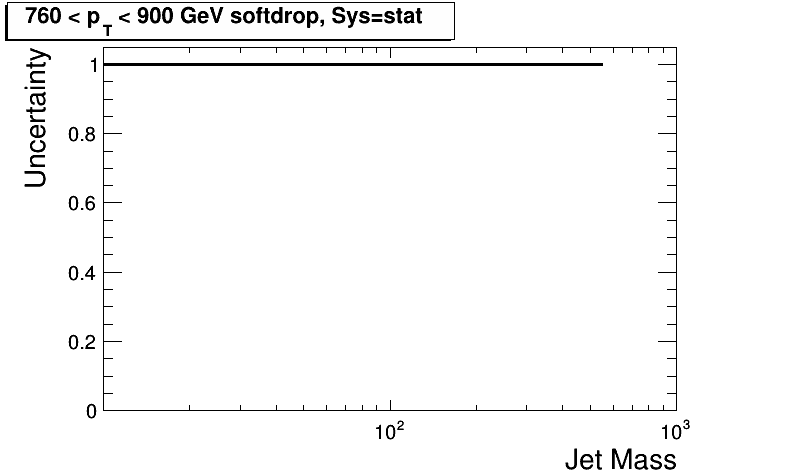

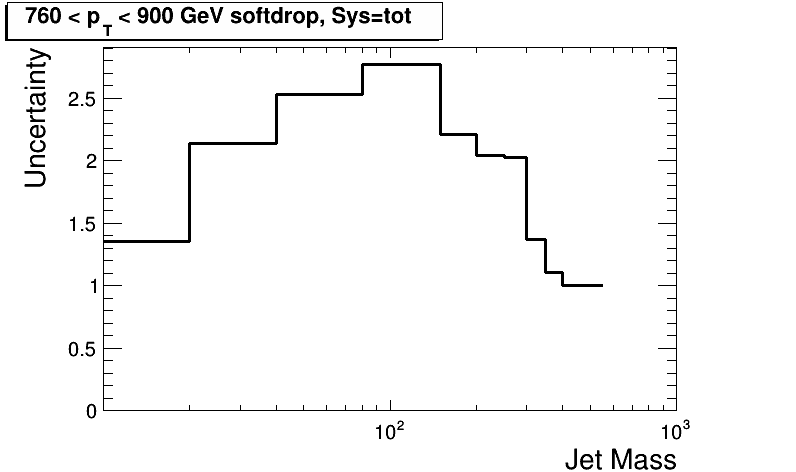

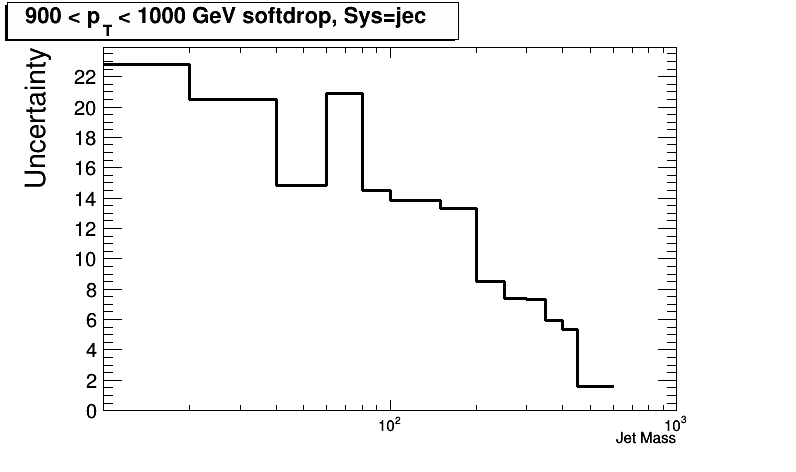

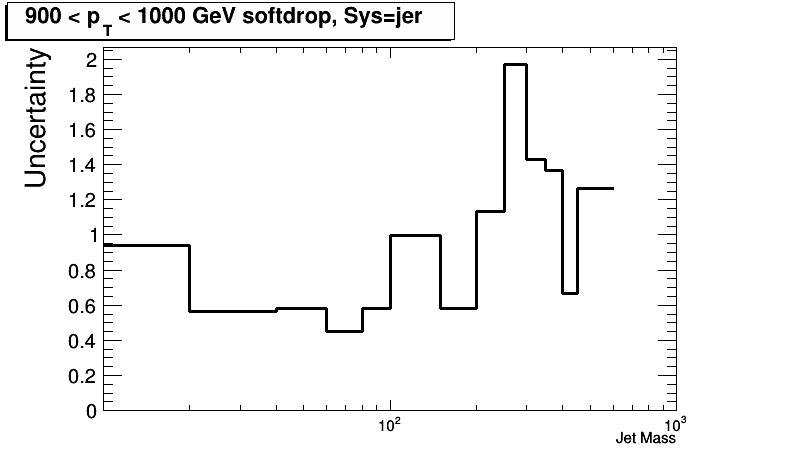

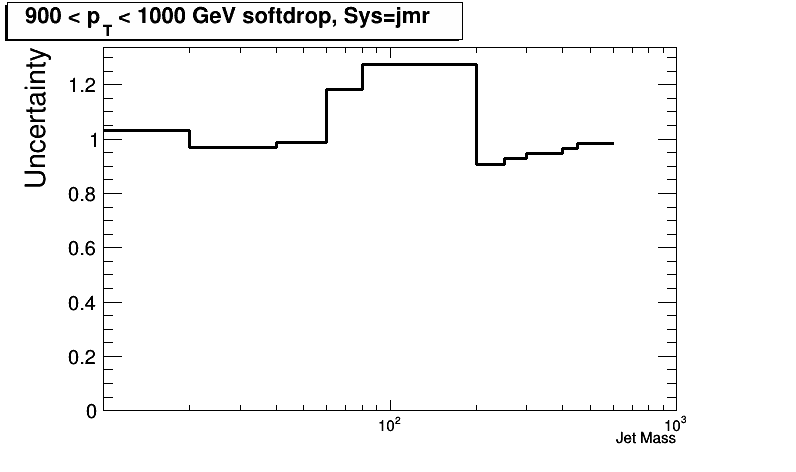

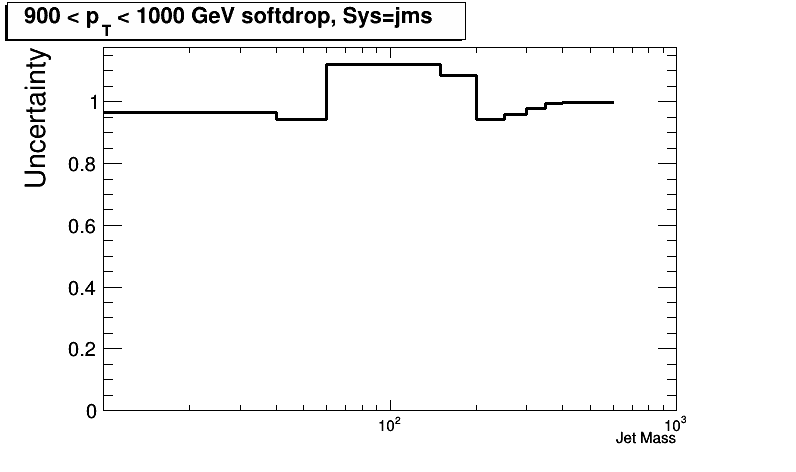

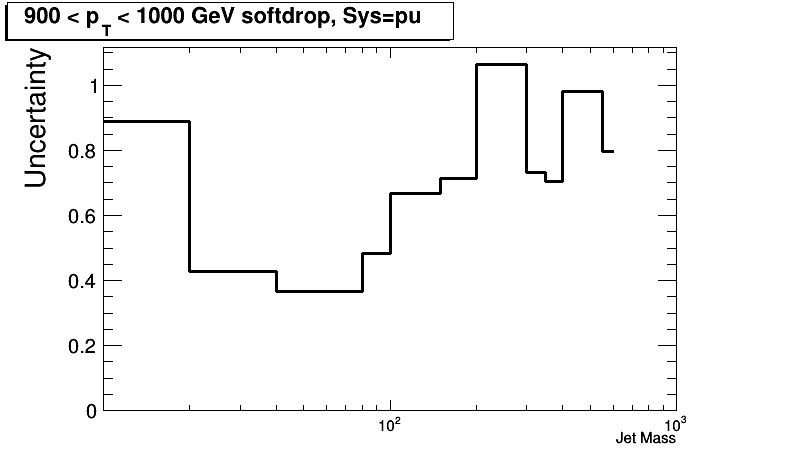

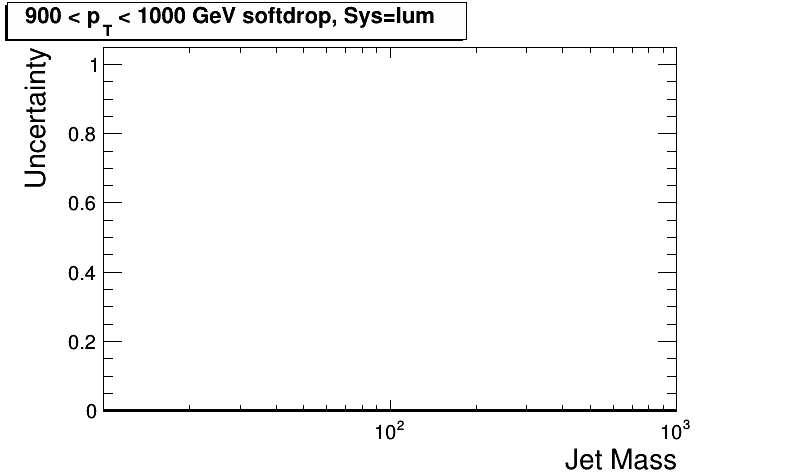

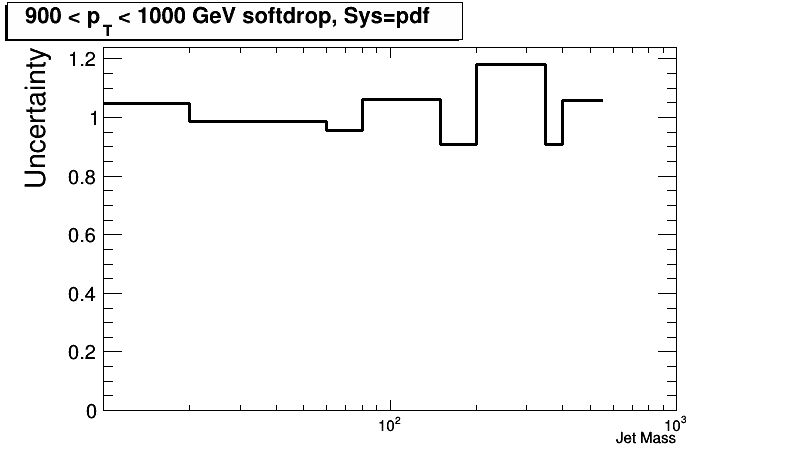

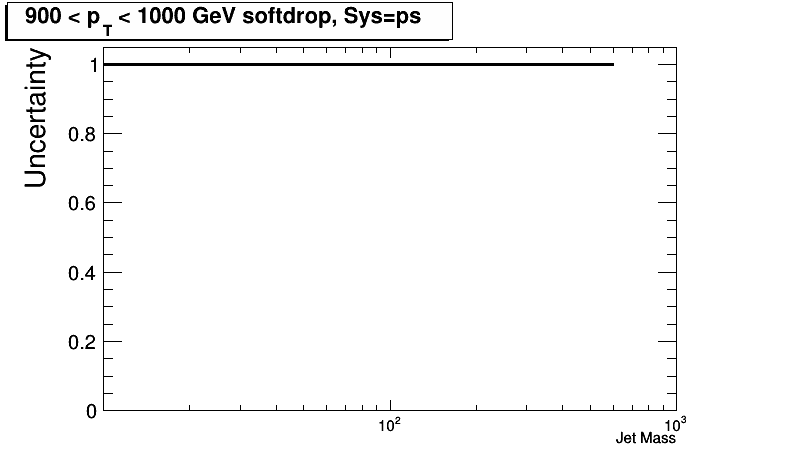

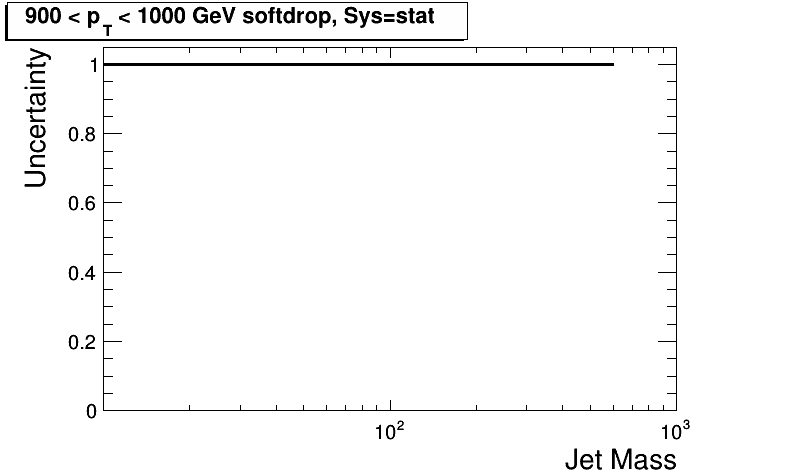

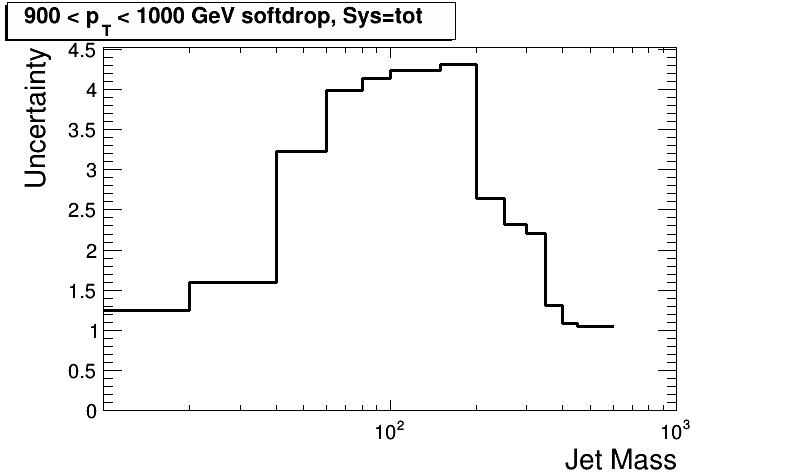

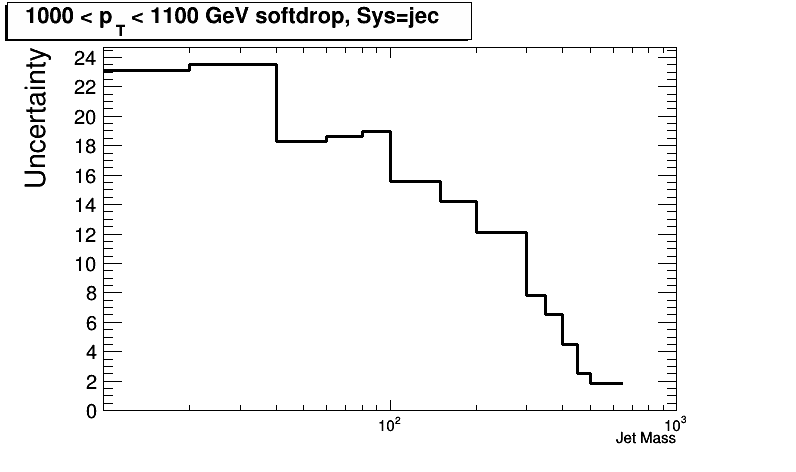

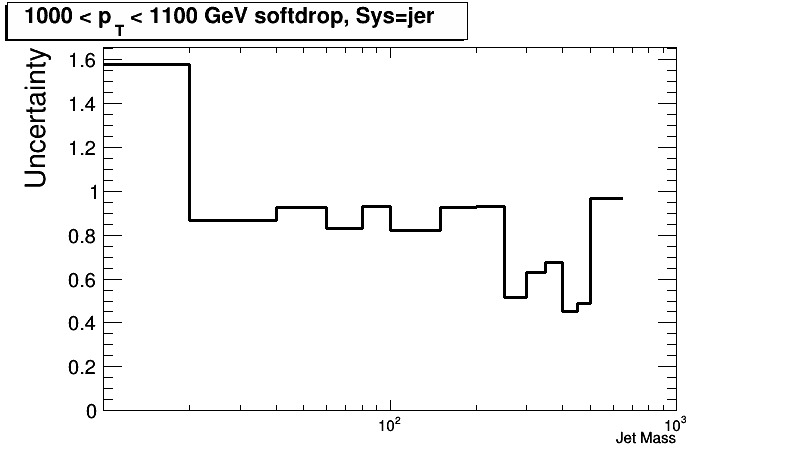

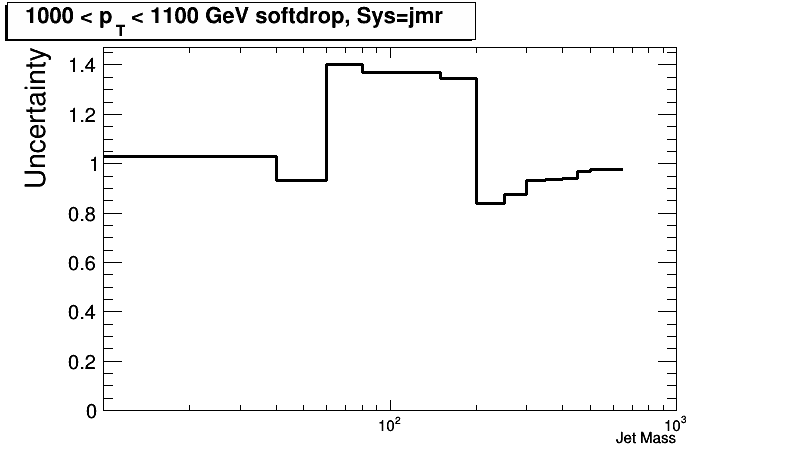

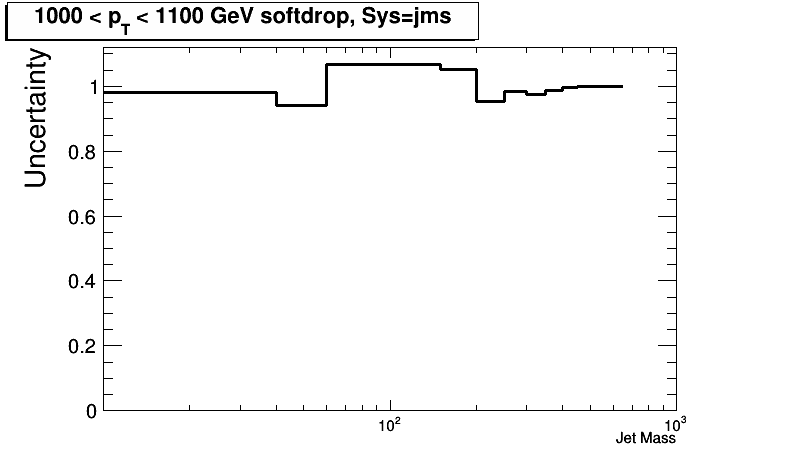

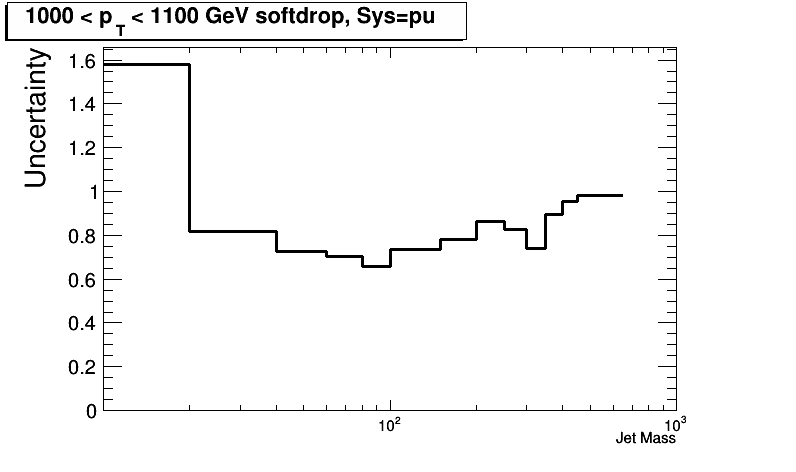

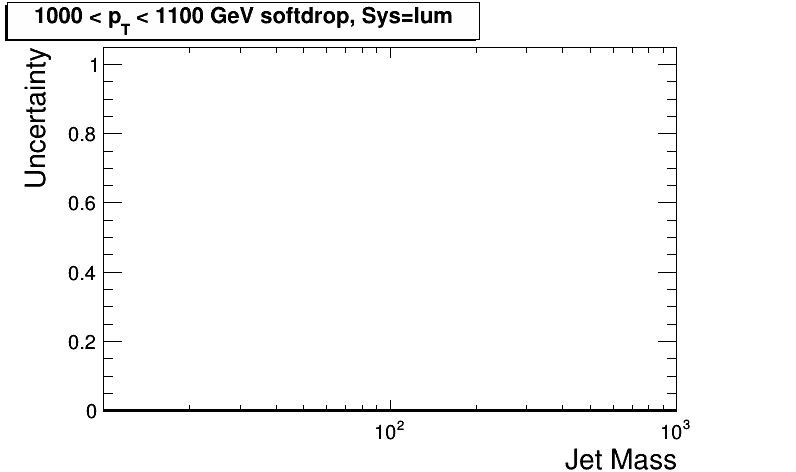

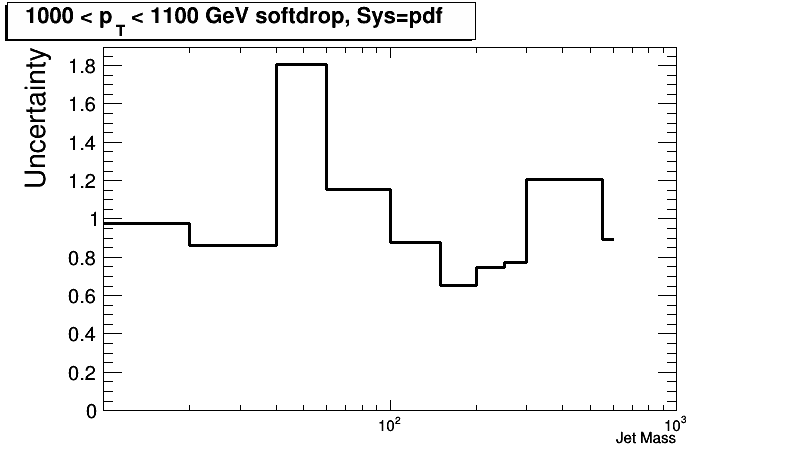

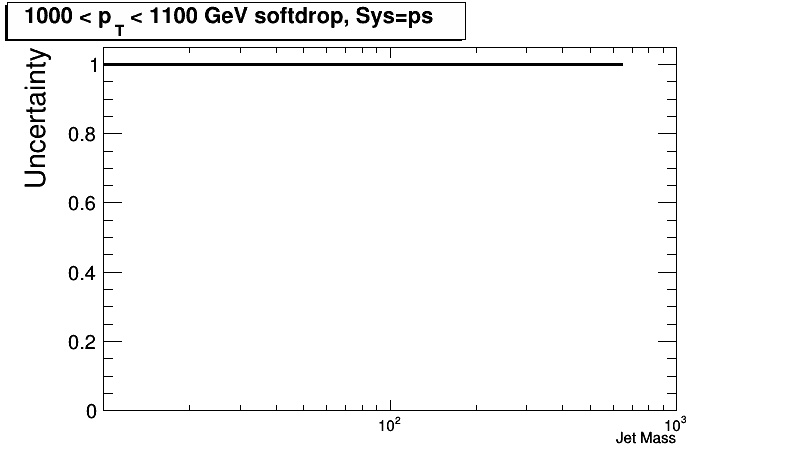

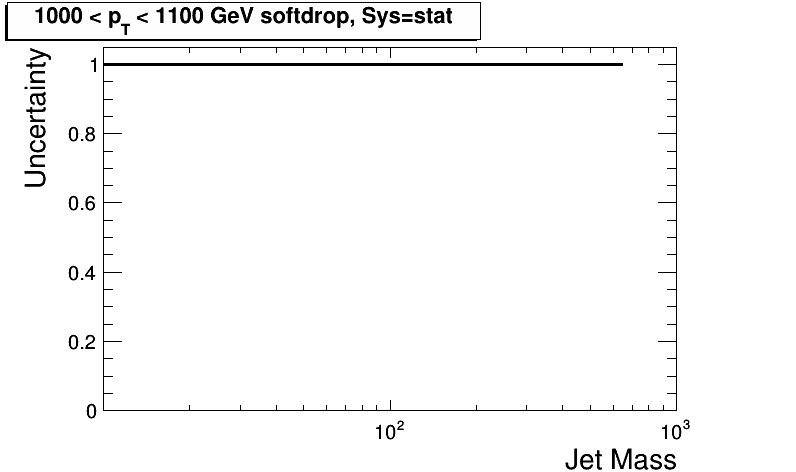

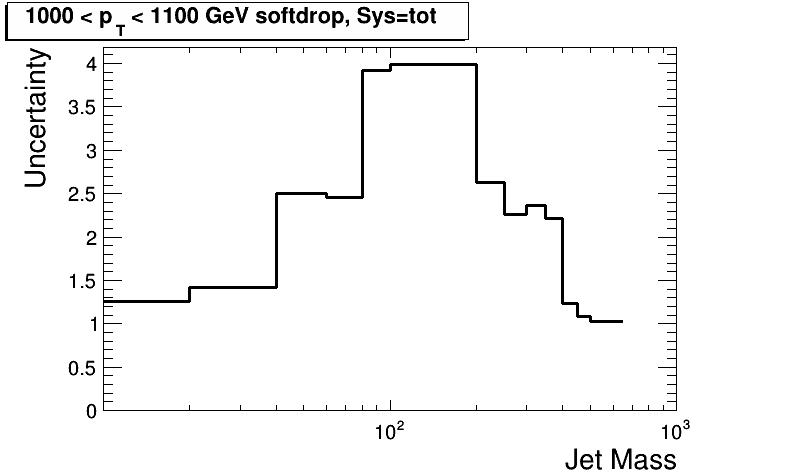

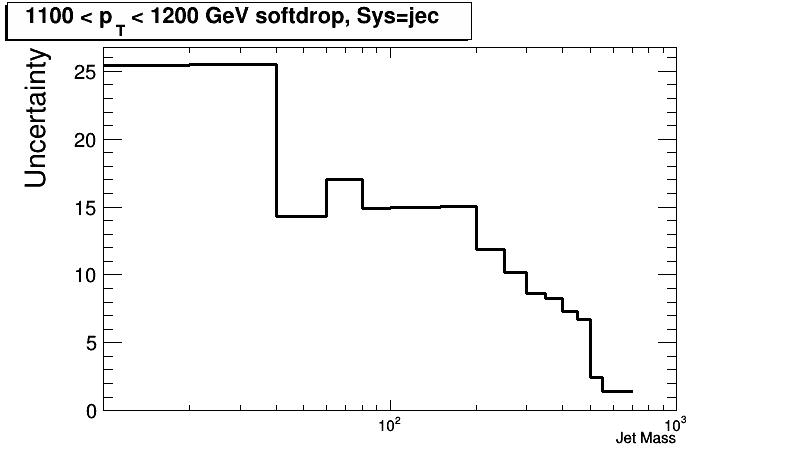

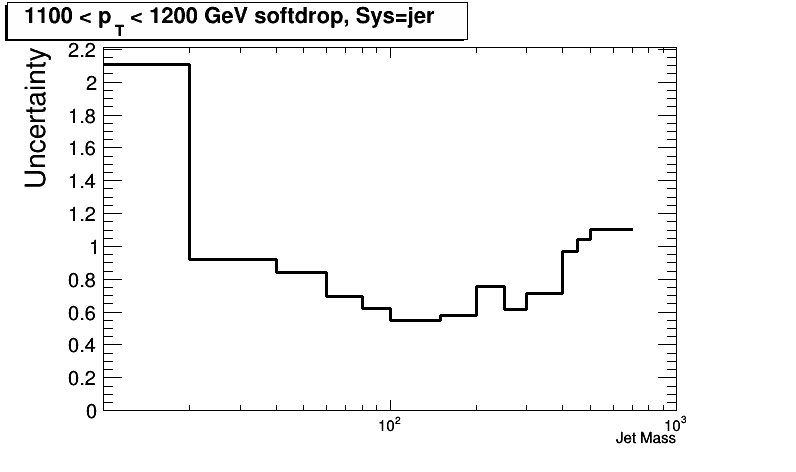

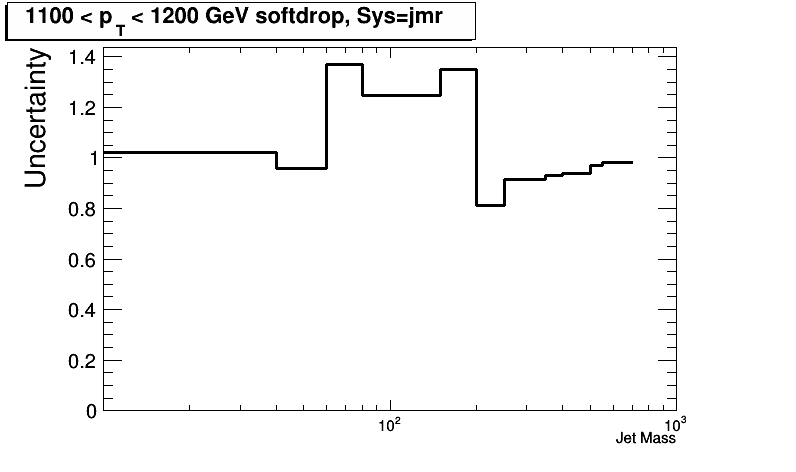

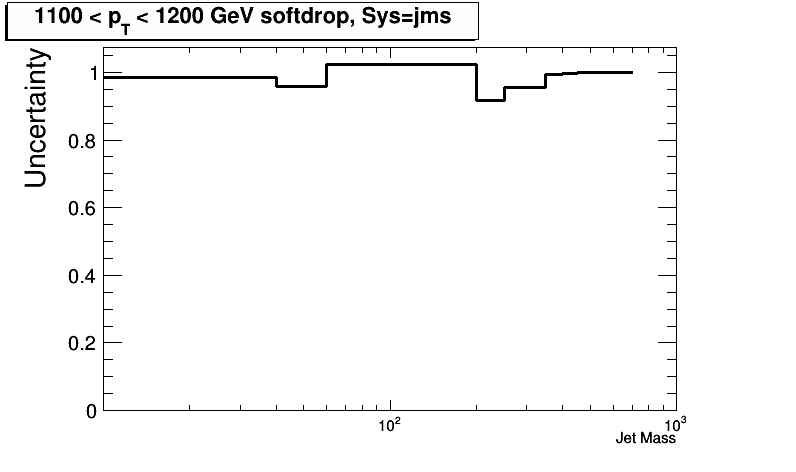

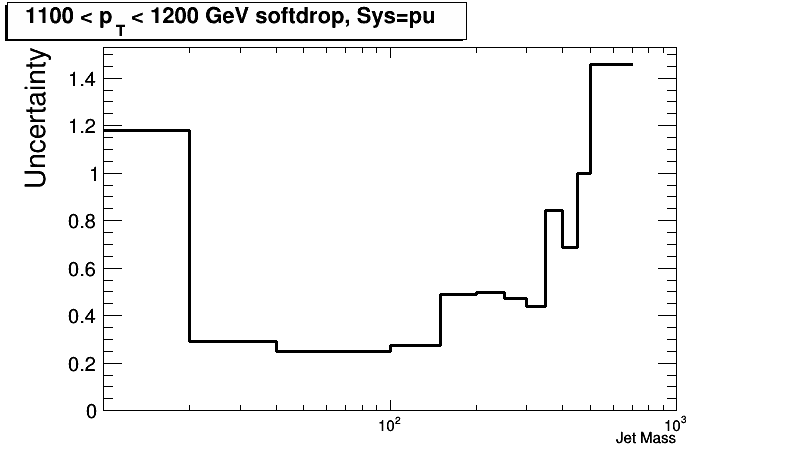

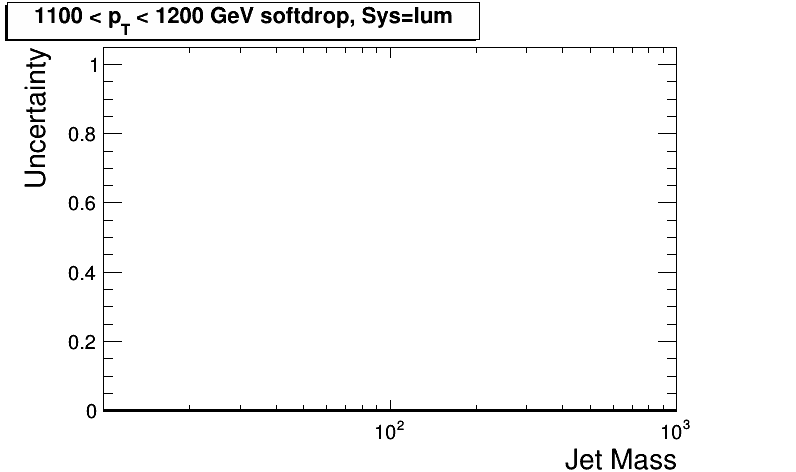

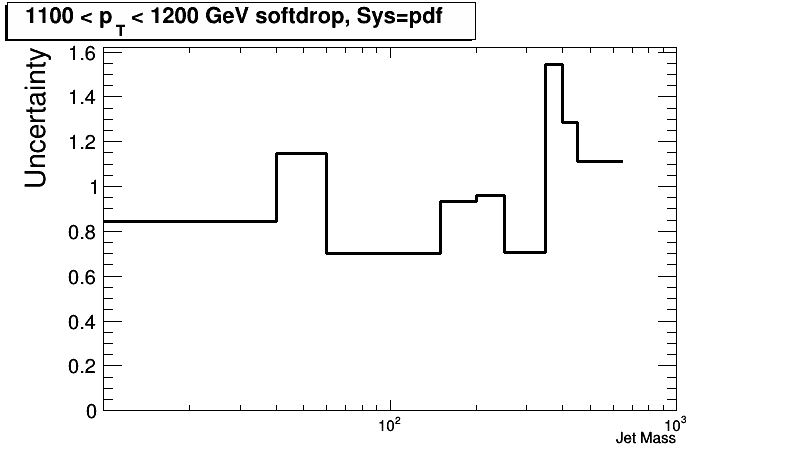

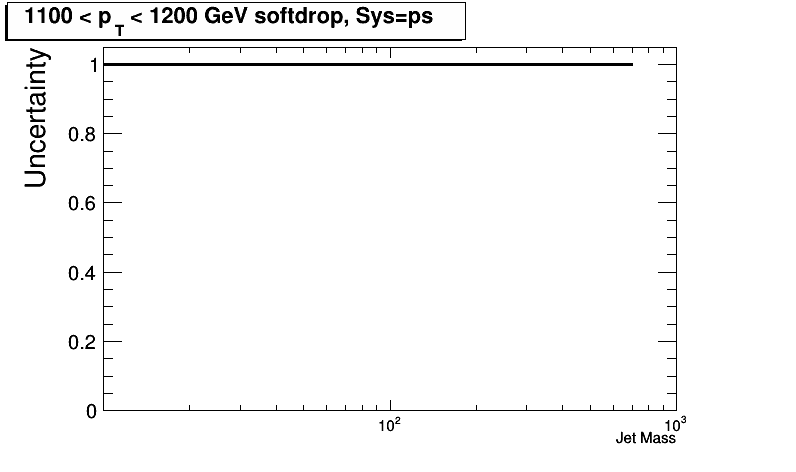

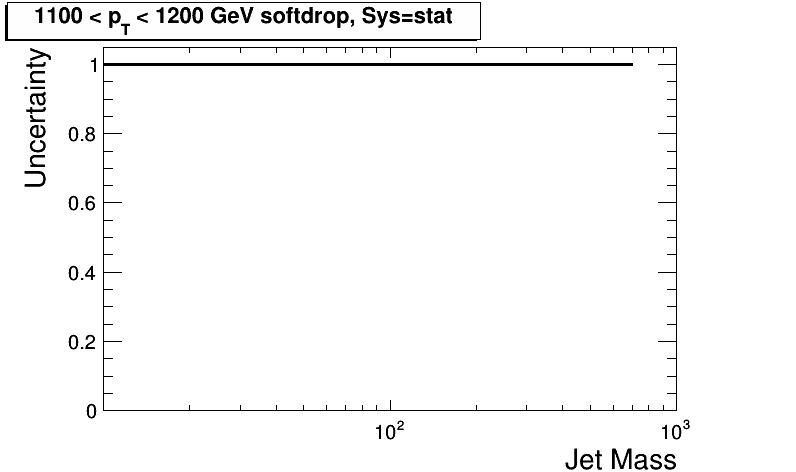

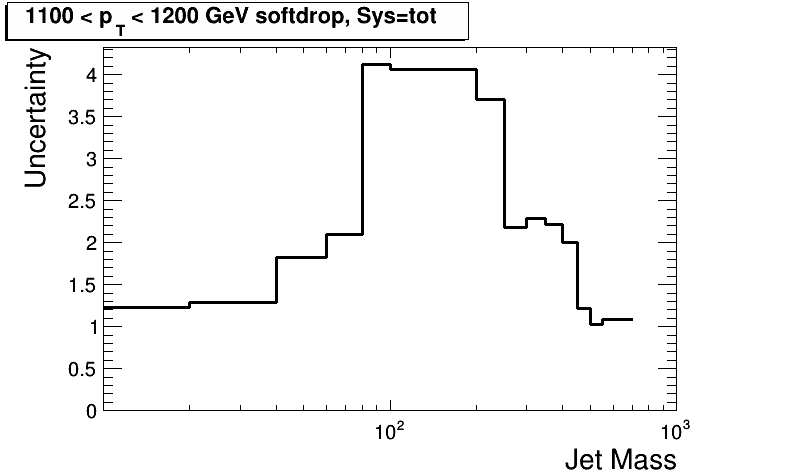

In [2]:
sysvars = ['jec', 'jer', 'jmr', 'jms', 'pu', 'lum', 'pdf', 'ps', 'stat', 'tot']
maxima = [ 5, 2, 2, 2, 2, 2, 2, 2, 2, 2]

ptBinNames = ['200 < p_{T} < 260 GeV','260 < p_{T} < 350 GeV',
                   '350 < p_{T} < 460 GeV','460 < p_{T} < 550 GeV',
                   '550 < p_{T} < 650 GeV','650 < p_{T} < 760 GeV', 
                   '760 < p_{T} < 900 GeV','900 < p_{T} < 1000 GeV', 
                   '1000 < p_{T} < 1100 GeV','1100 < p_{T} < 1200 GeV',
                   '1200 < p_{T} < 1300 GeV', 'p_{T} > 1300 GeV']

objs = []
for groomstr in [ 'ungroomed', 'softdrop']:
    for ibin in xrange(1,11):

        normfile = ROOT.TFile('uncertainties_' + groomstr + str(ibin) +'.root')
        absfile = ROOT.TFile('uncertainties_'+ groomstr +'_absolute' + str(ibin) +'.root')
            
        

        c_norm = normfile.Get("cunc" + str(ibin) + groomstr)
        c_abs = absfile.Get("cunc" + str(ibin) + groomstr + "_absolute")

        #for ival in c_norm.GetListOfPrimitives():
        #    print ival
        #for ival in c_abs.GetListOfPrimitives():
        #    print ival


        if groomstr == 'softdrop':
            hists_norm = dict( zip( sysvars , c_norm.GetPrimitive("2d_response_softdrop_jernom__jec_uncstack" + str(ibin)).GetHists()))
            hists_abs = dict( zip( sysvars , c_abs.GetPrimitive("2d_response_softdrop_jernom__jec_uncstack" + str(ibin)).GetHists()))
        else:
            hists_norm = dict( zip( sysvars , c_norm.GetPrimitive("2d_response_jernom__jec_uncstack" + str(ibin)).GetHists()))
            hists_abs = dict( zip( sysvars , c_abs.GetPrimitive("2d_response_jernom__jec_uncstack" + str(ibin)).GetHists()))


        canvs = []
        hists = []
        for i,isys in enumerate(sysvars) :
            c = ROOT.TCanvas("canv_" + groomstr + str(ibin) + isys, "canv_" + isys)
            hnorm = hists_norm[isys]
            habs = hists_abs[isys]
            habs.SetMarkerStyle(20)
            habs.SetLineColor(1)
            habs.SetLineStyle(1)
            habs.Divide(hnorm)
            habs.Draw("hist ][")
            habs.SetTitle(ptBinNames[ibin-1] + ' ' + groomstr + ', Sys=' + isys + ';Jet Mass;Uncertainty')
            habs.GetXaxis().SetRangeUser(10.,1000.)
            habs.SetMinimum(0)
            #habs.SetMaximum( maxima[i])
            c.SetLogx()
            #c.SetLogy()
            c.Draw()
            canvs.append(c)
            hists.append(habs)
            c.Print("unc_compare_" + groomstr + str(ibin) + isys + "_abs_vs_norm.png", "png")
            c.Print("unc_compare_" + groomstr + str(ibin) + isys + "_abs_vs_norm.pdf", "pdf")


        objs.append( [normfile, absfile, hists_norm, hists_abs, canvs, hists ] )

